### Summary
<p>
Surveys are determining characteristics or features of a population. 
Of course there can be a myriad of characteristics of any kind. 
A popular characteristic is for example census data recording various details of a population.
Another popular characteristic are oppinions determined with oppinion polls.
However from a technical standpoint researching the whole population is often economical not possible.
For this reason random samples are taken, whereby each sample represents a part of the population.
The size of the part determines the weight of the sample with regard to the population.
Random samples are taken in different ways, for example as simple random samples, stratified random samples or cluster samples. The survey design can increase in complexity, when samples are nested with these methods into each other.
</p>
<p>
The survey weight package offers a function "svydesign" for creating an svydesign object:
svydesign(data = apisrs, weights = ~pw, fpc = ~fpc, id = ~1).
This object specifies the data, weights, and sample methods used in the survey.
This object is essential for working with the survey package and allows using a lot of analytical functions
like svytable (contingency table), svyby (contingency table grouped by), 
svymean or svychisq (Chi-Square test for drawing inferences) in an easy way.
</p>
<p>
All these functions account for the weights of the sample on ground of the complex survey design 
in relation to the population. This allows drawing conclusion from the sample to the population.
Without accounting for the weights calculating directly with the sample data particular samples would be over- or underrepresented. This crooked distribution would then lead to false conclusions about the population.
</p>
  
<p>
The data sets used here are:
</p>

<ul>
<li>
The main dataset investigated here is the <a href = "https://www.cdc.gov/nchs/nhanes/index.htm"> National Health and Nutrition Examination Survey</a>. The explanations of the variables recorded are stored <br>
by "cran.r-project.org" in the dataset package description as <a href="https://cran.r-project.org/web/packages/NHANES/NHANES.pdf"> NHANES.pdf </a>
</li>
<li>
The survey package comes with a dataset called the Academic Performance Index (api). 
The Academic Performance Index is computed for all California schools based on standardised
testing of students. The data sets contain information for all schools with at least 100 students and
for various probability samples of the data.
The explanations of the variables recorded are stored by "cran.r-project.org" in the dataset package description as <a href="https://cran.r-project.org/web/packages/survey/survey.pdf"> Survey.pdf </a>
</li>
<li>
Also some calculations are done with the BLS Consumer Expenditure Survey (Quarter 4, 2016) showing
the limitations of analyzing and visualizing with unweighted data. 
The data set can be found on the website [U.S. Bureau of Labor Statistics under Consumer Expenditure Surveys](https://www.bls.gov/cex/).
</li>
</ul>
<p>
The findings and conclusions of this research are directly given with the code in the comments in the document below.
</p>


    

#### Import the most important basic R packages
 <p>

 </p>

In [7]:
library(tidyverse)
# set default global options
options(repr.plot.width=10, repr.plot.height=8)

Read csv into R with read.csv and store it in a variable.

In [8]:
getwd()

[1] "C:/Users/gamarandor/data_science/data_science_projects/data_camp_projects/surveydata"

 #### Limitations of analyzing and visualizing with unweighted data
 <p>
 Data set: BLS Consumer Expenditure Survey </b> (Quarter 4, 2016)
 </p>


In [9]:
ce_csv <- read.csv("ce.csv", sep = ",")

Viewing data and metadata with basic R functions.

In [10]:
str(ce_csv)

'data.frame':	6301 obs. of  49 variables:
 $ FINLWT21: num  25985 6581 20208 18078 20112 ...
 $ FINCBTAX: int  116920 200 117000 0 2000 942 0 91000 95000 40037 ...
 $ BLS_URBN: int  1 1 1 1 1 1 1 1 2 1 ...
 $ POPSIZE : int  2 3 4 2 2 2 1 2 5 2 ...
 $ EDUC_REF: int  16 15 16 15 14 11 10 13 12 12 ...
 $ EDUCA2  : int  15 15 13 NA NA NA NA 15 15 14 ...
 $ AGE_REF : int  63 50 47 37 51 63 77 37 51 64 ...
 $ AGE2    : Factor w/ 67 levels ".","18","19",..: 34 31 30 1 1 1 1 20 37 51 ...
 $ SEX_REF : int  1 1 2 1 2 1 2 1 1 2 ...
 $ SEX2    : int  2 2 1 NA NA NA NA 2 2 1 ...
 $ REF_RACE: int  1 4 2 1 1 1 1 1 1 1 ...
 $ RACE2   : int  1 4 1 NA NA NA NA 1 1 1 ...
 $ HISP_REF: int  2 2 2 2 2 1 1 2 2 2 ...
 $ HISP2   : int  2 2 1 NA NA NA NA 2 2 2 ...
 $ FAM_TYPE: int  3 4 1 8 9 9 8 3 1 1 ...
 $ MARITAL1: int  1 1 1 5 3 3 2 1 1 1 ...
 $ REGION  : int  4 4 3 4 4 3 4 1 3 2 ...
 $ SMSASTAT: int  1 1 1 1 1 1 1 1 2 1 ...
 $ HIGH_EDU: int  16 15 16 15 14 11 10 15 15 14 ...
 $ EHOUSNGC: num  0 0 0 0 0 0 0

FINLWT2 represents the samples taken from the population. <br> 
Every number entered is the number of households represented by this sample.

In [11]:
summary(ce_csv)

    FINLWT21         FINCBTAX          BLS_URBN        POPSIZE     
 Min.   :  1751   Min.   :  -6800   Min.   :1.000   Min.   :1.000  
 1st Qu.: 16909   1st Qu.:  15538   1st Qu.:1.000   1st Qu.:2.000  
 Median : 20457   Median :  40000   Median :1.000   Median :2.000  
 Mean   : 20575   Mean   :  62480   Mean   :1.055   Mean   :2.608  
 3rd Qu.: 23789   3rd Qu.:  84020   3rd Qu.:1.000   3rd Qu.:4.000  
 Max.   :107750   Max.   :1167106   Max.   :2.000   Max.   :5.000  
                                                                   
    EDUC_REF         EDUCA2         AGE_REF           AGE2         SEX_REF     
 Min.   : 0.00   Min.   : 0.00   Min.   :16.00   .      :3198   Min.   :1.000  
 1st Qu.:12.00   1st Qu.:12.00   1st Qu.:37.00   55     :  78   1st Qu.:1.000  
 Median :13.00   Median :13.00   Median :52.00   46     :  76   Median :2.000  
 Mean   :13.41   Mean   :13.42   Mean   :51.69   47     :  76   Mean   :1.526  
 3rd Qu.:15.00   3rd Qu.:15.00   3rd Qu.:65.00   53     

In [12]:
head(ce_csv)

FINLWT21,FINCBTAX,BLS_URBN,POPSIZE,EDUC_REF,EDUCA2,AGE_REF,AGE2,SEX_REF,SEX2,...,STATE,DIVISION,TOTXEST,CREDFINX,CREDITB,CREDITX,BUILDING,ST_HOUS,INT_PHON,INT_HOME
25984.767,116920,1,2,16,15,63,50,1,2,...,41,9,15452,0,NA,4000,1,2,NA,NA
6581.018,200,1,3,15,15,50,47,1,2,...,15,9,11459,.,NA,5000,1,2,NA,NA
20208.499,117000,1,4,16,13,47,46,2,1,...,48,7,15738,0,NA,2000,1,2,NA,NA
18078.372,0,1,2,15,NA,37,.,1,NA,...,6,9,25978,.,NA,.,2,2,NA,NA
20111.619,2000,1,2,14,NA,51,.,2,NA,...,6,9,588,5,NA,7000,8,2,NA,NA
19907.324,942,1,2,11,NA,63,.,1,NA,...,48,7,0,.,NA,1800,1,2,NA,NA


In [13]:
tail(ce_csv)

,FINLWT21,FINCBTAX,BLS_URBN,POPSIZE,EDUC_REF,EDUCA2,AGE_REF,AGE2,SEX_REF,SEX2,...,STATE,DIVISION,TOTXEST,CREDFINX,CREDITB,CREDITX,BUILDING,ST_HOUS,INT_PHON,INT_HOME
6296,23457.06,52500,1,1,12,15,39,46,2,1,...,42,2,3880,.,NA,.,8,2,NA,NA
6297,24298.52,281000,1,2,15,NA,55,.,1,NA,...,55,3,64383,.,NA,.,1,2,NA,NA
6298,24581.74,0,1,1,16,15,33,27,1,2,...,48,7,4675,.,NA,.,1,2,NA,NA
6299,22810.64,176000,1,1,13,13,62,67,1,2,...,36,2,26687,.,NA,.,7,2,NA,NA
6300,23744.35,120010,1,1,15,NA,34,.,1,NA,...,17,3,24055,.,NA,.,8,2,NA,NA
6301,26003.21,36000,1,1,16,NA,58,.,2,NA,...,36,2,3280,.,NA,.,2,2,NA,NA


In [14]:
names(ce_csv)

[1] "FINLWT21" "FINCBTAX" "BLS_URBN" "POPSIZE"  "EDUC_REF" "EDUCA2"  
 [7] "AGE_REF"  "AGE2"     "SEX_REF"  "SEX2"     "REF_RACE" "RACE2"   
[13] "HISP_REF" "HISP2"    "FAM_TYPE" "MARITAL1" "REGION"   "SMSASTAT"
[19] "HIGH_EDU" "EHOUSNGC" "TOTEXPCQ" "FOODCQ"   "TRANSCQ"  "HEALTHCQ"
[25] "ENTERTCQ" "EDUCACQ"  "TOBACCCQ" "STUDFINX" "IRAX"     "CUTENURE"
[31] "FAM_SIZE" "VEHQ"     "ROOMSQ"   "INC_HRS1" "INC_HRS2" "EARNCOMP"
[37] "NO_EARNR" "OCCUCOD1" "OCCUCOD2" "STATE"    "DIVISION" "TOTXEST" 
[43] "CREDFINX" "CREDITB"  "CREDITX"  "BUILDING" "ST_HOUS"  "INT_PHON"
[49] "INT_HOME"

In [15]:
dim(ce_csv)

[1] 6301   49

In [16]:
length(ce_csv)

[1] 49

In [17]:
nrow(ce_csv)

[1] 6301

In [18]:
class(ce_csv)

[1] "data.frame"

In [19]:
# attributes(ce_csv)

In [20]:
object.size(ce_csv)

1485496 bytes

In [21]:
glimpse(ce_csv)

Observations: 6,301
Variables: 49
$ FINLWT21 <dbl> 25984.767, 6581.018, 20208.499, 18078.372, 20111.619, 1990...
$ FINCBTAX <int> 116920, 200, 117000, 0, 2000, 942, 0, 91000, 95000, 40037,...
$ BLS_URBN <int> 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ POPSIZE  <int> 2, 3, 4, 2, 2, 2, 1, 2, 5, 2, 3, 2, 2, 3, 4, 3, 3, 1, 4, 1...
$ EDUC_REF <int> 16, 15, 16, 15, 14, 11, 10, 13, 12, 12, 12, 12, 12, 14, 15...
$ EDUCA2   <int> 15, 15, 13, NA, NA, NA, NA, 15, 15, 14, 12, 12, NA, NA, NA...
$ AGE_REF  <int> 63, 50, 47, 37, 51, 63, 77, 37, 51, 64, 26, 59, 81, 51, 67...
$ AGE2     <fct> 50, 47, 46, ., ., ., ., 36, 53, 67, 44, 62, ., ., ., 42, ....
$ SEX_REF  <int> 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2...
$ SEX2     <int> 2, 2, 1, NA, NA, NA, NA, 2, 2, 1, 1, 1, NA, NA, NA, 1, NA,...
$ REF_RACE <int> 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1...
$ RACE2    <int> 1, 4, 1, NA, NA, NA, NA, 1, 1, 1, 1, 1, NA, NA, NA, 2, NA,...
$ HISP_REF <int> 2

Descriptive statistics <p>
Calculating the average income in BLS sample.

In [22]:
mean(ce_csv$FINCBTAX)

[1] 62480.12

This mean does not consider the survey weights of the samples. Incorporate <b> survey weights </b> into calculation of the average income.

<b>Visualizing the weights</b> (FINLWT21)

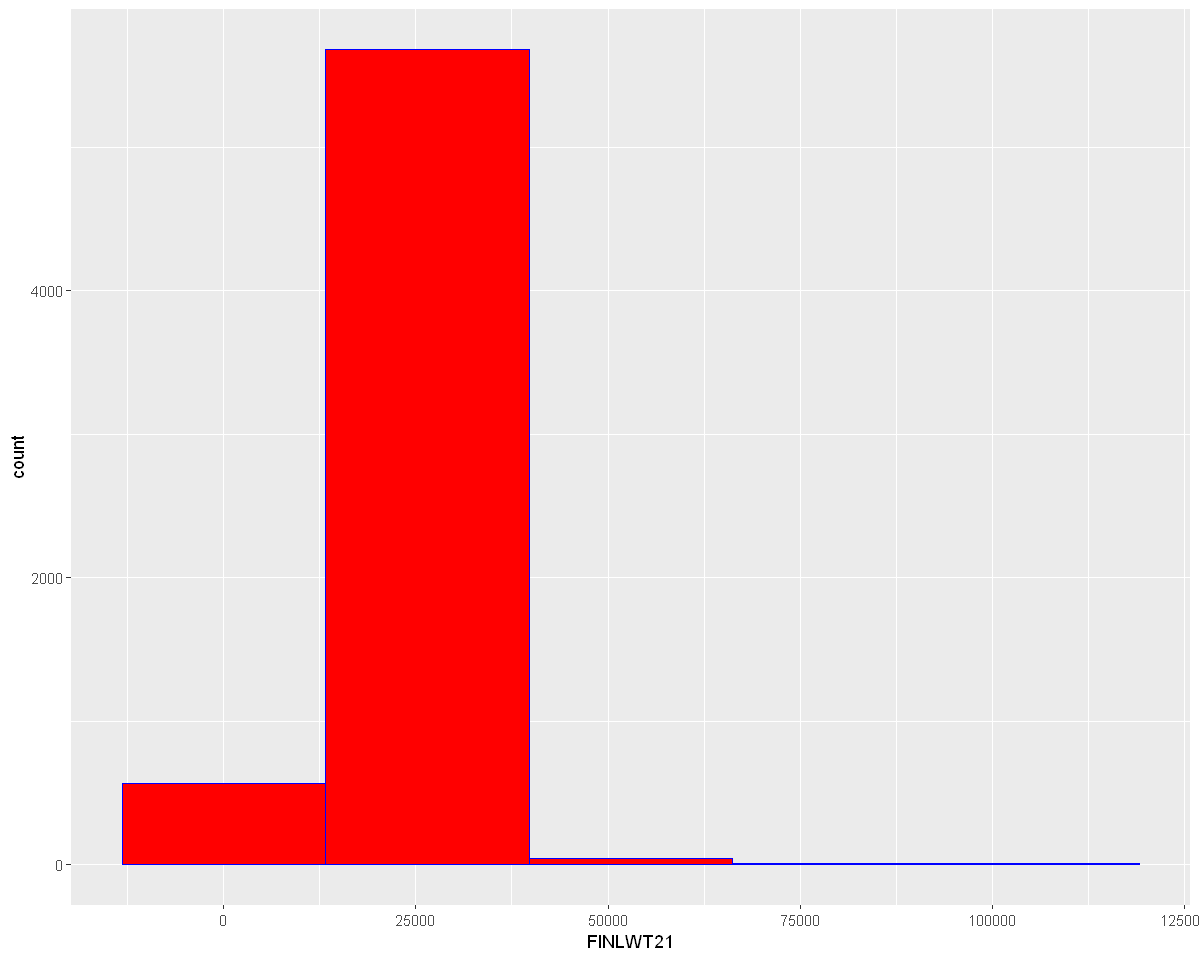

In [23]:


weights <- ce_csv["FINLWT21"]
ggplot(ce_csv, aes(FINLWT21)) + 
geom_histogram(bins=5, fill="red", color="blue")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


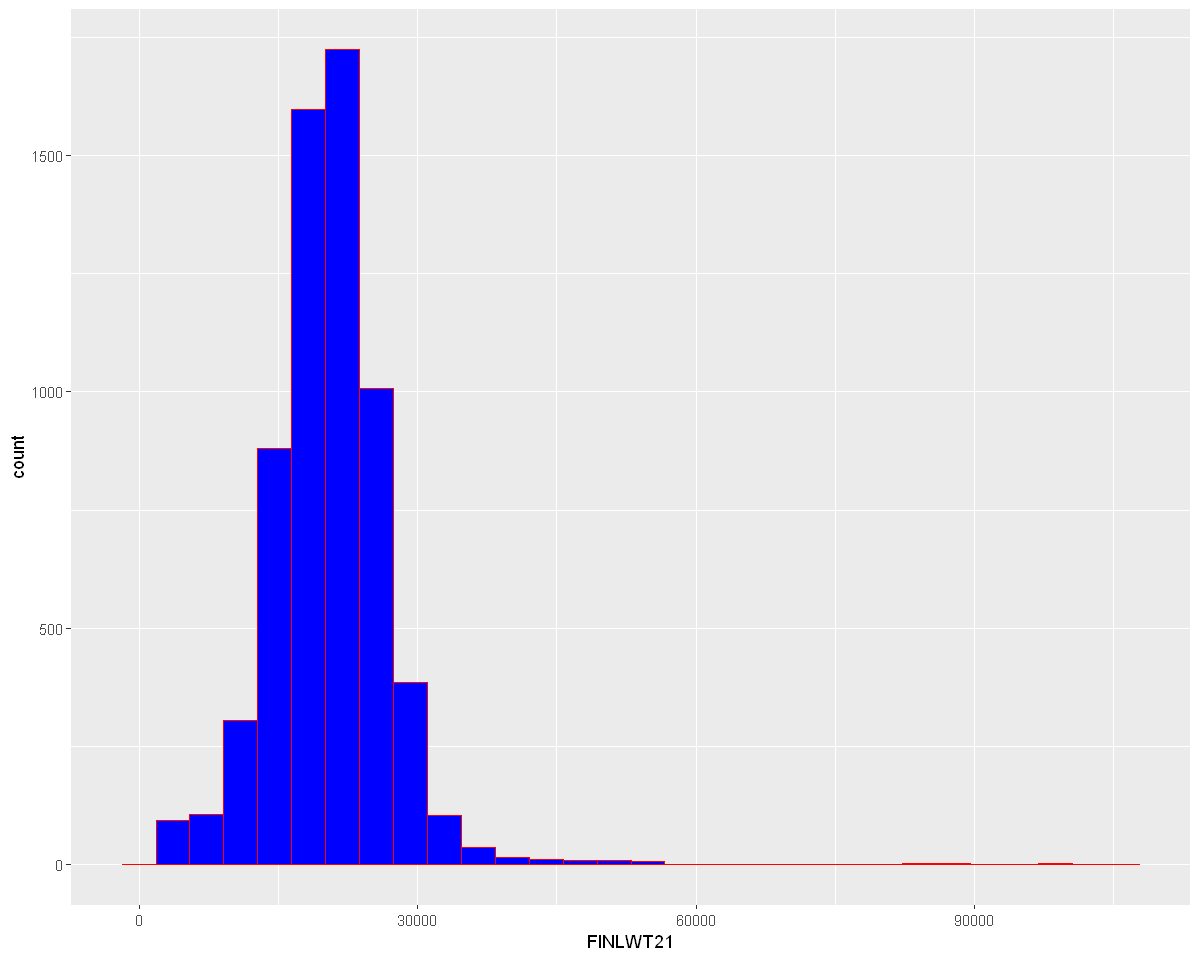

In [24]:
weights <- ce_csv["FINLWT21"]
ggplot(ce_csv, aes(FINLWT21)) + 
geom_histogram(fill="blue", color="red")

The distribution represented by the histogram with 30 bins is a little bit similar to the normal distribution.

<b> Experimenting with different random sampling techniques using api datasets of the survey package. </b>
<p>
The api dataset contains the Academic Performance Index and demographic information for schools in California.
</p>

In [25]:
install.packages('survey', repos='http://cran.us.r-project.org')
library(survey)

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'survey' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\RtmpwxX20m\downloaded_packages


Warning message:
"package 'survey' was built under R version 3.5.3"Loading required package: grid
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand

Loading required package: survival

Attaching package: 'survey'

The following object is masked from 'package:graphics':

    dotchart



## Creating survey design objects (svydesign) with the Api school district data set
 <p> </p>

In [26]:
data(api)

In [27]:
str(apisrs)


'data.frame':	200 obs. of  39 variables:
 $ cds     : chr  "15739081534155" "19642126066716" "30664493030640" "19644516012744" ...
 $ stype   : Factor w/ 3 levels "E","H","M": 2 1 2 1 1 1 3 1 1 1 ...
 $ name    : chr  "McFarland High" "Stowers (Cecil " "Brea-Olinda Hig" "Alameda Element" ...
 $ sname   : chr  "McFarland High" "Stowers (Cecil B.) Elementary" "Brea-Olinda High" "Alameda Elementary" ...
 $ snum    : num  1039 1124 2868 1273 4926 ...
 $ dname   : chr  "McFarland Unified" "ABC Unified" "Brea-Olinda Unified" "Downey Unified" ...
 $ dnum    : int  432 1 79 187 640 284 401 401 470 632 ...
 $ cname   : chr  "Kern" "Los Angeles" "Orange" "Los Angeles" ...
 $ cnum    : int  14 18 29 18 39 18 18 18 18 37 ...
 $ flag    : int  NA NA NA NA NA NA NA NA NA NA ...
 $ pcttest : int  98 100 98 99 99 93 98 99 100 90 ...
 $ api00   : int  462 878 734 772 739 835 456 506 543 649 ...
 $ api99   : int  448 831 742 657 719 822 472 474 458 604 ...
 $ target  : int  18 NA 3 7 4 NA 16 16 17 10 ..

<b> Simple random design </b> <br>
A survey design is created with a survey design object "svydesign", where the features of the object are stored.

In [28]:
# Specify a simple random sampling for apisrs
apisrs_design <- svydesign(data = apisrs, weights = ~pw, fpc = ~fpc, id = ~1)

# Produce a summary of the design
summary(apisrs_design)

Independent Sampling design
svydesign(data = apisrs, weights = ~pw, fpc = ~fpc, id = ~1)
Probabilities:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03229 0.03229 0.03229 0.03229 0.03229 0.03229 
Population size (PSUs): 6194 
Data variables:
 [1] "cds"      "stype"    "name"     "sname"    "snum"     "dname"   
 [7] "dnum"     "cname"    "cnum"     "flag"     "pcttest"  "api00"   
[13] "api99"    "target"   "growth"   "sch.wide" "comp.imp" "both"    
[19] "awards"   "meals"    "ell"      "yr.rnd"   "mobility" "acs.k3"  
[25] "acs.46"   "acs.core" "pct.resp" "not.hsg"  "hsg"      "some.col"
[31] "col.grad" "grad.sch" "avg.ed"   "full"     "emer"     "enroll"  
[37] "api.stu"  "pw"       "fpc"     

<b> Stratified designs in R </b>

In [29]:
# Stratified designs in R
glimpse(apistrat)

Observations: 200
Variables: 39
$ cds      <chr> "19647336097927", "19647336016018", "19648816021505", "196...
$ stype    <fct> E, E, E, E, E, E, E, E, E, E, M, M, H, M, H, E, E, M, M, E...
$ name     <chr> "Open Magnet: Ce", "Belvedere Eleme", "Altadena Elemen", "...
$ sname    <chr> "Open Magnet: Center for Individual (Char", "Belvedere Ele...
$ snum     <dbl> 2077, 1622, 2236, 1921, 6140, 6077, 6071, 904, 4637, 4311,...
$ dname    <chr> "Los Angeles Unified", "Los Angeles Unified", "Pasadena Un...
$ dnum     <int> 401, 401, 541, 401, 460, 689, 689, 41, 702, 135, 590, 767,...
$ cname    <chr> "Los Angeles", "Los Angeles", "Los Angeles", "Los Angeles"...
$ cnum     <int> 18, 18, 18, 18, 55, 55, 55, 14, 36, 36, 35, 32, 9, 1, 32, ...
$ flag     <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ pcttest  <int> 99, 100, 99, 100, 100, 100, 99, 98, 100, 100, 99, 99, 93, ...
$ api00    <int> 840, 516, 531, 501, 720, 805, 778, 731, 592, 669, 496, 505...
$ api99    <int> 816

In [30]:
# The schools are stratified based on the school type stype where E = Elementary, M = Middle, and H = High School.
#  weights are stored in pw and fpc contains the total number of schools in each school type.
# Glimpse the data
glimpse(apistrat)

# Summarize strata sample sizes
apistrat %>%
  count(stype)

# Specify the design
apistrat_design <- svydesign(data = apistrat, weights = ~pw, fpc = ~fpc, id = ~1, strata = ~stype)

# Look at the summary information stored in the design object
summary(apistrat_design)

Observations: 200
Variables: 39
$ cds      <chr> "19647336097927", "19647336016018", "19648816021505", "196...
$ stype    <fct> E, E, E, E, E, E, E, E, E, E, M, M, H, M, H, E, E, M, M, E...
$ name     <chr> "Open Magnet: Ce", "Belvedere Eleme", "Altadena Elemen", "...
$ sname    <chr> "Open Magnet: Center for Individual (Char", "Belvedere Ele...
$ snum     <dbl> 2077, 1622, 2236, 1921, 6140, 6077, 6071, 904, 4637, 4311,...
$ dname    <chr> "Los Angeles Unified", "Los Angeles Unified", "Pasadena Un...
$ dnum     <int> 401, 401, 541, 401, 460, 689, 689, 41, 702, 135, 590, 767,...
$ cname    <chr> "Los Angeles", "Los Angeles", "Los Angeles", "Los Angeles"...
$ cnum     <int> 18, 18, 18, 18, 55, 55, 55, 14, 36, 36, 35, 32, 9, 1, 32, ...
$ flag     <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ pcttest  <int> 99, 100, 99, 100, 100, 100, 99, 98, 100, 100, 99, 99, 93, ...
$ api00    <int> 840, 516, 531, 501, 720, 805, 778, 731, 592, 669, 496, 505...
$ api99    <int> 816

stype,n
E,100
H,50
M,50


Stratified Independent Sampling design
svydesign(data = apistrat, weights = ~pw, fpc = ~fpc, id = ~1, 
    strata = ~stype)
Probabilities:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02262 0.02262 0.03587 0.04014 0.05339 0.06623 
Stratum Sizes: 
             E  H  M
obs        100 50 50
design.PSU 100 50 50
actual.PSU 100 50 50
Population stratum sizes (PSUs): 
   E    H    M 
4421  755 1018 
Data variables:
 [1] "cds"      "stype"    "name"     "sname"    "snum"     "dname"   
 [7] "dnum"     "cname"    "cnum"     "flag"     "pcttest"  "api00"   
[13] "api99"    "target"   "growth"   "sch.wide" "comp.imp" "both"    
[19] "awards"   "meals"    "ell"      "yr.rnd"   "mobility" "acs.k3"  
[25] "acs.46"   "acs.core" "pct.resp" "not.hsg"  "hsg"      "some.col"
[31] "col.grad" "grad.sch" "avg.ed"   "full"     "emer"     "enroll"  
[37] "api.stu"  "pw"       "fpc"     

<b> Cluster designs in R </b>

In [31]:
# Cluster designs in R
# Clusters: dnum, snum
# Glimpse the data
# fpc1: the number of districts is given
# fpc2: number of schools in the sampled districts

glimpse(apiclus2)
names(apiclus2)

# Specify the design
apiclus_design <- svydesign(id = ~dnum + snum, data = apiclus2, weights = ~pw, fpc = ~fpc1 + fpc2)

#Look at the summary information stored in the design object
summary(apiclus_design)

Observations: 126
Variables: 40
$ cds      <chr> "31667796031017", "55751846054837", "41688746043517", "416...
$ stype    <fct> E, E, E, M, E, E, E, E, M, H, E, M, E, E, E, E, H, E, E, M...
$ name     <chr> "Alta-Dutch Flat", "Tenaya Elementa", "Panorama Elemen", "...
$ sname    <chr> "Alta-Dutch Flat Elementary", "Tenaya Elementary", "Panora...
$ snum     <dbl> 3269, 5979, 4958, 4957, 4956, 4915, 2548, 2550, 2549, 348,...
$ dname    <chr> "Alta-Dutch Flat Elem", "Big Oak Flat-Grvlnd Unif", "Brisb...
$ dnum     <int> 15, 63, 83, 83, 83, 117, 132, 132, 132, 152, 152, 152, 173...
$ cname    <chr> "Placer", "Tuolumne", "San Mateo", "San Mateo", "San Mateo...
$ cnum     <int> 30, 54, 40, 40, 40, 39, 19, 19, 19, 5, 5, 5, 36, 36, 36, 3...
$ flag     <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ pcttest  <int> 100, 100, 98, 100, 98, 100, 100, 100, 100, 96, 98, 100, 10...
$ api00    <int> 821, 773, 600, 740, 716, 811, 472, 520, 568, 591, 544, 612...
$ api99    <int> 785

[1] "cds"      "stype"    "name"     "sname"    "snum"     "dname"   
 [7] "dnum"     "cname"    "cnum"     "flag"     "pcttest"  "api00"   
[13] "api99"    "target"   "growth"   "sch.wide" "comp.imp" "both"    
[19] "awards"   "meals"    "ell"      "yr.rnd"   "mobility" "acs.k3"  
[25] "acs.46"   "acs.core" "pct.resp" "not.hsg"  "hsg"      "some.col"
[31] "col.grad" "grad.sch" "avg.ed"   "full"     "emer"     "enroll"  
[37] "api.stu"  "pw"       "fpc1"     "fpc2"

2 - level Cluster Sampling design
With (40, 126) clusters.
svydesign(id = ~dnum + snum, data = apiclus2, weights = ~pw, 
    fpc = ~fpc1 + fpc2)
Probabilities:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.003669 0.037743 0.052840 0.042390 0.052840 0.052840 
Population size (PSUs): 757 
Data variables:
 [1] "cds"      "stype"    "name"     "sname"    "snum"     "dname"   
 [7] "dnum"     "cname"    "cnum"     "flag"     "pcttest"  "api00"   
[13] "api99"    "target"   "growth"   "sch.wide" "comp.imp" "both"    
[19] "awards"   "meals"    "ell"      "yr.rnd"   "mobility" "acs.k3"  
[25] "acs.46"   "acs.core" "pct.resp" "not.hsg"  "hsg"      "some.col"
[31] "col.grad" "grad.sch" "avg.ed"   "full"     "emer"     "enroll"  
[37] "api.stu"  "pw"       "fpc1"     "fpc2"    

Construct histogram of pw for the simmple random sampling design. <br> 
As all survey weights are equal there is only one bin.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Computation failed in `stat_bin()`:
`binwidth` must be positive"

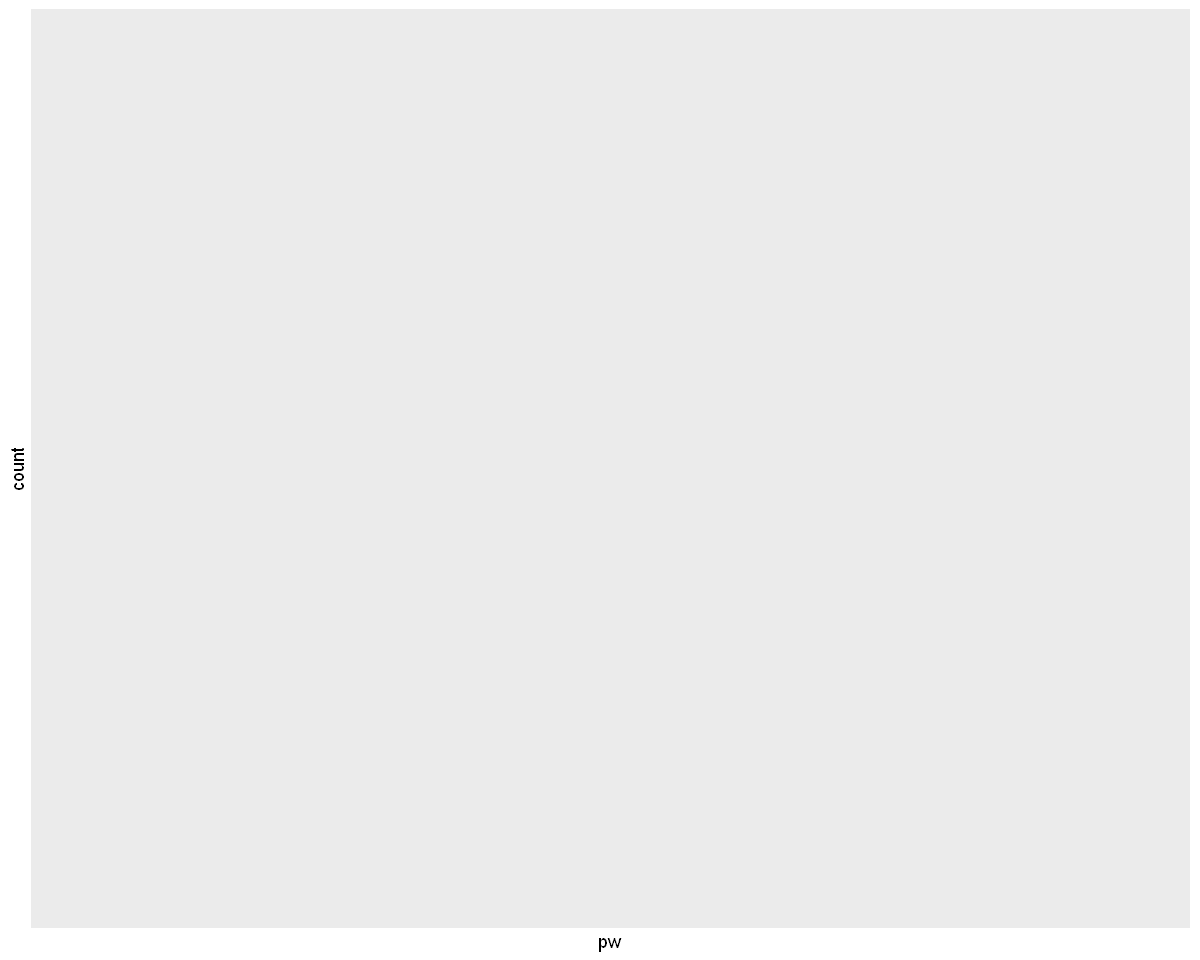

In [32]:

ggplot(data = apisrs,
       mapping = aes(x = pw)) + 
    geom_histogram(color="orange", fill = "orange")

Construct histogram of survey weights (pw) for the stratified random sampling design. <br>
For a stratified units have an unequal chance of being sampled and that is reflected in the survey weight. <br>
This results in a distribution of three bins as three strata were selected.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


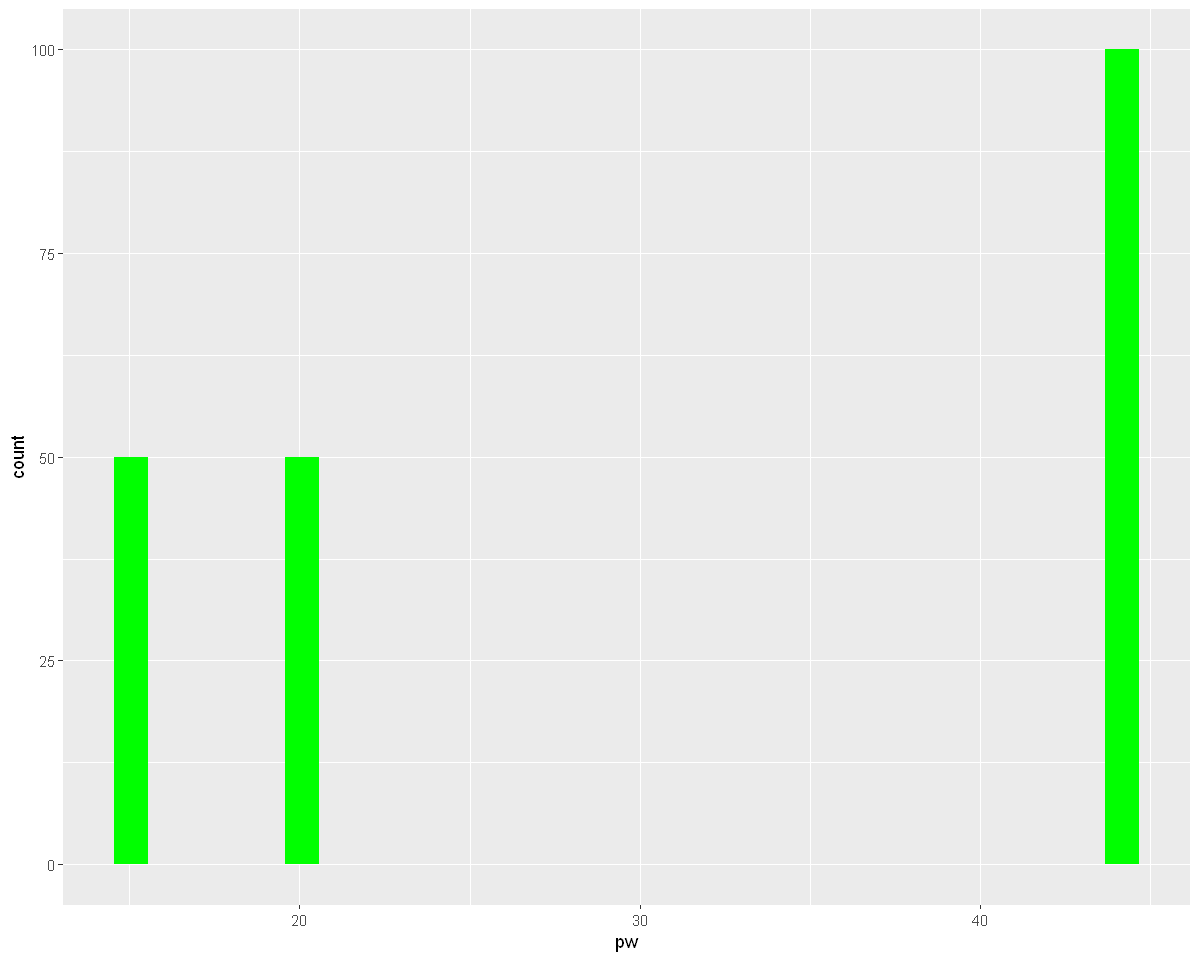

In [33]:
ggplot(data = apistrat,
       mapping = aes(x = pw)) + 
    geom_histogram(fill="green")
    

Construct histogram of survey weights (pw) for the cluster sampling design.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


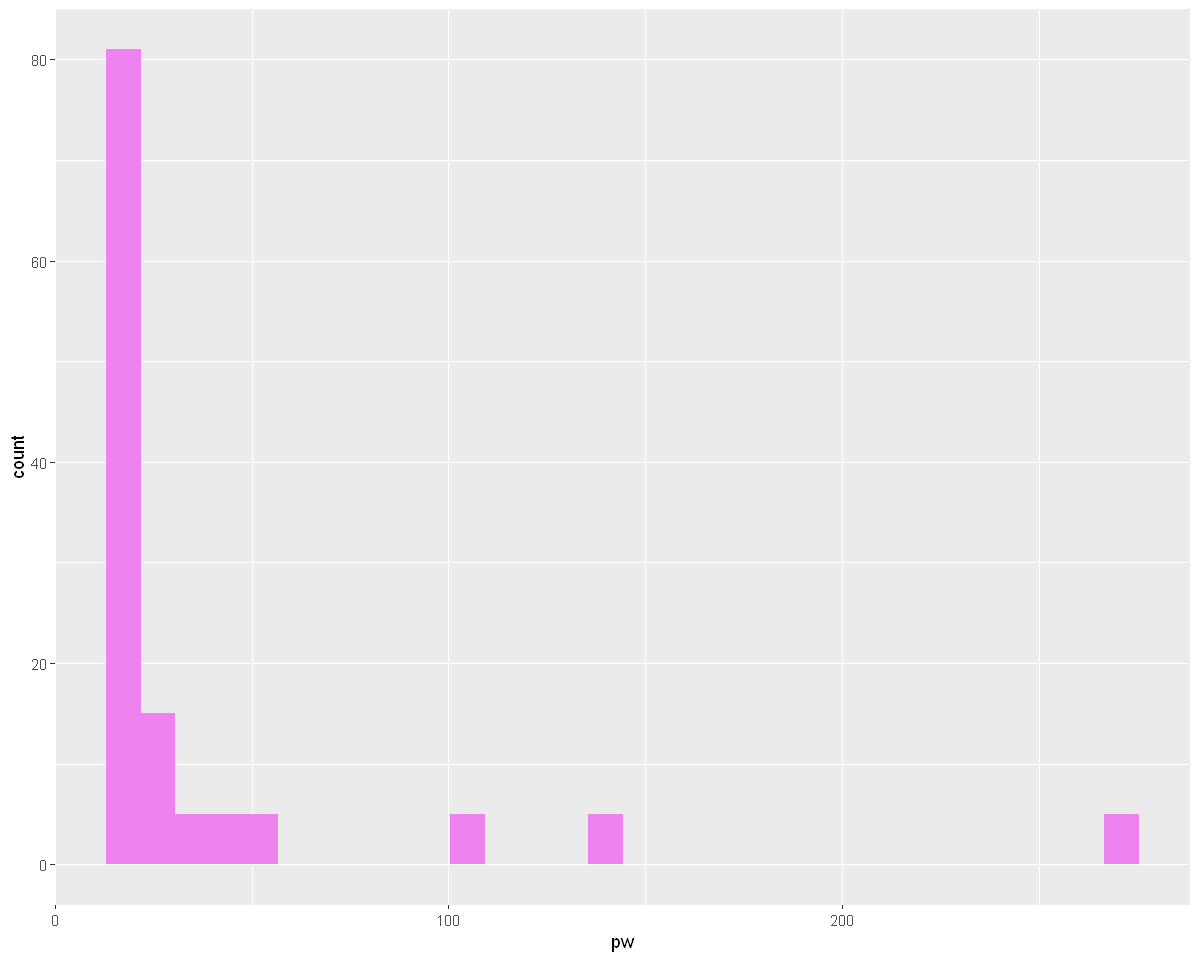

In [34]:

ggplot(data = apiclus2,
       mapping = aes(x = pw)) + 
    geom_histogram(fill="violet")

<b>National Health and Nutrition Examination Survey (NHANES)</b>
<p> Conducted by the U.S. National Center for Health Statistics.
Goal: Understand the health of adults and children in the US.
It is collected	using a	4 stage	design.</p>
<p> More information on the [coding](https://www.rdocumentation.org/packages/survey/versions/3.34/topics/nhanes) of the
data set.</p>

In [35]:
install.packages("NHANES", repos='http://cran.us.r-project.org')
library(NHANES)

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'NHANES' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\RtmpwxX20m\downloaded_packages


Warning message:
"package 'NHANES' was built under R version 3.5.3"

In [36]:
data(NHANES)
# list datasets in NHANES
data(package = "NHANES")

In [37]:
dim(NHANESraw)

[1] 20293    78

In [38]:
str(NHANESraw)

Classes 'tbl_df', 'tbl' and 'data.frame':	20293 obs. of  78 variables:
 $ ID              : int  51624 51625 51626 51627 51628 51629 51630 51631 51632 51633 ...
 $ SurveyYr        : Factor w/ 2 levels "2009_10","2011_12": 1 1 1 1 1 1 1 1 1 1 ...
 $ Gender          : Factor w/ 2 levels "female","male": 2 2 2 2 1 2 1 1 2 2 ...
 $ Age             : int  34 4 16 10 60 26 49 1 10 80 ...
 $ AgeMonths       : int  409 49 202 131 722 313 596 12 124 NA ...
 $ Race1           : Factor w/ 5 levels "Black","Hispanic",..: 4 5 1 1 1 3 4 4 2 4 ...
 $ Race3           : Factor w/ 6 levels "Asian","Black",..: NA NA NA NA NA NA NA NA NA NA ...
 $ Education       : Factor w/ 5 levels "8th Grade","9 - 11th Grade",..: 3 NA NA NA 3 2 4 NA NA 4 ...
 $ MaritalStatus   : Factor w/ 6 levels "Divorced","LivePartner",..: 3 NA NA NA 6 3 2 NA NA 3 ...
 $ HHIncome        : Factor w/ 12 levels "0-4999","10000-14999",..: 5 4 7 4 2 5 6 6 10 3 ...
 $ HHIncomeMid     : int  30000 22500 50000 22500 12500 30000 40000 40000 

In [39]:
sort(names(NHANESraw))

[1] "Age"              "Age1stBaby"       "AgeFirstMarij"    "AgeMonths"       
 [5] "AgeRegMarij"      "Alcohol12PlusYr"  "AlcoholDay"       "AlcoholYear"     
 [9] "BMI"              "BMI_WHO"          "BMICatUnder20yrs" "BPDia1"          
[13] "BPDia2"           "BPDia3"           "BPDiaAve"         "BPSys1"          
[17] "BPSys2"           "BPSys3"           "BPSysAve"         "CompHrsDay"      
[21] "CompHrsDayChild"  "DaysMentHlthBad"  "DaysPhysHlthBad"  "Depressed"       
[25] "Diabetes"         "DiabetesAge"      "DirectChol"       "Education"       
[29] "Gender"           "HardDrugs"        "HeadCirc"         "HealthGen"       
[33] "Height"           "HHIncome"         "HHIncomeMid"      "HomeOwn"         
[37] "HomeRooms"        "ID"               "Length"           "LittleInterest"  
[41] "Marijuana"        "MaritalStatus"    "nBabies"          "nPregnancies"    
[45] "PhysActive"       "PhysActiveDays"   "Poverty"          "PregnantNow"     
[49] "Pulse"            "Race1"            "Race3"            "RegularMarij"    
[53] "SameSex"          "SDMVPSU"          "SDMVSTRA"         "SexAge"          
[57] "SexEver"          "SexNumPartnLife"  "SexNumPartYear"   "SexOrientation"  
[61] "SleepHrsNight"    "SleepTrouble"     "Smoke100"         "SmokeAge"        
[65] "SmokeNow"         "SurveyYr"         "Testosterone"     "TotChol"         
[69] "TVHrsDay"         "TVHrsDayChild"    "UrineFlow1"       "UrineFlow2"      
[73] "UrineVol1"        "UrineVol2"        "Weight"           "Work"            
[77] "WTINT2YR"         "WTMEC2YR"

In [40]:
summary(NHANESraw[c("Gender", "Education", "Race1")])

    Gender               Education         Race1     
 female:10212   8th Grade     :1321   Black   :4640  
 male  :10081   9 - 11th Grade:1787   Hispanic:2209  
                High School   :2595   Mexican :3739  
                Some College  :3399   White   :7393  
                College Grad  :2656   Other   :2312  
                NA's          :8535                  

In [41]:
head((NHANESraw))

ID,SurveyYr,Gender,Age,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,PregnantNow
51624,2009_10,male,34,409,White,NA,High School,Married,25000-34999,...,16,8,1,No,Heterosexual,80100.54,81528.77,1,83,NA
51625,2009_10,male,4,49,Other,NA,NA,NA,20000-24999,...,NA,NA,NA,NA,NA,53901.10,56995.04,2,79,NA
51626,2009_10,male,16,202,Black,NA,NA,NA,45000-54999,...,NA,NA,NA,NA,NA,13953.08,14509.28,1,84,NA
51627,2009_10,male,10,131,Black,NA,NA,NA,20000-24999,...,NA,NA,NA,NA,NA,11664.90,12041.64,2,86,NA
51628,2009_10,female,60,722,Black,NA,High School,Widowed,10000-14999,...,15,4,NA,No,NA,20090.34,21000.34,2,75,NA
51629,2009_10,male,26,313,Mexican,NA,9 - 11th Grade,Married,25000-34999,...,9,10,1,No,Heterosexual,22537.83,22633.58,1,88,NA


In [42]:
tail(NHANESraw)

ID,SurveyYr,Gender,Age,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,PregnantNow
71911,2011_12,male,27,NA,Mexican,Mexican,College Grad,Married,75000-99999,...,21,1,1,No,Heterosexual,42165.370,43039.787,2,102,NA
71912,2011_12,male,40,NA,White,White,8th Grade,Married,25000-34999,...,14,15,15,No,Heterosexual,19633.637,20770.138,1,98,NA
71913,2011_12,female,18,NA,Other,Asian,NA,NA,75000-99999,...,NA,0,0,No,Heterosexual,7382.152,8028.486,1,94,NA
71914,2011_12,female,10,NA,White,White,NA,NA,75000-99999,...,NA,NA,NA,NA,NA,60197.257,63931.532,2,94,NA
71915,2011_12,male,60,NA,White,White,College Grad,NeverMarried,65000-74999,...,19,2,NA,No,NA,88961.259,91446.592,3,90,NA
71916,2011_12,male,16,NA,White,White,NA,NA,15000-19999,...,NA,NA,NA,NA,NA,24446.632,24751.360,1,94,NA


In [43]:
sum(sum(is.na(NHANESraw)))

[1] 680140

In [44]:
# WTMEC2YR are the survey weights. The number of people in the US each sample person represents. 
# The sum of survey weights equals roughly the US population.
# As 4 years of data are given, while WTMEC2YR assumes 2 years of data, 
#the survey weights must be divided by 2 to get the US population.
summarize(NHANESraw, Sum_survey_weights = sum(WTMEC2YR)/2)

Sum_survey_weights
304267200


In [45]:
NHANESraw <- mutate(NHANESraw,WTMEC4YR = WTMEC2YR/2 )

In [46]:
# Specify survey design.
#  id are the variables, which represents the clusters.

NHANES_design <- svydesign(id = ~SDMVPSU, data = NHANESraw, weights = ~WTMEC4YR, strata	= ~SDMVSTRA, nest=TRUE)
distinct(NHANESraw, SDMVPSU)

# Three clusters are given in one variable (SDMVPSU).
# nest = True becausethe cluster ID's are nested within the strata.


SDMVPSU
1
2
3


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


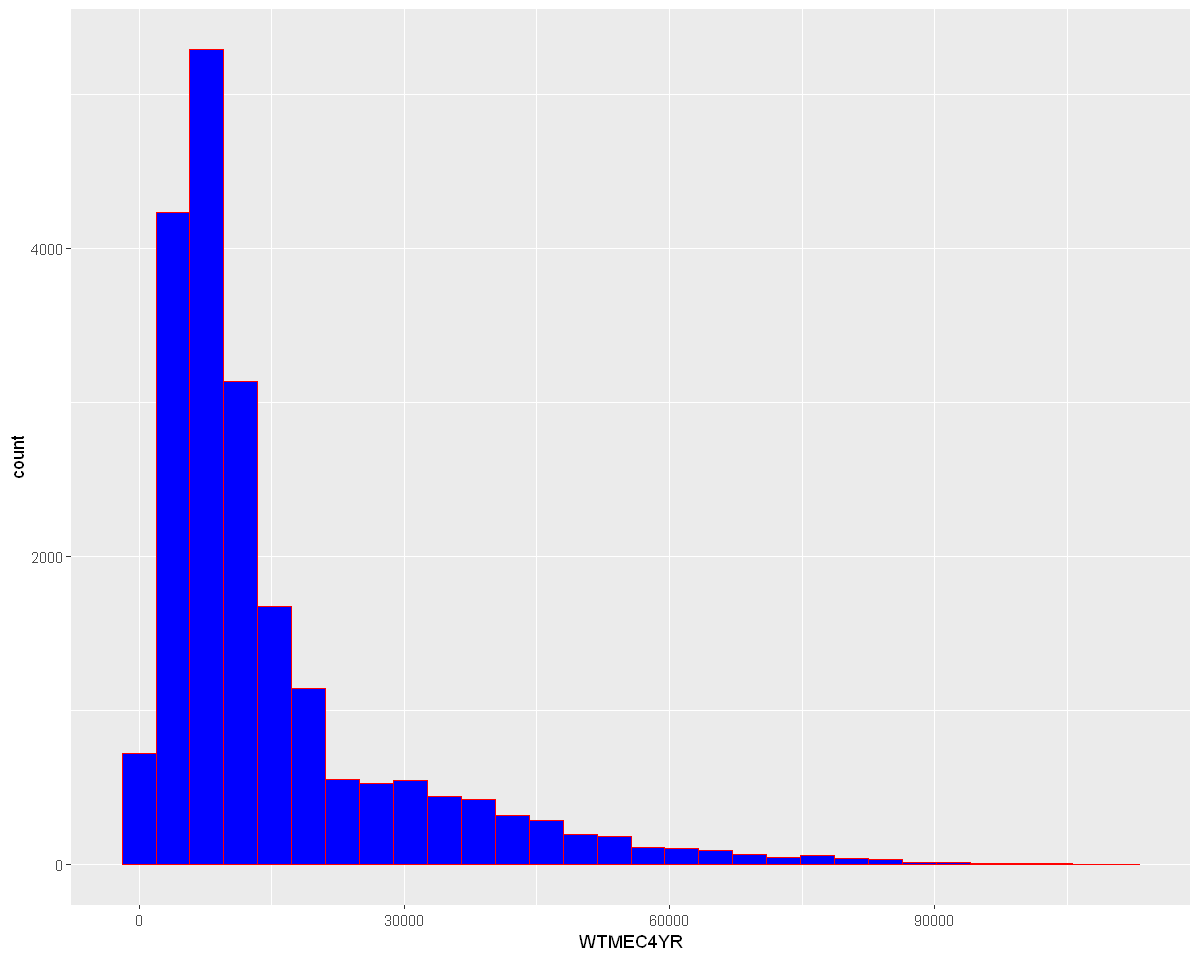

In [47]:
ggplot(NHANESraw, aes(x=WTMEC4YR)) +
geom_histogram(color="red", fill="blue")

In [48]:
# The sizes of the ethnic groups (Race1) are different. Accordingly the survey weights must be different.
# Ohterwise the weight of a ethnic group could be different.
# Check if the survey weights are proportional to the size of the ethnic group.

table_weights_by_race <- NHANESraw %>% group_by(Race1) %>% summarise(average = mean(WTMEC4YR), sum = sum(WTMEC4YR))
table_weights_by_race_2 <- NHANESraw %>% group_by(Race3) %>% summarise(average = mean(WTMEC4YR), sum = sum(WTMEC4YR))

print(table_weights_by_race)
print(table_weights_by_race_2)


# A tibble: 5 x 3
  Race1    average        sum
  <fct>      <dbl>      <dbl>
1 Black      8026.  37241616.
2 Hispanic   8579.  18951150.
3 Mexican    8216.  30719158.
4 White     26236. 193966274.
5 Other     10116.  23389002.
# A tibble: 7 x 3
  Race3    average        sum
  <fct>      <dbl>      <dbl>
1 Asian      6053.   7759765.
2 Black      7106.  19065769.
3 Hispanic   9952.  10708082.
4 Mexican   11001.  14906158.
5 White     32412.  96360633.
6 Other     11615.   4494934.
7 NA        14328. 150971860.


In [49]:
summary(NHANES_design)

Stratified 1 - level Cluster Sampling design (with replacement)
With (62) clusters.
svydesign(id = ~SDMVPSU, data = NHANESraw, weights = ~WTMEC4YR, 
    strata = ~SDMVSTRA, nest = TRUE)
Probabilities:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
8.986e-06 5.664e-05 1.054e-04       Inf 1.721e-04       Inf 
Stratum Sizes: 
            75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
obs        803 785 823 829 696 751 696 724 713 683 592 946 598 647 251 862 998
design.PSU   2   2   2   2   2   2   2   2   2   2   2   3   2   2   2   3   3
actual.PSU   2   2   2   2   2   2   2   2   2   2   2   3   2   2   2   3   3
            92  93  94  95  96  97  98  99 100 101 102 103
obs        875 602 688 722 676 608 708 682 700 715 624 296
design.PSU   3   2   2   2   2   2   2   2   2   2   2   2
actual.PSU   3   2   2   2   2   2   2   2   2   2   2   2
Data variables:
 [1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeMon

In [50]:
# calculate the number of distinct cluster in NHANESraw
NHANESraw %>% summarize(n_clusters=n_distinct(SDMVSTRA, SDMVPSU))

n_clusters
62


In [51]:
# SDMVSTRA: strata assignment /SDMVPSU: cluster id within a given stratum. 
data.frame(NHANESraw[1:10, "SDMVSTRA"], NHANESraw[1:10, "SDMVPSU"])

SDMVSTRA,SDMVPSU
83,1
79,2
84,1
86,2
75,2
88,1
85,2
86,2
88,2
77,1


In [52]:
# determining the sample size in each cluster.

count_sample_size <- count(NHANESraw,SDMVSTRA, SDMVPSU)
count_sample_size[1:10,1:3]
dim(count_sample_size)

SDMVSTRA,SDMVPSU,n
75,1,379
75,2,424
76,1,419
76,2,366
77,1,441
77,2,382
78,1,378
78,2,451
79,1,349
79,2,347


[1] 62  3

## NHANES:	visualizing	race

In [53]:
# Use sample sizes to estimate the population size
# Note minority groups are oversampled to ensure adequate sample sizes within each group
tab_race_unweighted <- NHANESraw %>% group_by(Race1) %>% summarise(Freq=n()) %>% 
mutate(Proportions = Freq / sum(Freq)) %>% arrange(desc(Proportions))
print(tab_race_unweighted)

# A tibble: 5 x 3
  Race1     Freq Proportions
  <fct>    <int>       <dbl>
1 White     7393       0.364
2 Black     4640       0.229
3 Mexican   3739       0.184
4 Other     2312       0.114
5 Hispanic  2209       0.109


In [54]:
install.packages("RColorBrewer", repos='http://cran.us.r-project.org')
library(RColorBrewer)

Installing package into 'C:/Users/gamarandor/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gamarandor\AppData\Local\Temp\RtmpwxX20m\downloaded_packages


Warning message:
"package 'RColorBrewer' was built under R version 3.5.2"

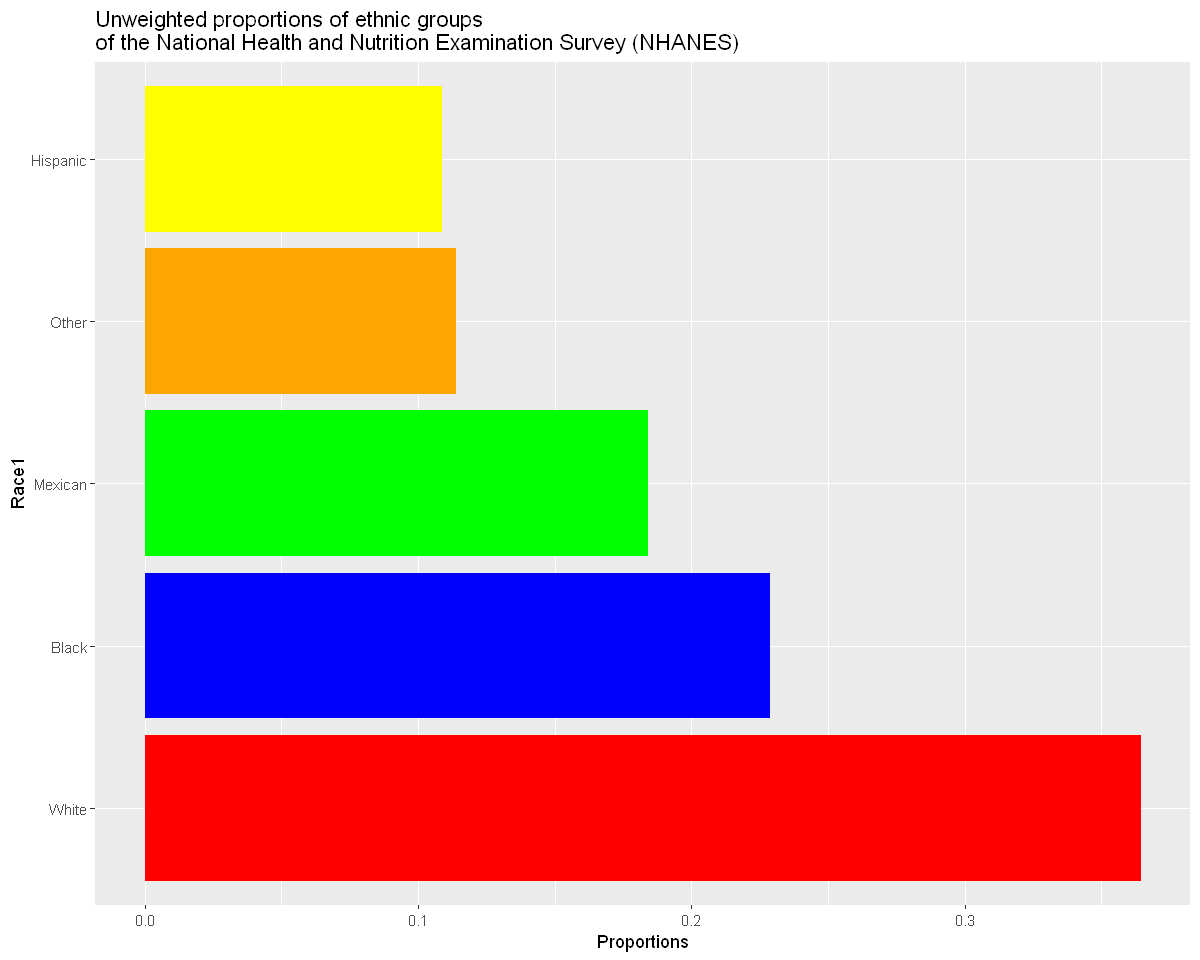

In [55]:
tab_race_unweighted %>% ggplot(aes(x= Race1, y=Proportions)) +
geom_col(fill=c("red", "blue", "green", "orange", "yellow")) +
coord_flip() +
scale_x_discrete(limits= tab_race_unweighted$Race1) +
ggtitle("Unweighted proportions of ethnic groups\nof the National Health and Nutrition Examination Survey (NHANES)")


In [56]:
# The svytable function computes a weighted crosstabulation. This is especially useful for producing graphics. 
tab_weighted <- svytable(~Race1, design = NHANES_design) %>%
as.data.frame() %>%
mutate(Proportions=Freq/sum(Freq))%>%
arrange(desc(Proportions))
print(tab_weighted )

     Race1      Freq Proportions
1    White 193966274  0.63748664
2    Black  37241616  0.12239773
3  Mexican  30719158  0.10096112
4    Other  23389002  0.07686994
5 Hispanic  18951150  0.06228456


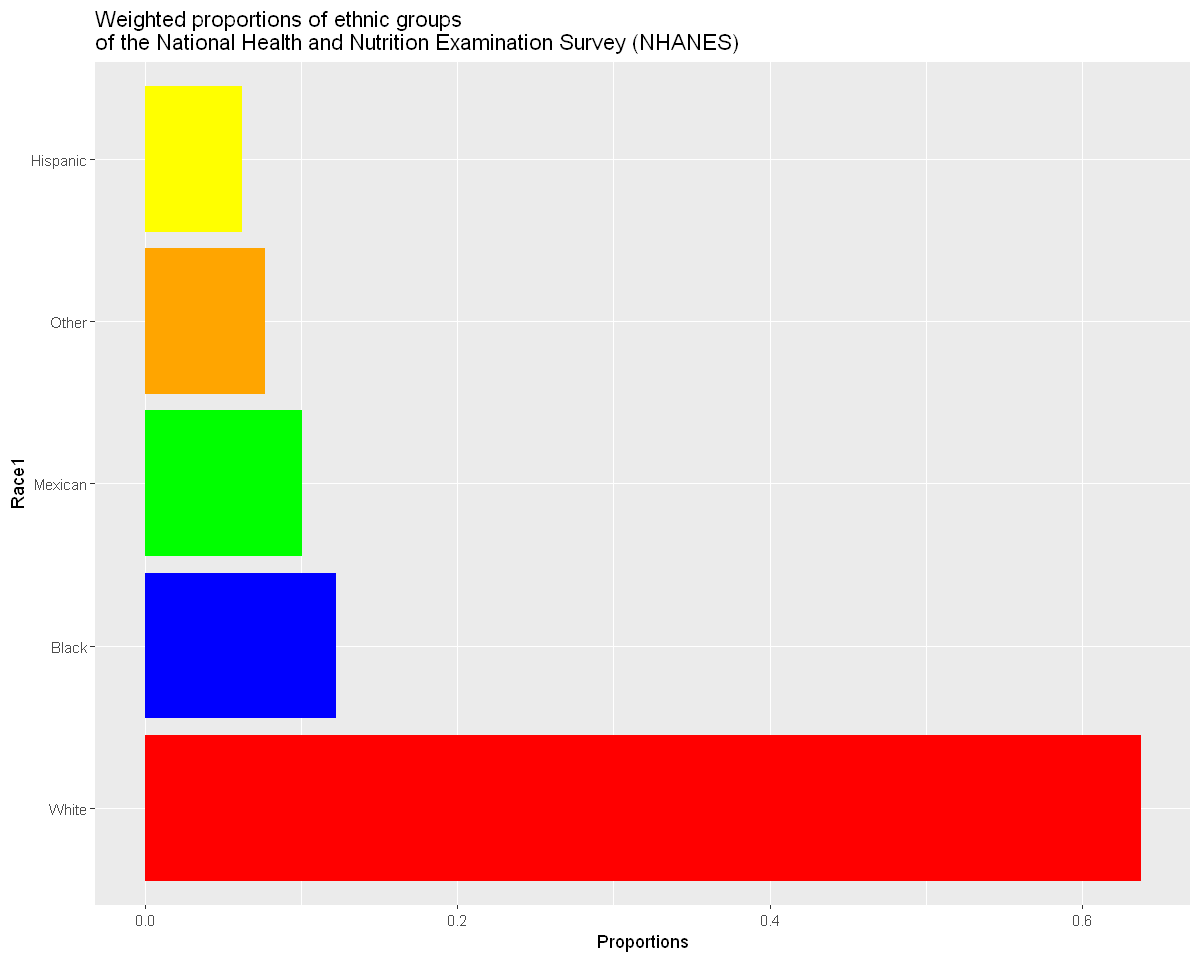

In [57]:
tab_weighted  %>% ggplot(aes(x= Race1, y=Proportions)) +
geom_col(fill=c("red", "blue", "green", "orange", "yellow")) +
coord_flip() +
scale_x_discrete(limits= tab_weighted$Race1) +
ggtitle("Weighted proportions of ethnic groups\nof the National Health and Nutrition Examination Survey (NHANES)")

<b> Exploring the categorical variable "Depressed" </b>

In [58]:
# Depressed, gives the self-reported frequency in which a participant felt depressed. 
NHANESraw[1:10, "Depressed"]

Depressed
Several
NA
NA
NA
Most
Most
Several
NA
NA
None


In [59]:

# It is only reported for participants aged 18 years or older. 
# Specify the survey design

NHANESraw <- mutate(NHANESraw, WTMEC4YR = .5 * WTMEC2YR)
NHANES_design <- svydesign(data = NHANESraw, strata = ~SDMVSTRA, id = ~SDMVPSU, nest = TRUE, weights = ~WTMEC4YR)

In [60]:
levels(NHANES$Depressed)
table(NHANES$Depressed)
# Interpretation: 418 of the respondents answered they were depressed most of the times.

[1] "None"    "Several" "Most"


   None Several    Most 
   5246    1009     418 

In [61]:
# Construct a frequency table of Depressed
freq_tab_w <- svytable(~Depressed, design = NHANES_design)
freq_tab_w
# Interpretation: Based on the samples 12704441 Americans feel depressed most of the times.

Depressed
     None   Several      Most 
158758609  32732508  12704441 

In [62]:
class(freq_tab_w)

[1] "svytable" "xtabs"    "table"

In [63]:
# Visualize with a bar graph
dep_prop <- freq_tab_w %>% as.data.frame() %>% mutate(Proportions = Freq / sum(Freq))
dep_prop 


Depressed,Freq,Proportions
None,158758609,0.77748316
Several,32732508,0.16029981
Most,12704441,0.06221703


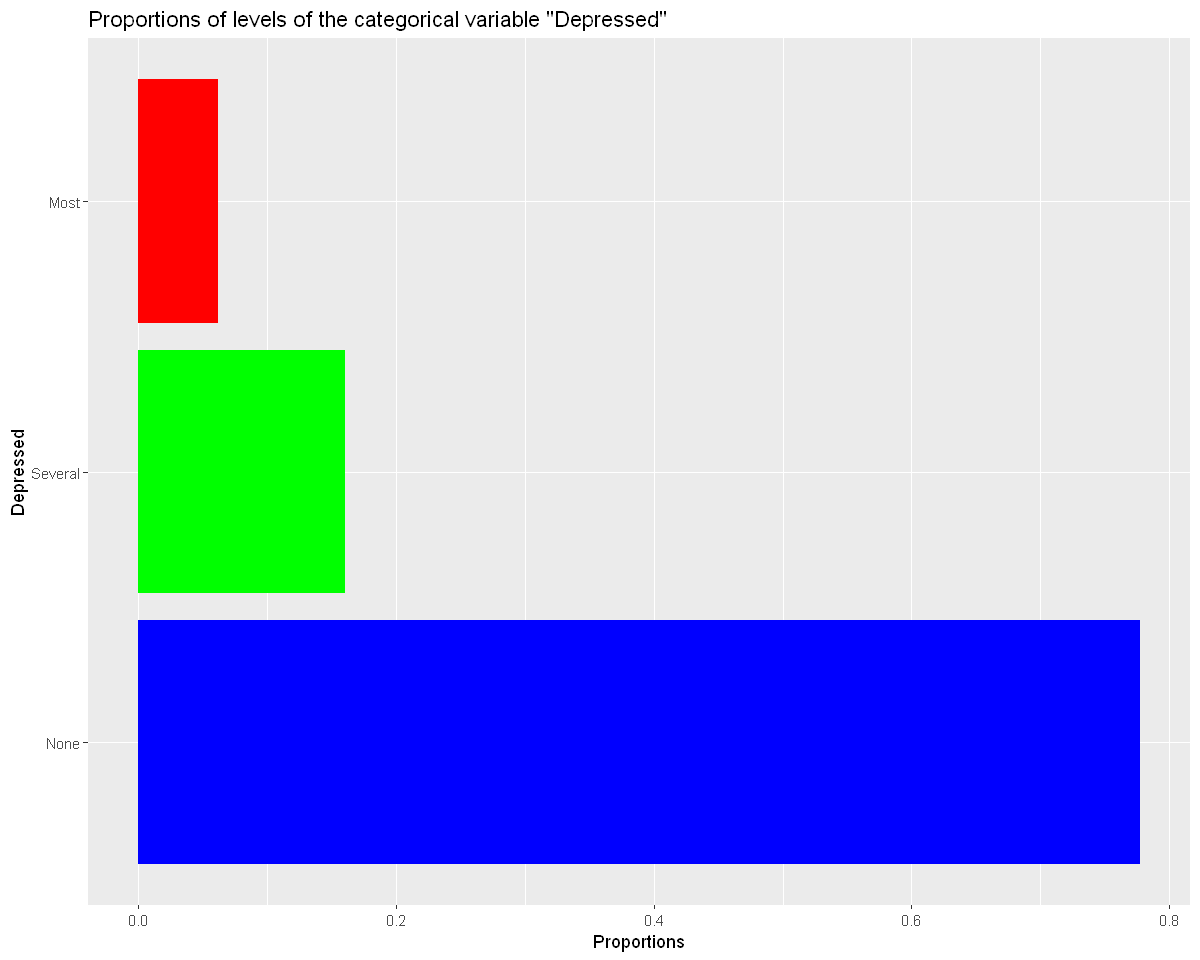

In [64]:
dep_prop %>% ggplot(aes(x=Depressed, y= Proportions)) + geom_col(fill=c("blue", "green", "red")) +
coord_flip() +
ggtitle("Proportions of levels of the categorical variable \"Depressed\"")

#### Exploring the categorical variable "Diabetes" and "Race1"
<p> Is there an association between the prevalence of diabetes and race? </p>

In [65]:
svytable(~Diabetes, design = NHANES_design)



Diabetes
       No       Yes 
275814034  24335536 

In [66]:
# diabetes by ethnicity
# contingency table with a count of combinations of both variables in rows and columns
diab_cont <- svytable(~Race1+Diabetes, design=NHANES_design)
diab_cont

          Diabetes
Race1             No       Yes
  Black     32697528   4003497
  Hispanic  17258245   1370393
  Mexican   27886500   2081657
  White    177088354  14708094
  Other     20883407   2171895

In [67]:
diab_cont_df <- as.data.frame(diab_cont)
diab_cont_df

Race1,Diabetes,Freq
Black,No,32697528
Hispanic,No,17258245
Mexican,No,27886500
White,No,177088354
Other,No,20883407
Black,Yes,4003497
Hispanic,Yes,1370393
Mexican,Yes,2081657
White,Yes,14708094
Other,Yes,2171895


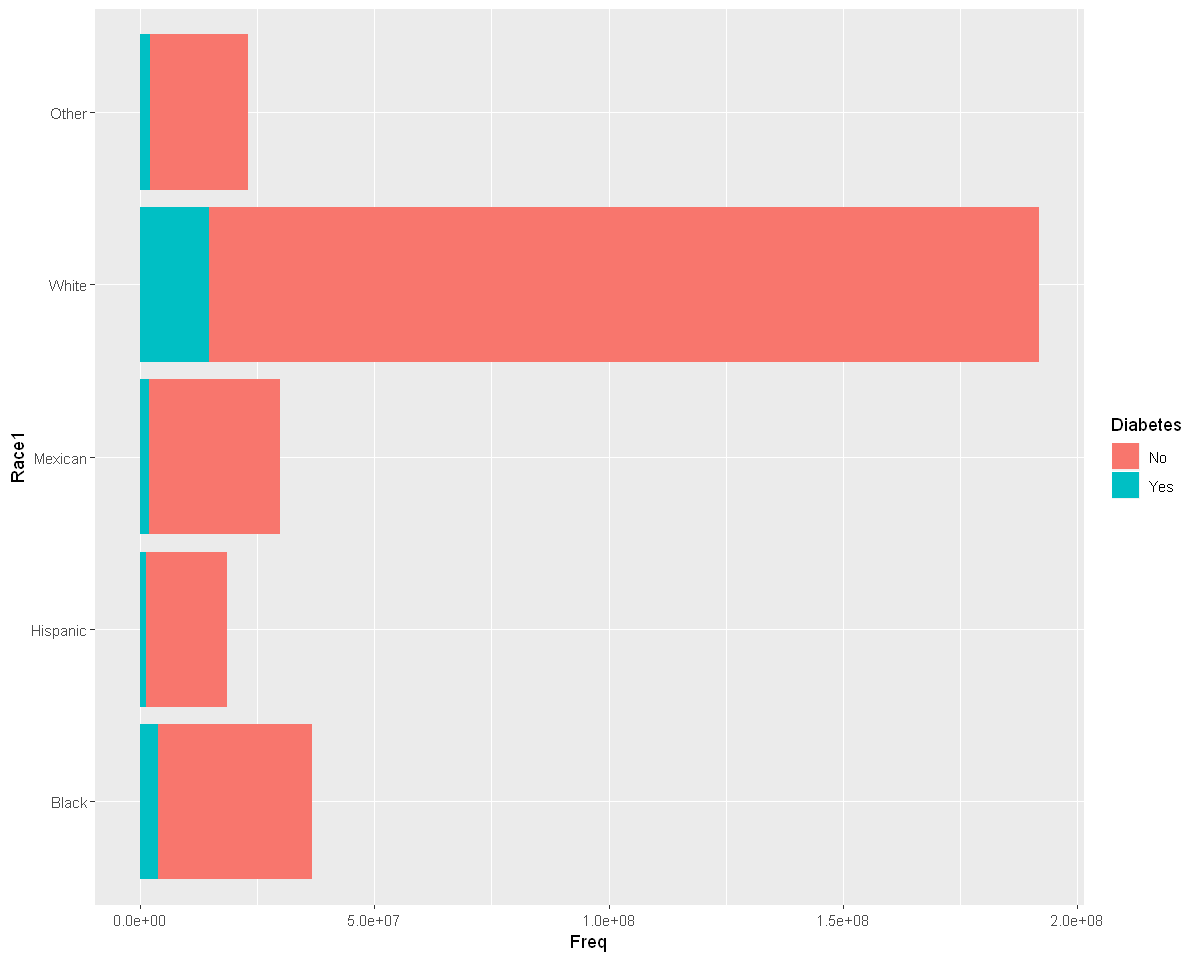

In [68]:
#  comparison of absolute values between groups
diab_cont_df %>% ggplot(aes(x=Race1, y=Freq, fill = Diabetes)) + geom_col() + coord_flip()

Race1,Diabetes,Freq
Black,No,32697528
Hispanic,No,17258245
Mexican,No,27886500
White,No,177088354
Other,No,20883407
Black,Yes,4003497
Hispanic,Yes,1370393
Mexican,Yes,2081657
White,Yes,14708094
Other,Yes,2171895


Race1,Diabetes,Freq,Proportions_Diabetes
Black,No,32697528,0.108937448
Hispanic,No,17258245,0.057498817
Mexican,No,27886500,0.092908679
White,No,177088354,0.590000360
Other,No,20883407,0.069576667
Black,Yes,4003497,0.013338339
Hispanic,Yes,1370393,0.004565699
Mexican,Yes,2081657,0.006935400
White,Yes,14708094,0.049002549
Other,Yes,2171895,0.007236042


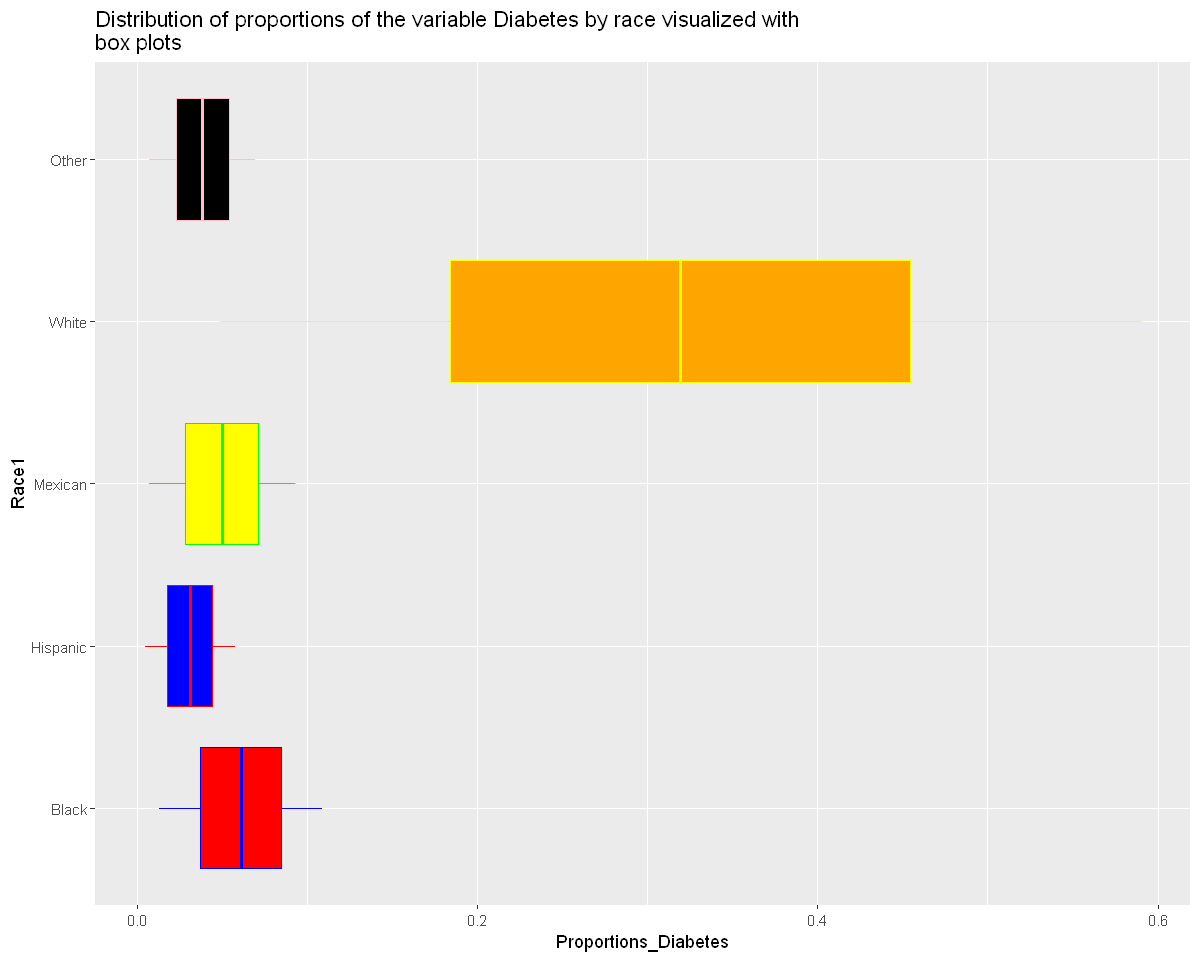

In [69]:
diab_cont_df 

# Visualize with a bar graph
diab_cont_df_proportion <- diab_cont_df %>% as.data.frame() %>% mutate(Proportions_Diabetes = Freq / sum(Freq))
diab_cont_df_proportion

diab_cont_df_proportion %>% ggplot(aes(x=Race1, y=Proportions_Diabetes )) +
geom_boxplot(fill=c("red", "blue", "yellow", "orange", "black"), 
color=c("blue", "red", "green", "yellow", "pink")) +
coord_flip()+ 
ggtitle("Distribution of proportions of the variable Diabetes by race visualized with \nbox plots")

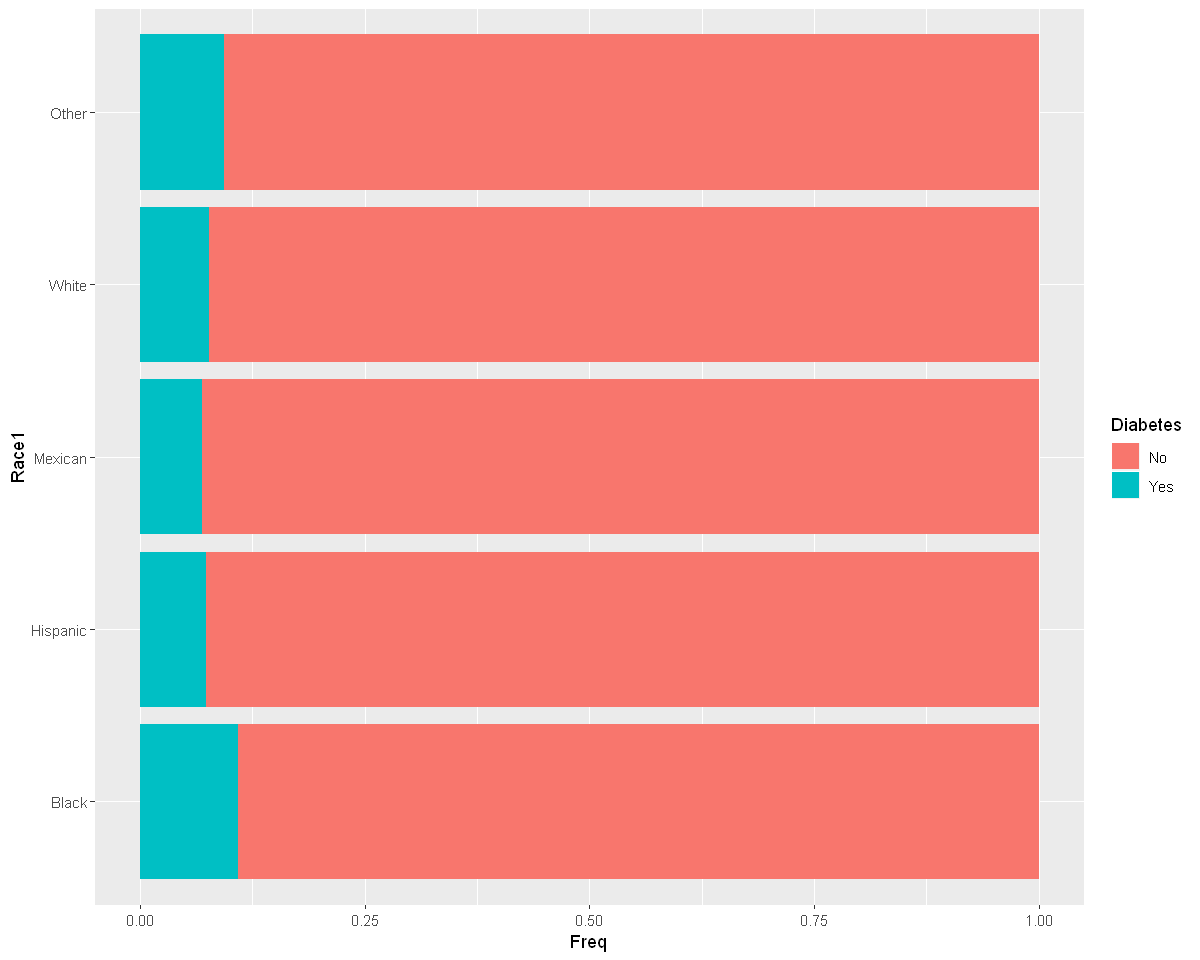

In [70]:
# comparison of the relative proportions within groups
diab_cont_df %>% ggplot(aes(x=Race1, y=Freq, fill = Diabetes)) + geom_col(position="Fill") + coord_flip()

#### Is there an association between the prevalence of diabetes and race?
<p> <b> Answer: </b> Yes, there could be an association. <br>
For example the Black group has larger proportion of people with diabetes <br> within the total Black group than the Hispanic within the Hispanic total group? </p>
<p><b>Next question:</b> Is there evidence for an association between these two categorical variables?<br>
Can methods of statistical inference prove this assumption?</p>


#### Creating contingency tables of the variables HealthGen and Depressed
<p> HealthGen is a categorical variable of the participant's self-reported health <br>
for participants aged 12 years and older. <br>
Is there an associaton betweeen the prevalence of Diabetes and self-reported Health? </p>

In [71]:
frequency_table_depressed <- svytable(~Depressed, design = NHANES_design)
frequency_table_depressed

Depressed
     None   Several      Most 
158758609  32732508  12704441 

In [72]:
frequency_table_Health <- svytable(~HealthGen, design = NHANES_design)
frequency_table_Health

HealthGen
Excellent     Vgood      Good      Fair      Poor 
 27659954  77482169  87497585  31544030   5668484 

In [73]:
contingency_table_Health_Depressed <- svytable(~HealthGen+Depressed, design = NHANES_design)
contingency_table_Health_Depressed 

           Depressed
HealthGen         None    Several       Most
  Excellent 21327181.6  1870620.9   563613.3
  Vgood     57487318.5  8302494.5  1855864.8
  Good      59920031.9 13950468.6  4698948.1
  Fair      17690782.8  7355104.8  3935505.6
  Poor       2324945.0  1253819.6  1650509.5

In [74]:
contingency_table_Depressed_Health <- svytable(~Depressed+HealthGen, design = NHANES_design)
contingency_table_Depressed_Health

         HealthGen
Depressed  Excellent      Vgood       Good       Fair       Poor
  None    21327181.6 57487318.5 59920031.9 17690782.8  2324945.0
  Several  1870620.9  8302494.5 13950468.6  7355104.8  1253819.6
  Most      563613.3  1855864.8  4698948.1  3935505.6  1650509.5

In [75]:
contingency_table_Depressed_Health %>% as.data.frame()

Depressed,HealthGen,Freq
None,Excellent,21327181.6
Several,Excellent,1870620.9
Most,Excellent,563613.3
None,Vgood,57487318.5
Several,Vgood,8302494.5
Most,Vgood,1855864.8
None,Good,59920031.9
Several,Good,13950468.6
Most,Good,4698948.1
None,Fair,17690782.8


In [76]:
# Proportion_Depressed contains the depression rates for each category of HealthGen
# Proportion of Depressed based on a condition 
# for example: the proportion of none days Depressed given that the HealthGen is excellent is 0.89
# for example: the proportion of several days Depressed given that the HealthGen is poor is 0.24.

contingency_table_Depressed_Health_conditional <- contingency_table_Depressed_Health %>% as.data.frame() %>% group_by(HealthGen) %>% 
mutate(n_HealthGen = sum(Freq), Proportion_Depressed = Freq/n_HealthGen) %>% ungroup()

contingency_table_Depressed_Health_conditional 

Depressed,HealthGen,Freq,n_HealthGen,Proportion_Depressed
None,Excellent,21327181.6,23761416,0.89755517
Several,Excellent,1870620.9,23761416,0.07872515
Most,Excellent,563613.3,23761416,0.02371969
None,Vgood,57487318.5,67645678,0.84982988
Several,Vgood,8302494.5,67645678,0.12273503
Most,Vgood,1855864.8,67645678,0.02743508
None,Good,59920031.9,78569449,0.76263781
Several,Good,13950468.6,78569449,0.17755589
Most,Good,4698948.1,78569449,0.05980630
None,Fair,17690782.8,28981393,0.61041865


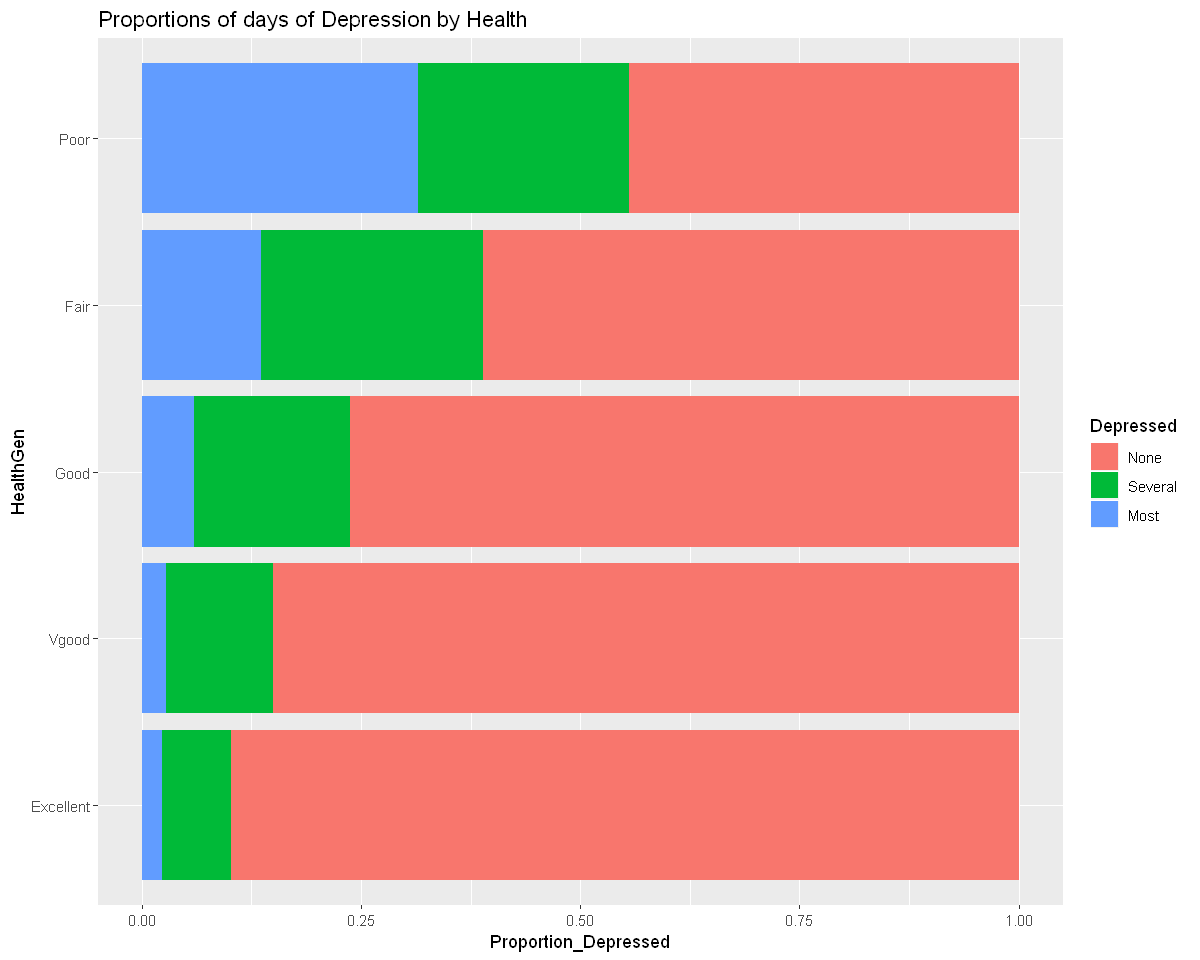

In [77]:
contingency_table_Depressed_Health_conditional %>%
ggplot(aes(x= HealthGen, y=	Proportion_Depressed, fill=Depressed )) +
geom_col() +
coord_flip()+
ggtitle("Proportions of days of Depression by Health")

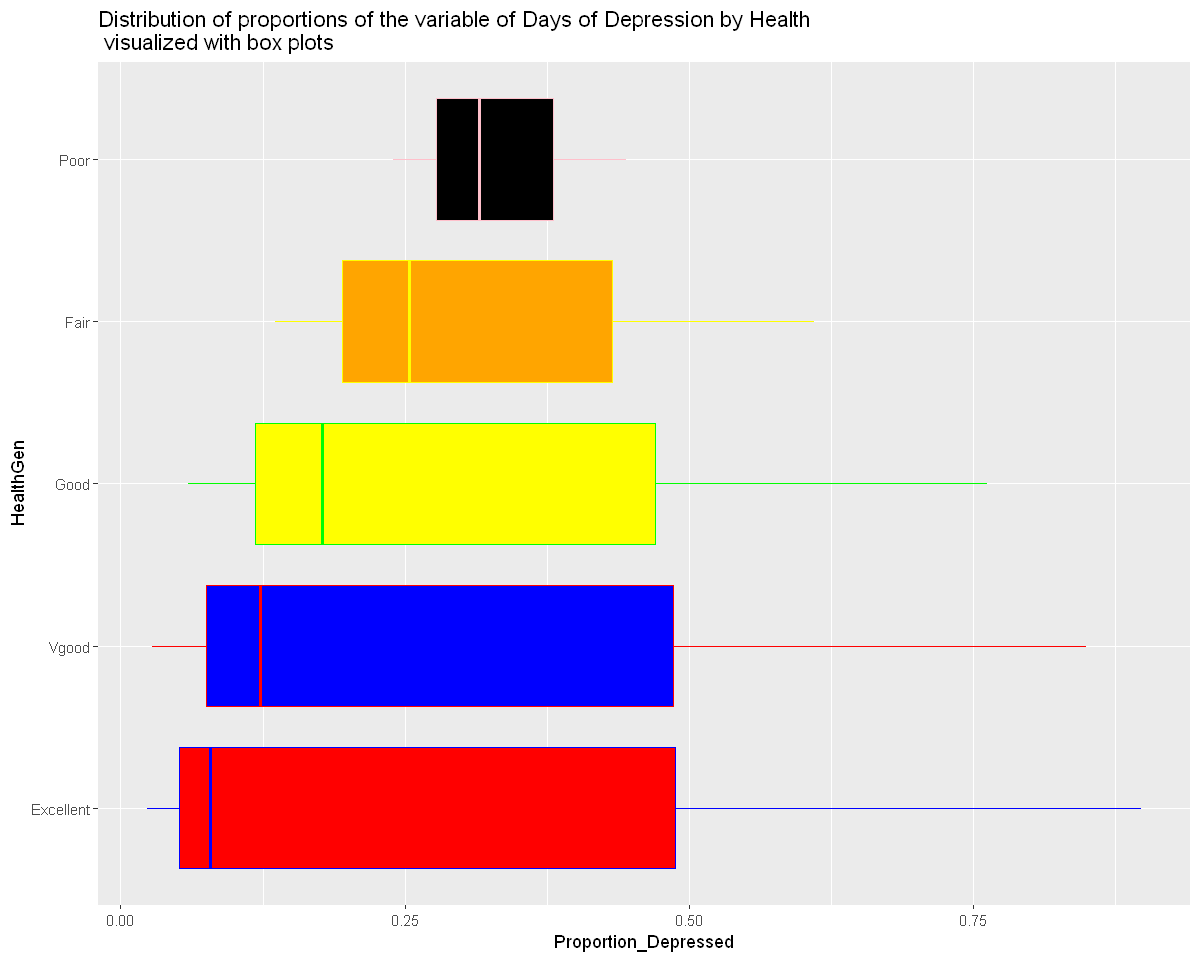

In [78]:
contingency_table_Depressed_Health_conditional %>%
ggplot(aes(x= HealthGen, y=	Proportion_Depressed)) +
geom_boxplot(fill=c("red", "blue", "yellow", "orange", "black"), 
color=c("blue", "red", "green", "yellow", "pink"))+
coord_flip()+
ggtitle("Distribution of proportions of the variable of Days of Depression by Health \n visualized with box plots")


#### Is there an association between the prevalence of Depression and self-reported Health?
<p> <b> Answer: </b> Yes, there could be a negative association. <br>
For example the people with excellent self-reported health, have a higher proportion of none days of depression within the total group of excellent self-reported health. <br> 
<b>Or:</b> the people with poor self-reported health, have the highest proportion of most days of depression within the total group of poor self-reported health.</p>
<p><b>Next question:</b> Is there evidence for an association between these two categorical variables?<br>
Can methods of statistical inference prove this assumption?</p>

In [79]:
# Build a contingency table with the function svytotal
# Compute means, variances, ratios and totals for data from complex surveys.
# https://www.rdocumentation.org/packages/survey/versions/3.34/topics/surveysummary
contingency_table_totals <- svytotal(~interaction(HealthGen, Depressed), design=NHANES_design, na.rm=TRUE)
contingency_table_totals


                                                      total      SE
interaction(HealthGen, Depressed)Excellent.None    21327182 1556268
interaction(HealthGen, Depressed)Vgood.None        57487319 2975806
interaction(HealthGen, Depressed)Good.None         59920032 3375068
interaction(HealthGen, Depressed)Fair.None         17690783 1206307
interaction(HealthGen, Depressed)Poor.None          2324945  251934
interaction(HealthGen, Depressed)Excellent.Several  1870621  277198
interaction(HealthGen, Depressed)Vgood.Several      8302495  687020
interaction(HealthGen, Depressed)Good.Several      13950469  931077
interaction(HealthGen, Depressed)Fair.Several       7355105  455364
interaction(HealthGen, Depressed)Poor.Several       1253820  168440
interaction(HealthGen, Depressed)Excellent.Most      563613  139689
interaction(HealthGen, Depressed)Vgood.Most         1855865  269970
interaction(HealthGen, Depressed)Good.Most          4698948  501105
interaction(HealthGen, Depressed)Fair.Most      

In [80]:
# Estimate the means for combos of Depressed and HealthGen
# Compute means, variances, ratios and totals for data from complex surveys.
contingency_table_means <- svymean(x = ~interaction(HealthGen, Depressed),design = NHANES_design,na.rm = TRUE)
contingency_table_means

                                                        mean     SE
interaction(HealthGen, Depressed)Excellent.None    0.1044492 0.0053
interaction(HealthGen, Depressed)Vgood.None        0.2815422 0.0078
interaction(HealthGen, Depressed)Good.None         0.2934563 0.0092
interaction(HealthGen, Depressed)Fair.None         0.0866400 0.0047
interaction(HealthGen, Depressed)Poor.None         0.0113863 0.0013
interaction(HealthGen, Depressed)Excellent.Several 0.0091613 0.0014
interaction(HealthGen, Depressed)Vgood.Several     0.0406612 0.0028
interaction(HealthGen, Depressed)Good.Several      0.0683220 0.0033
interaction(HealthGen, Depressed)Fair.Several      0.0360214 0.0026
interaction(HealthGen, Depressed)Poor.Several      0.0061405 0.0009
interaction(HealthGen, Depressed)Excellent.Most    0.0027603 0.0007
interaction(HealthGen, Depressed)Vgood.Most        0.0090890 0.0013
interaction(HealthGen, Depressed)Good.Most         0.0230129 0.0023
interaction(HealthGen, Depressed)Fair.Most      

#### Inference for the categorical variables race and diabetes?
<p><b>Question:</b> Is there evidence for an association between the two categorical variables race and diabetes?<br>
Can methods of statistical inference prove this assumption?</p>
<p><b>Null-Hypothesis:</b> There is not an association between race and diabetes.</p>
<p><b>Alternative-Hypothesis*:</b> There is an association between race and diabetes.</p>
<p><b>Inferential test:</b> Chi-square test for categorical variables.</p>
<p><b>Reasoning:</b> If the values are consistent with the Null-hypothesis the Null-hypothesis is not rejected.<br>
If the values are inconsistent with the Null-hypothesis then the Null-hypothesis is considered wrong and the alternative hypothesis is accepted.</p>


<p>* The alternative hypothesis is considered to be more interesting it detects a new relationship, which signals knew scientific knowledge. </p>


In [81]:
svychisq(~Race1+Diabetes, design = NHANES_design, statistic = "Chisq")


	Pearson's X^2: Rao & Scott adjustment

data:  svychisq(~Race1 + Diabetes, design = NHANES_design, statistic = "Chisq")
X-squared = 37.708, df = 4, p-value = 0.0001177


#### Interpretation
<p><b>Chi-squared-distribution:</b> The known distribution for categorical variables.<br>
It works as the Null-distribution. A statistic within the boundaries of the <br>
Chi-squared-distribution given by the significance levels requires not rejecting the Null. </p>
<p><b>X-squared:</b> a statistic, discrepancy between the values expected if the Null is true<br>
and the observed values. The higher the X-squared value the more likely the Null is not true.<br>
A chi-square-table like this on <a href= https://www.statisticshowto.datasciencecentral.com/tables/chi-squared-table-right-tail/> "datasciencecentral.com"</a> is used for interpretation. <br>
With a degree of freedom of 4 and a significance level of 0.05 a X-squared of 9.48 is expected<br>
and therefore a value of 37.708 is highly unlikely.
</p>
<p><b>p-value:</b> a statistic, the likelihood of observing these values if the Null is true.<br>
Given a significance level of 0.05 it is highly unlikely of observing a <br>
p-value of 0.0001177 if the Null would be true.</p>
<p><b>Conclusion:</b> The Null is rejected. There is an association between diabetes and ethnic group.<br>
Diabetes does vary with race. </p>

In [82]:
# Chi-square-test testing for a relationship between the categorical variables Depressed and HealthGen
svychisq(~Depressed+HealthGen, design = NHANES_design, statistic = "Chisq")


	Pearson's X^2: Rao & Scott adjustment

data:  svychisq(~Depressed + HealthGen, design = NHANES_design, statistic = "Chisq")
X-squared = 1592.7, df = 8, p-value < 2.2e-16


#### Interpretation
<p><b>Chi-squared-distribution:</b> The known distribution for categorical variables.<br>
It works as the Null-distribution. A statistic within the boundaries of the <br>
Chi-squared-distribution given by the significance levels requires not rejecting the Null. </p>
<p><b>X-squared:</b> a statistic, discrepancy between the values expected if the Null is true<br>
and the observed values. The higher the X-squared value the more likely the Null is not true.<br>
A chi-square-table like this on <a href= https://www.statisticshowto.datasciencecentral.com/tables/chi-squared-table-right-tail/> "datasciencecentral.com"</a> is used for interpretation. <br>
With a degree of freedom of 8 and a significance level of 0.05 a X-squared of 15.50 is expected<br>
and therefore a value of 1592.7 is highly unlikely.
</p>
<p><b>p-value:</b> a statistic, the likelihood of observing these values if the Null is true.<br>
Given a significance level of 0.05 it is highly unlikely of observing a <br>
p-value of 2.2e-16 if the Null would be true.</p>
<p><b>Conclusion:</b> The Null is rejected. There is an association between Depressed and self-reported health.<br>
Diabetes does vary with race. </p>

#### Explore the variable homeownership (Homeown) and education
<p> Is there an association between this two variables?<br>
Does homeownership vary with education?</p>

In [83]:
# What is the type of these variables?
str(NHANESraw$HomeOwn )
levels(NHANESraw$HomeOwn )
str(NHANESraw$Education)
levels(NHANESraw$Education)
# Answer both are categorical variables

 Factor w/ 3 levels "Own","Rent","Other": 1 1 1 2 2 2 2 2 1 1 ...


[1] "Own"   "Rent"  "Other"

 Factor w/ 5 levels "8th Grade","9 - 11th Grade",..: 3 NA NA NA 3 2 4 NA NA 4 ...


[1] "8th Grade"      "9 - 11th Grade" "High School"    "Some College"  
[5] "College Grad"

In [84]:
head(data.frame(NHANESraw$HomeOwn, NHANESraw$Education))
# Interpretation: household owns a house and has High School Education

NHANESraw.HomeOwn,NHANESraw.Education
Own,High School
Own,NA
Own,NA
Rent,NA
Rent,High School
Rent,9 - 11th Grade


In [85]:
# combinations of homeownership and education in a contingency table.
contingency_table_ho_edc <- svytable(~HomeOwn+Education, design=NHANES_design)
contingency_table_ho_edc 

       Education
HomeOwn  8th Grade 9 - 11th Grade High School Some College College Grad
  Own    6800892.7     14202034.7  30861415.8   44169791.8   48840750.8
  Rent   6143190.2     11176931.8  15569678.6   22817705.7   14701161.4
  Other   407061.8       531840.5    791885.0    2014455.0    1220278.2

In [86]:
# conditional proportion of levels of HomeOwn for each educational level
df_HomeOwn_by_Education <- as.data.frame(contingency_table_ho_edc ) %>% 
group_by(Education) %>% 
mutate(n_Frequency = sum(Freq), Proportions_HomeOwn = Freq/n_Frequency) %>% ungroup()
df_HomeOwn_by_Education
str(df_HomeOwn_by_Education )

HomeOwn,Education,Freq,n_Frequency,Proportions_HomeOwn
Own,8th Grade,6800892.7,13351145,0.50938649
Rent,8th Grade,6143190.2,13351145,0.46012461
Other,8th Grade,407061.8,13351145,0.03048891
Own,9 - 11th Grade,14202034.7,25910807,0.54811240
Rent,9 - 11th Grade,11176931.8,25910807,0.43136178
Other,9 - 11th Grade,531840.5,25910807,0.02052582
Own,High School,30861415.8,47222979,0.65352539
Rent,High School,15569678.6,47222979,0.32970555
Other,High School,791885.0,47222979,0.01676906
Own,Some College,44169791.8,69001953,0.64012380


Classes 'tbl_df', 'tbl' and 'data.frame':	15 obs. of  5 variables:
 $ HomeOwn            : Factor w/ 3 levels "Own","Rent","Other": 1 2 3 1 2 3 1 2 3 1 ...
 $ Education          : Factor w/ 5 levels "8th Grade","9 - 11th Grade",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ Freq               : num  6800893 6143190 407062 14202035 11176932 ...
 $ n_Frequency        : num  13351145 13351145 13351145 25910807 25910807 ...
 $ Proportions_HomeOwn: num  0.5094 0.4601 0.0305 0.5481 0.4314 ...


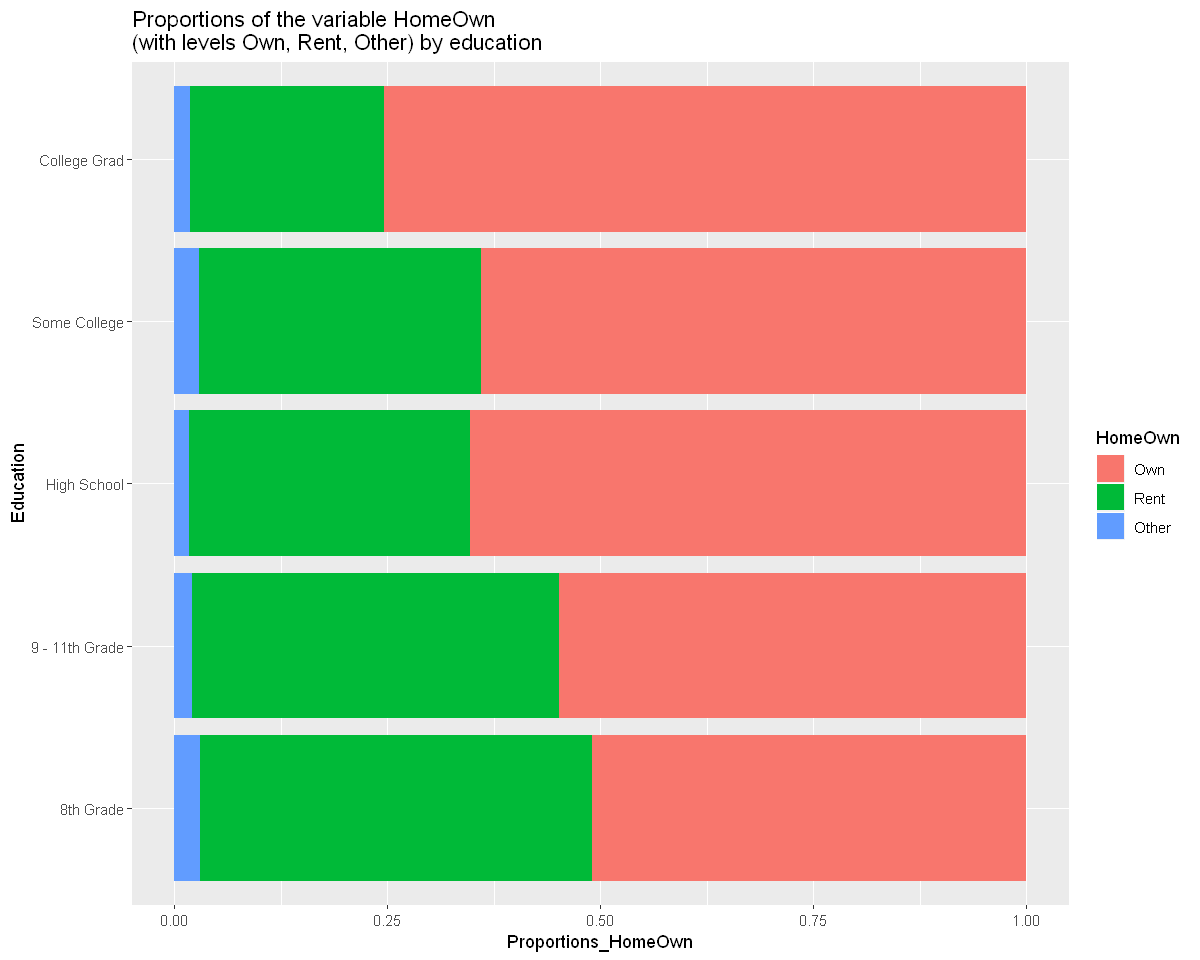

In [87]:
df_HomeOwn_by_Education %>%
ggplot(aes(x= Education, y=Proportions_HomeOwn, fill=HomeOwn))+ geom_col() +
coord_flip()+ 
ggtitle("Proportions of the variable HomeOwn\n(with levels Own, Rent, Other) by education")

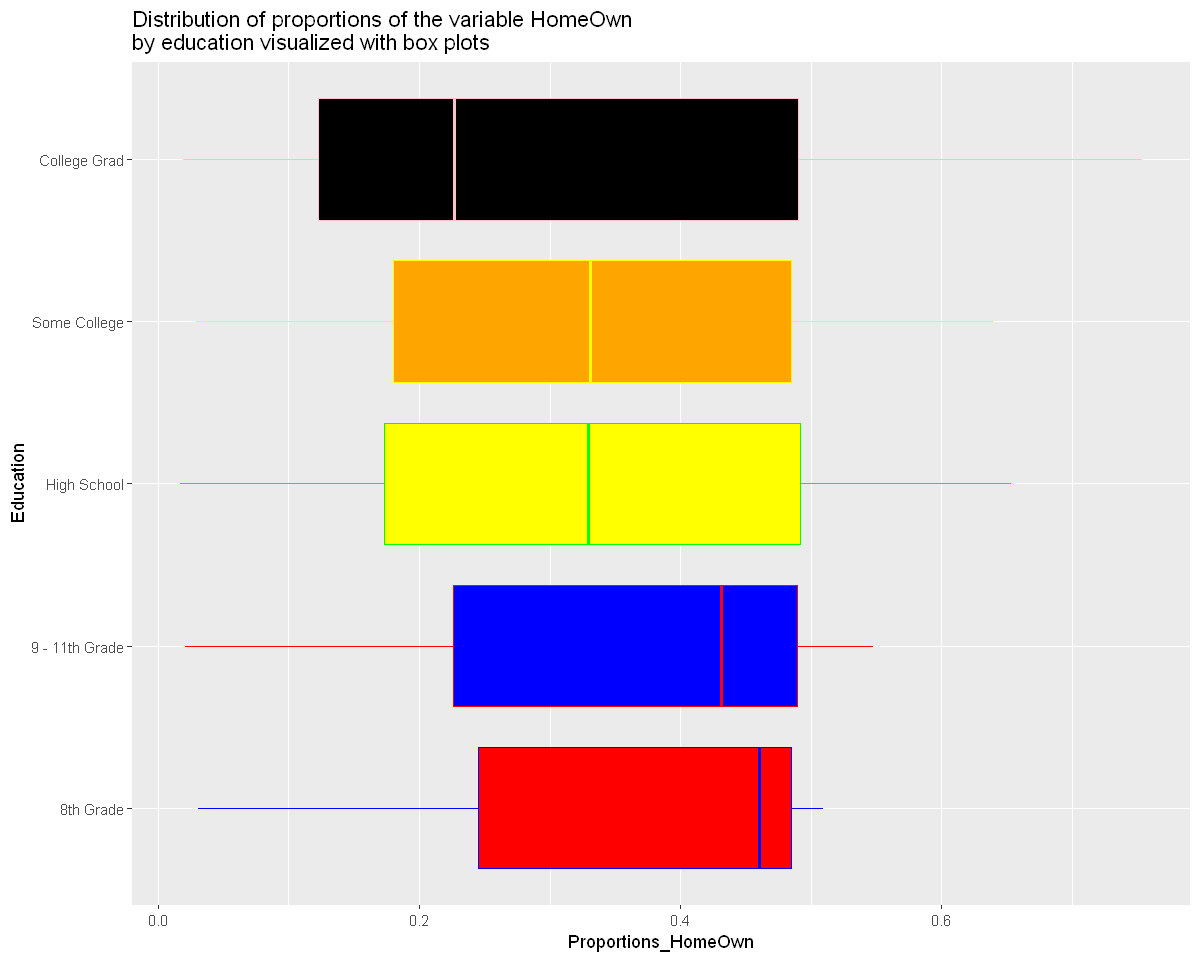

In [88]:
df_HomeOwn_by_Education %>%
ggplot(aes(x= Education, y=Proportions_HomeOwn))+ geom_boxplot(fill=c("red", "blue", "yellow", "orange", "black"), 
                                                               color=c("blue", "red", "green", "yellow", "pink")) +
coord_flip()+ 
ggtitle("Distribution of proportions of the variable HomeOwn
by education visualized with box plots")

,Education,HomeOwnOwn,HomeOwnRent,HomeOwnOther,se.HomeOwnOwn,se.HomeOwnRent,se.HomeOwnOther
8th Grade,8th Grade,0.5093865,0.4601246,0.03048891,0.02928813,0.03073164,0.007180123
9 - 11th Grade,9 - 11th Grade,0.5481124,0.4313618,0.02052582,0.02634085,0.02542854,0.003552403
High School,High School,0.6535254,0.3297056,0.01676906,0.02334997,0.02248523,0.003726892
Some College,Some College,0.6401238,0.3306820,0.02919417,0.02308726,0.01948526,0.006062702
College Grad,College Grad,0.7541553,0.2270022,0.01884245,0.02954370,0.02822466,0.003570512


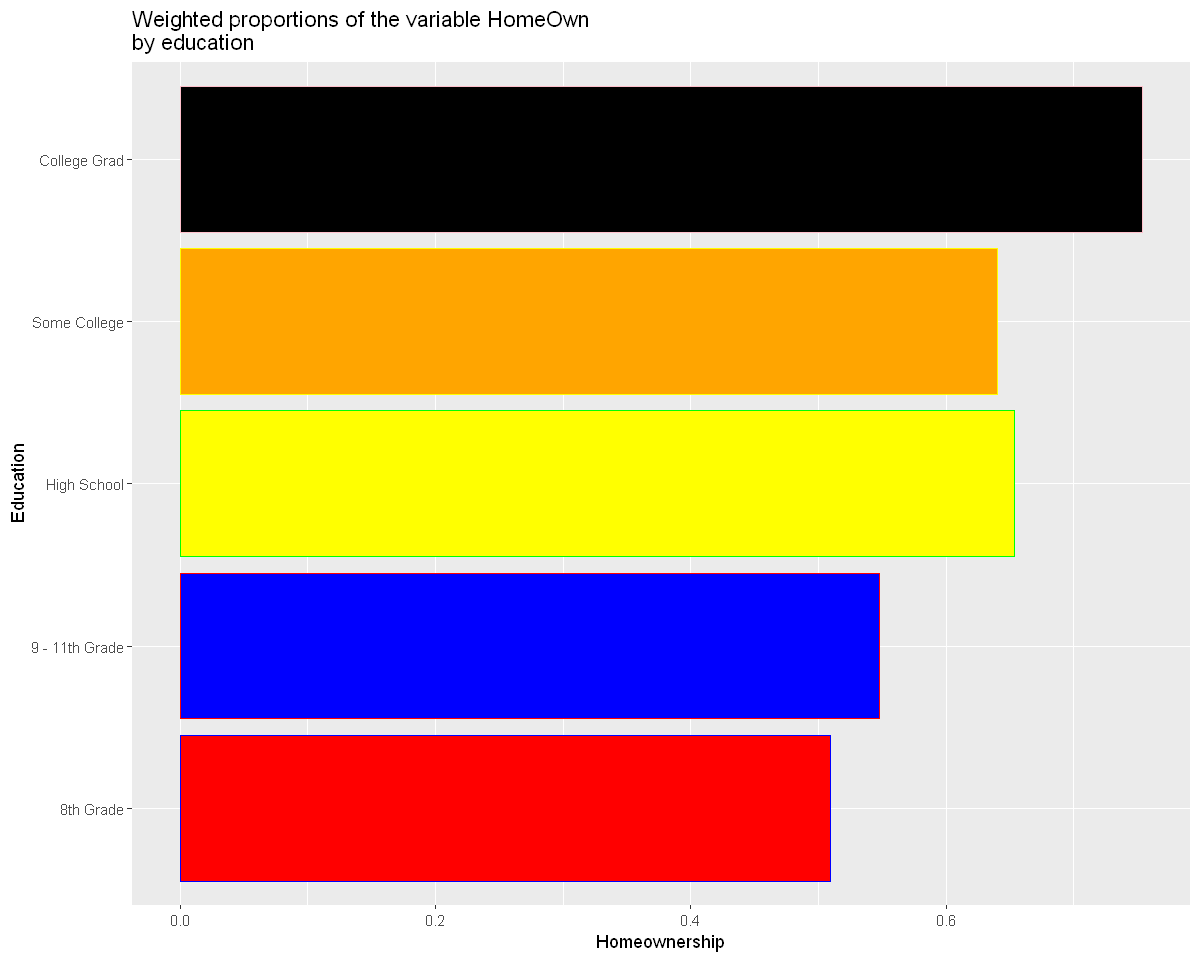

In [89]:
out_3 <- svyby(formula=~HomeOwn, by=~Education,
design=NHANES_design,
FUN=svymean,na.rm=TRUE,
row.names=FALSE)
out_3

out_3 %>%
ggplot(aes(x= Education, y= HomeOwnOwn))+ geom_col(fill=c("red", "blue", "yellow", "orange", "black"), 
                                                               color=c("blue", "red", "green", "yellow", "pink")) +
ylab("Homeownership") + 
coord_flip()+ 
ggtitle("Weighted proportions of the variable HomeOwn
by education")
# Conclusion: it seems there is a trend that homeownership increases with education degrees

In [90]:
# Inferential testing wit a chi-square-test
svychisq(~Education+HomeOwn, design=NHANES_design, , statistic = "Chisq")


	Pearson's X^2: Rao & Scott adjustment

data:  svychisq(~Education + HomeOwn, design = NHANES_design, , statistic = "Chisq")
X-squared = 531.78, df = 8, p-value = 2.669e-16


#### Interpretation
<p><b>X-squared:</b>This chi-square-table from <a href= https://www.statisticshowto.datasciencecentral.com/tables/chi-squared-table-right-tail/> "datasciencecentral.com"</a> is used for interpretation. <br>
With a degree of freedom of 8 and a significance level of 0.05 a X-squared of 15.50 is expected<br>
and therefore a value of 531.78 is highly unlikely.
</p>
<p><b>p-value:</b> a statistic, the likelihood of observing these values if the Null is true.<br>
Given a significance level of 0.05 it is highly unlikely of observing a <br>
p-value of 2.669e-16 if the Null would be true.</p>
<p><b>Conclusion:</b> The Null is rejected. There is an association between Education and self-reported HomeOwn.<br>
HomeOwn does vary with Education. </p>

#### Exploring the variable "DaysPhysHlthBad", the days a person experienced bad physical health


In [91]:
str(NHANESraw$DaysPhysHlthBad)
sum(is.na(NHANESraw$DaysPhysHlthBad))
summary(NHANESraw$DaysPhysHlthBad)
paste("Unique: ",sum(unique(NHANESraw$DaysPhysHlthBad)))
str(NHANESraw$Age)
sum(is.na(NHANESraw$Age))
summary(NHANESraw$Age)
paste("Unique: ",sum(unique(NHANESraw$Age)))

 int [1:20293] 0 NA 2 NA 20 2 0 NA NA 0 ...


[1] 7862

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   3.719   3.000  30.000    7862 

[1] "Unique:  NA"

 int [1:20293] 34 4 16 10 60 26 49 1 10 80 ...


[1] 0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   10.00   28.00   32.02   53.00   80.00 

[1] "Unique:  3240"

In [92]:
days_badhealth_over_12 <- NHANESraw %>% filter(Age>12) %>% select(DaysPhysHlthBad)
head(days_badhealth_over_12)

DaysPhysHlthBad
0
2
20
2
0
0


In [93]:
# compute the estimated population mean based on the sample data
days_badhealth_over_12_mean <-svymean(~ DaysPhysHlthBad, design=NHANES_design, na.rm=TRUE)
days_badhealth_over_12_mean 
# Conclusion: on average Americans have 3.3 dayse of bad health

                  mean     SE
DaysPhysHlthBad 3.3315 0.1128

In [94]:
# compute the estimated population total based on the sample data
days_badhealth_over_12_total <-svytotal(~ DaysPhysHlthBad, design=NHANES_design, na.rm=TRUE)
days_badhealth_over_12_total 

                   total       SE
DaysPhysHlthBad 7.65e+08 35784824

In [95]:
# compute the estimated population total based on the sample data
# median orders the data from lowest to highest, the median is the value at the index in the middle of 50 percent.
days_badhealth_over_12_quantile <-svyquantile(~ DaysPhysHlthBad, design=NHANES_design, na.rm=TRUE, quantiles = 0.5)
days_badhealth_over_12_quantile
# Conclusion: on average Americans have 0 days of bad health in a given month.

,0.5
DaysPhysHlthBad,0


[1] No   <NA> <NA> <NA> Yes  No  
Levels: No Yes

[1] No   <NA> Yes 
Levels: No Yes

 Factor w/ 2 levels "No","Yes": 1 NA NA NA 2 1 2 NA NA 1 ...


,SmokeNow,DaysPhysHlthBad,se
No,No,3.908984,0.1996290
Yes,Yes,4.951750,0.2346189


SmokeNow,DaysPhysHlthBad_mean
No,4.625976
Yes,5.341730


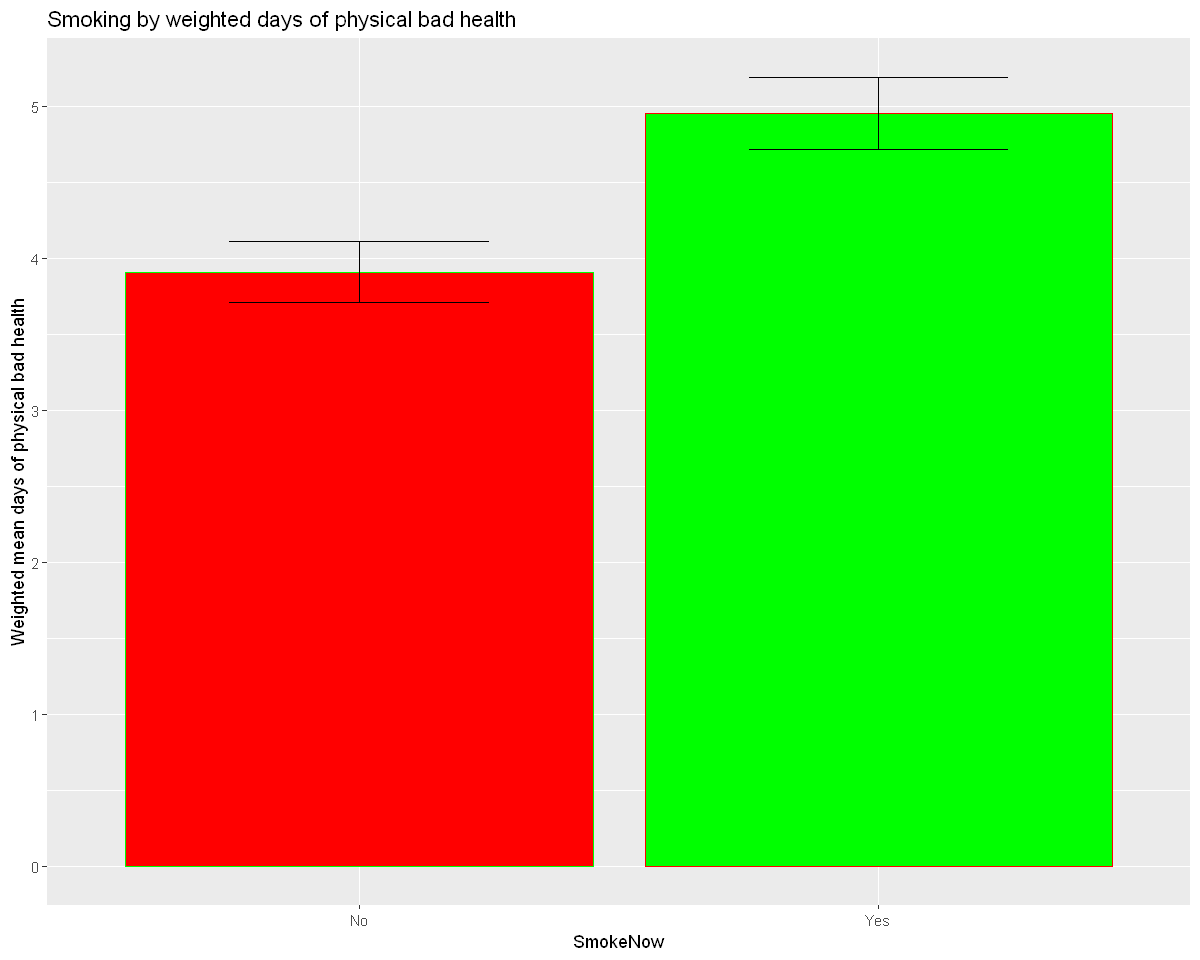

In [96]:
# group by SmokeNow with svyby
head(NHANESraw$SmokeNow)
unique(NHANESraw$SmokeNow)
str(NHANESraw$SmokeNow)
#
out_1 <- svyby(formula=~DaysPhysHlthBad, by=~SmokeNow,
design=NHANES_design,
FUN=svymean,na.rm=TRUE,
row.names=FALSE)
out_1

# adding standard error boundaries for errorbars to the table
out_1 <- mutate(out_1, lower = DaysPhysHlthBad - se,
upper = DaysPhysHlthBad + se)
#
ggplot(out_1, aes(x=SmokeNow,y=DaysPhysHlthBad, ymin = lower, ymax = upper )) + 
geom_col(colour=c("green", "red") , fill=c("red", "green"))  +
ggtitle("Smoking by weighted days of physical bad health") +
ylab("Weighted mean days of physical bad health")+
geom_errorbar(width = .5)
# Conclusion: on average smokers (Yes) have one more bad health day than non-smokers (No)

# this code adjust not for the sample features in the object NHanes_design
NHANESraw %>% filter(!is.na(SmokeNow)) %>%
group_by(SmokeNow) %>% summarize(DaysPhysHlthBad_mean=mean(DaysPhysHlthBad, na.rm=TRUE))

,SmokeNow,Age,se
No,No,54.57933,0.6249442
Yes,Yes,42.76574,0.4087738


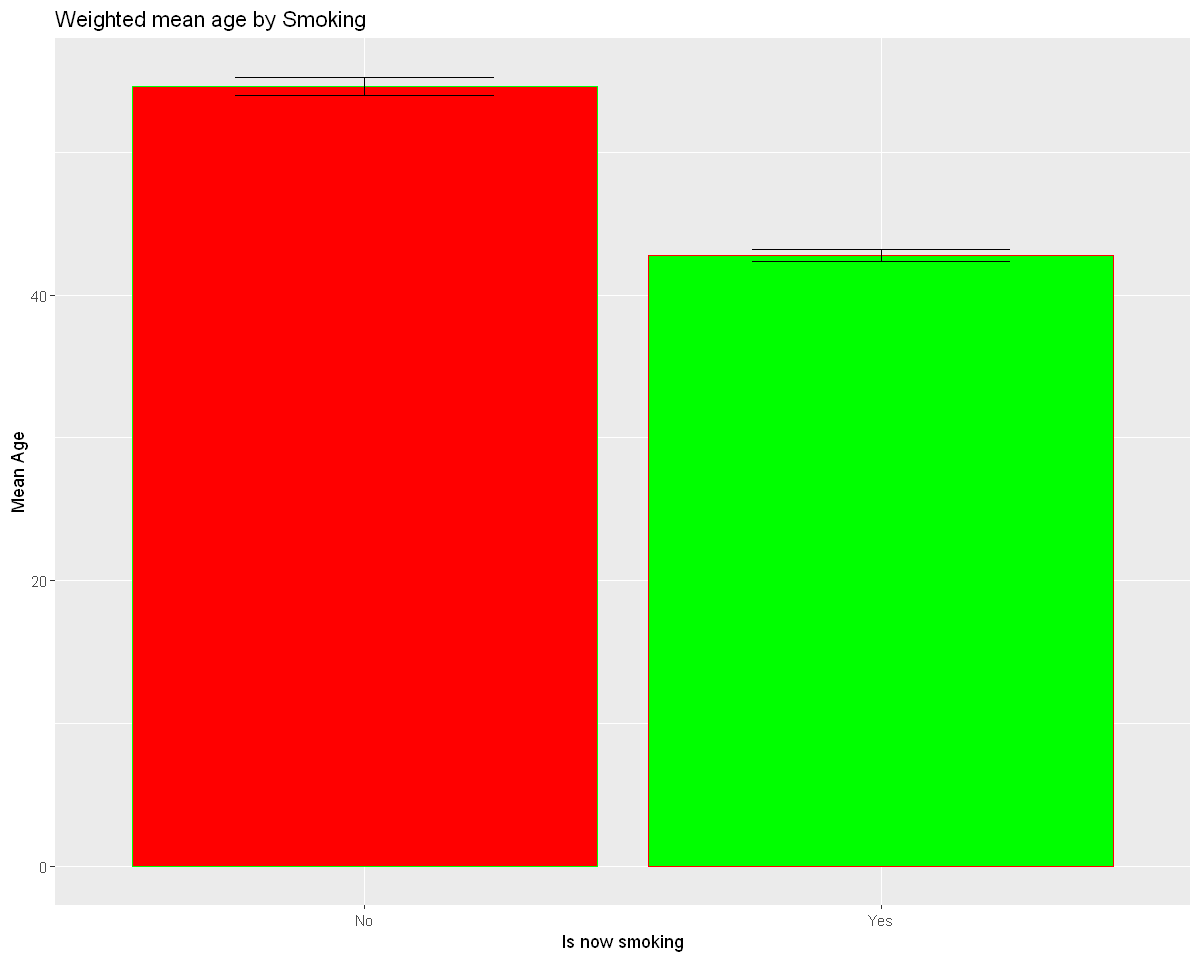

In [97]:
# replacing DaysPhysHlthBad with age
# Older people maybe more smokers?
# No, the age of smokers is younger than non-smokers
out_2 <- svyby(formula=~Age,by=~SmokeNow,
design=NHANES_design,
FUN=svymean,na.rm=TRUE,
row.names=FALSE)
out_2 

# add errorbars
out_2 <- mutate(out_2, lower = Age - se,
upper = Age + se)


#
# plot barplot
ggplot(out_2, aes(SmokeNow, Age, ymin = lower, ymax = upper )) + geom_col(colour=c("green", "red") , fill=c("red", "green"),
                                            ) + 
ggtitle("Weighted mean age by Smoking") +
labs(x="Is now smoking", y="Mean Age") +
geom_errorbar(width=0.5)

#### Explore the variable Gender and SleepHrsNight
<p> Is there an association between this two variables?<br>
Does Gender vary with SleepHrsNight?</p>
<p> SleepHrsNight contains the self-reported number of hours a <br>
participant usually sleeps on a weeknight and is only <br>
reported for participants who were at least 16 years old</p>

In [98]:
svymean(~SleepHrsNight, design=NHANES_design, na.rm=TRUE)

                mean     SE
SleepHrsNight 6.9292 0.0166

In [99]:
svyby(formula = ~SleepHrsNight, 
        by = ~Gender, 
        design = NHANES_design, 
        FUN = svymean, 
        na.rm = TRUE, 
        keep.names = FALSE)
# Conclusion: sleep hour per night for men and women is roughly equal
# Sleep hour seems not to vary significantly with gender

Gender,SleepHrsNight,se
female,6.976103,0.02374684
male,6.879050,0.01953263


In [100]:
svyquantile(~ SleepHrsNight, design=NHANES_design, quantiles=c(0.1,0.25,0.5, 0.75, 0.99), na.rm=TRUE)

,0.1,0.25,0.5,0.75,0.99
SleepHrsNight,5,6,7,8,10


In [101]:
# survey-weighted quantiles by Gender
out_4 <- svyby(formula = ~SleepHrsNight, 
      by = ~Gender, 
      design = NHANES_design, 
      FUN = svyquantile, 
      na.rm = TRUE, 
      quantiles = 0.5, 
      keep.rows = FALSE, 
      keep.var = FALSE)
out_4
# Conclusion: the median  of sleep hour per night for men and women is equal
# Sleep hour seems not to vary significantly with gender


,Gender,statistic
female,female,7
male,male,7


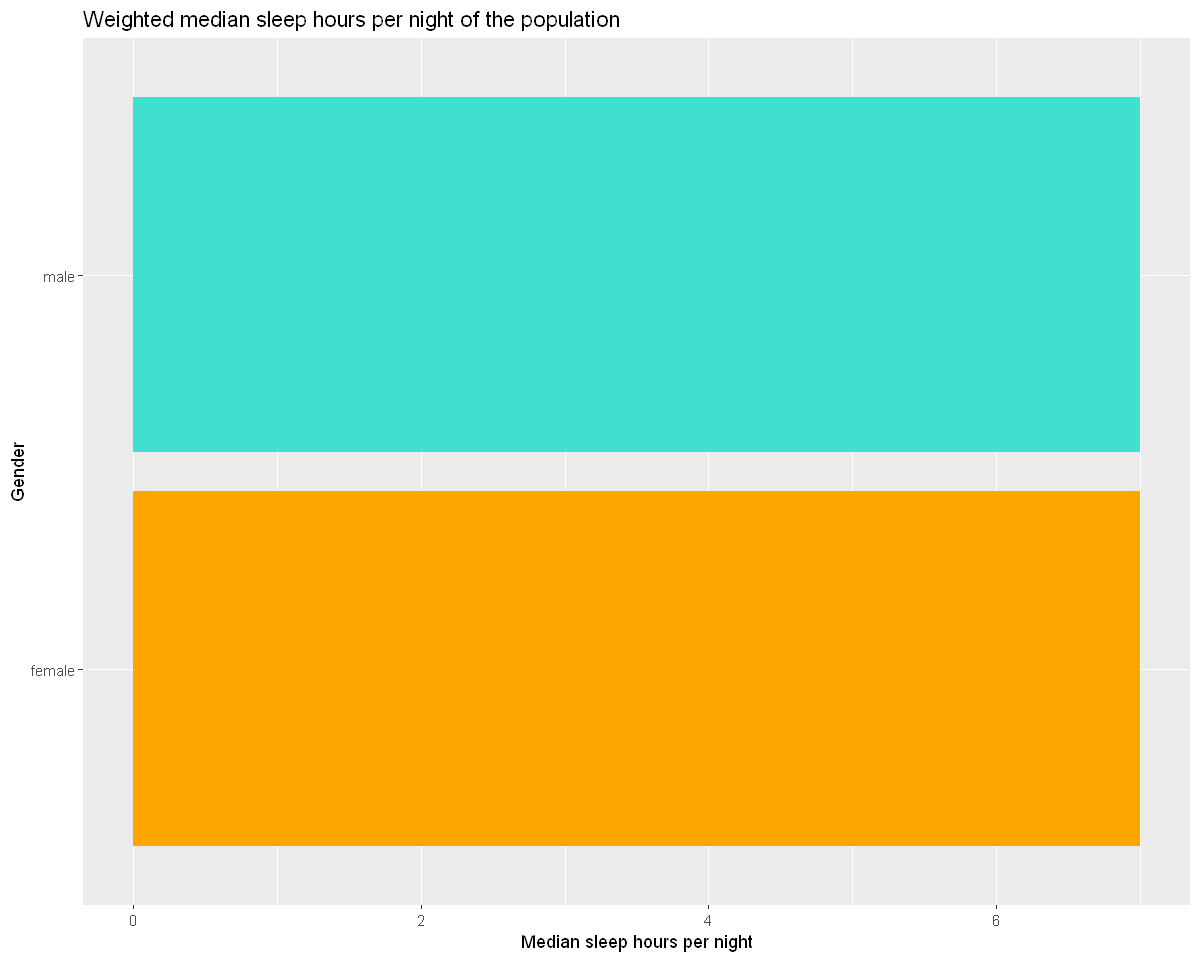

In [102]:
ggplot(out_4, aes(x=Gender, statistic)) +
geom_col(fill=c("orange", "turquoise")) +
labs(x="Gender", y="Median sleep hours per night")+
ggtitle("Weighted median sleep hours per night of the population") +
coord_flip()

Gender,SleepHrsNight,se,lower,upper
female,6.976103,0.02374684,6.952356,6.999850
male,6.879050,0.01953263,6.859518,6.898583


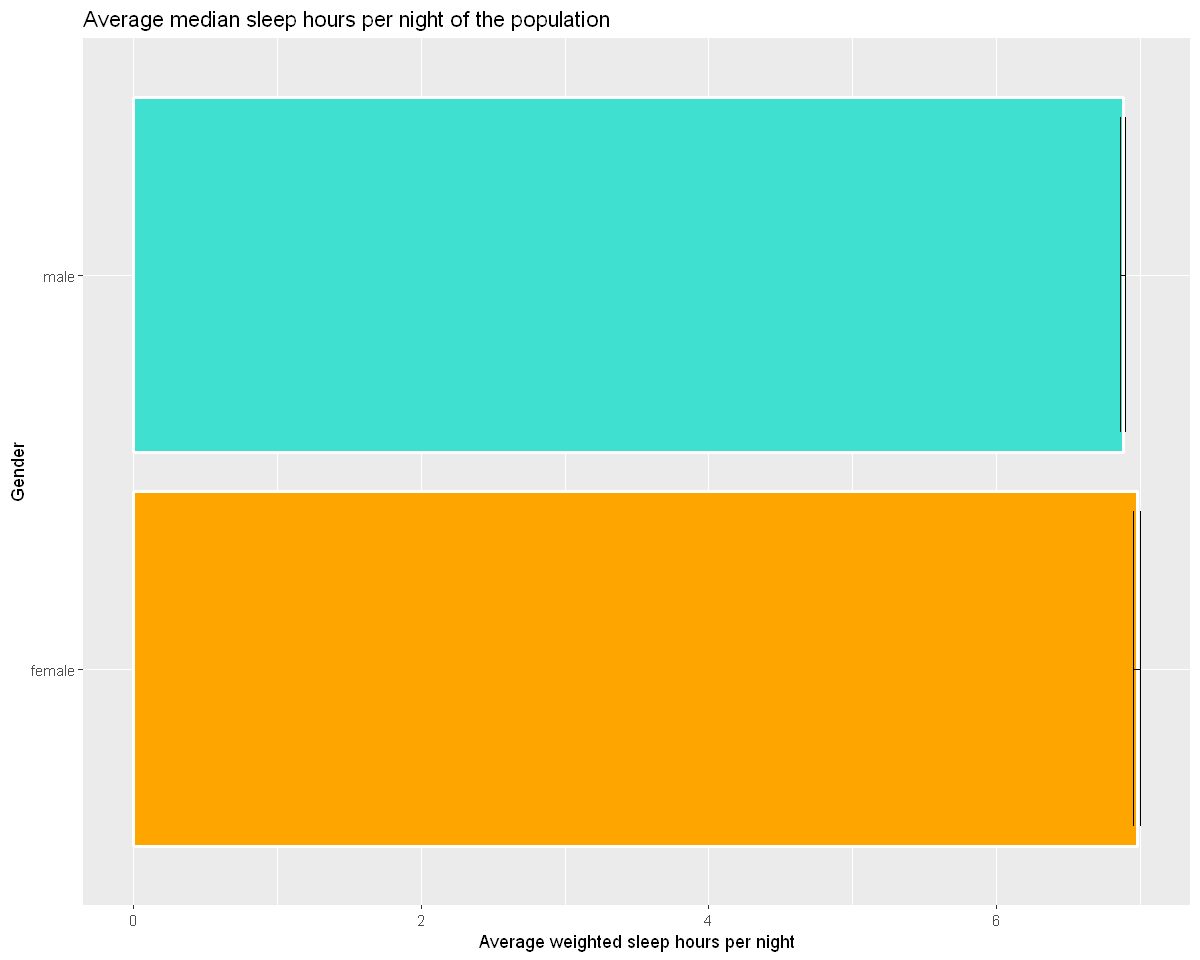

In [103]:
out_5 <- svyby( ~SleepHrsNight, by=~Gender, FUN=svymean, design=NHANES_design, keep.names=TRUE, na.rm=TRUE)


# add errobars

out_5 <- out_5 %>% mutate(lower=SleepHrsNight-se, upper=SleepHrsNight+se)
out_5
#
ggplot(out_5, aes(x=Gender, y=SleepHrsNight, ymin=lower, ymax=upper)) +
geom_col(fill=c("orange", "turquoise"), color="white", size=1)+
geom_errorbar(width=0.8)+
labs(x="Gender", y="Average weighted sleep hours per night")+
ggtitle("Average median sleep hours per night of the population") +
coord_flip()

# Conclusion: the average sleep hour per night are nearly equal for both gender

In [104]:
# unweighted average sleep hours per night by gender
NHANESraw %>% 
filter(!is.na(SleepHrsNight)) %>%  filter(!is.na(Gender)) %>%
group_by(Gender) %>%
select(SleepHrsNight, Gender) %>% 
summarize(average=mean(SleepHrsNight))

# weighted average sleep hours per night by gender
out_5


Gender,average
female,6.901857
male,6.879076


Gender,SleepHrsNight,se,lower,upper
female,6.976103,0.02374684,6.952356,6.999850
male,6.879050,0.01953263,6.859518,6.898583


Warning message:
"Removed 7261 rows containing non-finite values (stat_bin)."

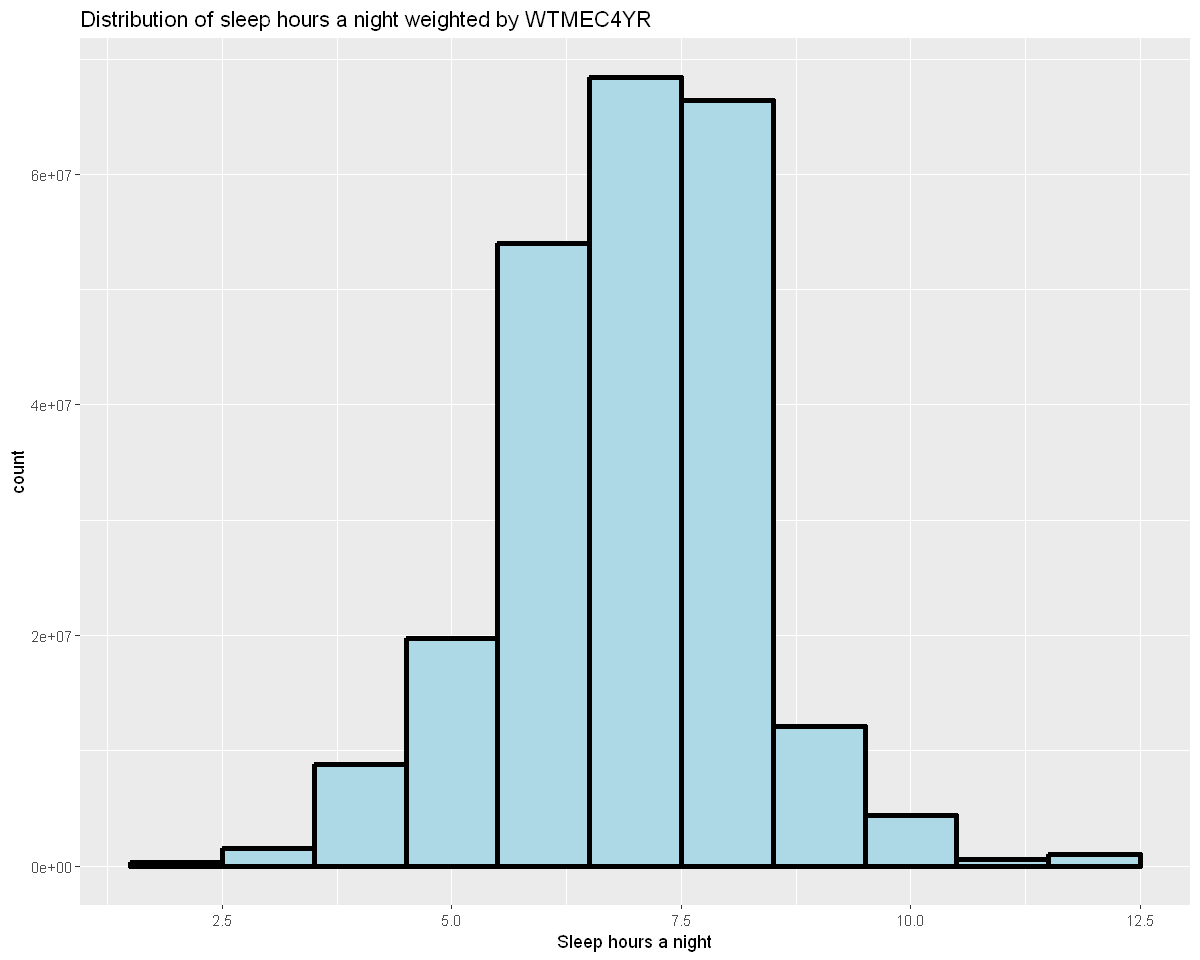

In [105]:

options(repr.plot.width=10, repr.plot.height=8)

ggplot(NHANESraw, aes(x=SleepHrsNight, weight=WTMEC4YR)) +
geom_histogram(binwidth=1, fill="lightblue", color="black", size=1.5) +
ggtitle("Distribution of sleep hours a night weighted by WTMEC4YR")+
labs(x="Sleep hours a night")


In [106]:
# create a density distribution (of sleep hours a night)
# create empirical proportions from NHANESraw_WTMEC4YR used as weights
NHANESraw_WTMEC4YR_proportions <-
NHANESraw %>% filter(!is.na(DaysPhysHlthBad)) %>% mutate(WTMEC4YR_proportions = WTMEC4YR/sum(WTMEC4YR))
head(NHANESraw_WTMEC4YR_proportions )
names(NHANESraw_WTMEC4YR_proportions )

ID,SurveyYr,Gender,Age,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,SexNumPartYear,SameSex,SexOrientation,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,PregnantNow,WTMEC4YR,WTMEC4YR_proportions
51624,2009_10,male,34,409,White,NA,High School,Married,25000-34999,...,1,No,Heterosexual,80100.54,81528.77,1,83,NA,40764.386,1.775260e-04
51626,2009_10,male,16,202,Black,NA,NA,NA,45000-54999,...,NA,NA,NA,13953.08,14509.28,1,84,NA,7254.639,3.159344e-05
51628,2009_10,female,60,722,Black,NA,High School,Widowed,10000-14999,...,NA,No,NA,20090.34,21000.34,2,75,NA,10500.169,4.572749e-05
51629,2009_10,male,26,313,Mexican,NA,9 - 11th Grade,Married,25000-34999,...,1,No,Heterosexual,22537.83,22633.58,1,88,NA,11316.791,4.928382e-05
51630,2009_10,female,49,596,White,NA,Some College,LivePartner,35000-44999,...,1,Yes,Heterosexual,74212.27,74112.49,2,85,NA,37056.243,1.613773e-04
51633,2009_10,male,80,NA,White,NA,Some College,Married,15000-19999,...,NA,NA,NA,11998.40,12381.12,1,77,NA,6190.558,2.695944e-05


[1] "ID"                   "SurveyYr"             "Gender"              
 [4] "Age"                  "AgeMonths"            "Race1"               
 [7] "Race3"                "Education"            "MaritalStatus"       
[10] "HHIncome"             "HHIncomeMid"          "Poverty"             
[13] "HomeRooms"            "HomeOwn"              "Work"                
[16] "Weight"               "Length"               "HeadCirc"            
[19] "Height"               "BMI"                  "BMICatUnder20yrs"    
[22] "BMI_WHO"              "Pulse"                "BPSysAve"            
[25] "BPDiaAve"             "BPSys1"               "BPDia1"              
[28] "BPSys2"               "BPDia2"               "BPSys3"              
[31] "BPDia3"               "Testosterone"         "DirectChol"          
[34] "TotChol"              "UrineVol1"            "UrineFlow1"          
[37] "UrineVol2"            "UrineFlow2"           "Diabetes"            
[40] "DiabetesAge"          "HealthGen"            "DaysPhysHlthBad"     
[43] "DaysMentHlthBad"      "LittleInterest"       "Depressed"           
[46] "nPregnancies"         "nBabies"              "Age1stBaby"          
[49] "SleepHrsNight"        "SleepTrouble"         "PhysActive"          
[52] "PhysActiveDays"       "TVHrsDay"             "CompHrsDay"          
[55] "TVHrsDayChild"        "CompHrsDayChild"      "Alcohol12PlusYr"     
[58] "AlcoholDay"           "AlcoholYear"          "SmokeNow"            
[61] "Smoke100"             "SmokeAge"             "Marijuana"           
[64] "AgeFirstMarij"        "RegularMarij"         "AgeRegMarij"         
[67] "HardDrugs"            "SexEver"              "SexAge"              
[70] "SexNumPartnLife"      "SexNumPartYear"       "SameSex"             
[73] "SexOrientation"       "WTINT2YR"             "WTMEC2YR"            
[76] "SDMVPSU"              "SDMVSTRA"             "PregnantNow"         
[79] "WTMEC4YR"             "WTMEC4YR_proportions"

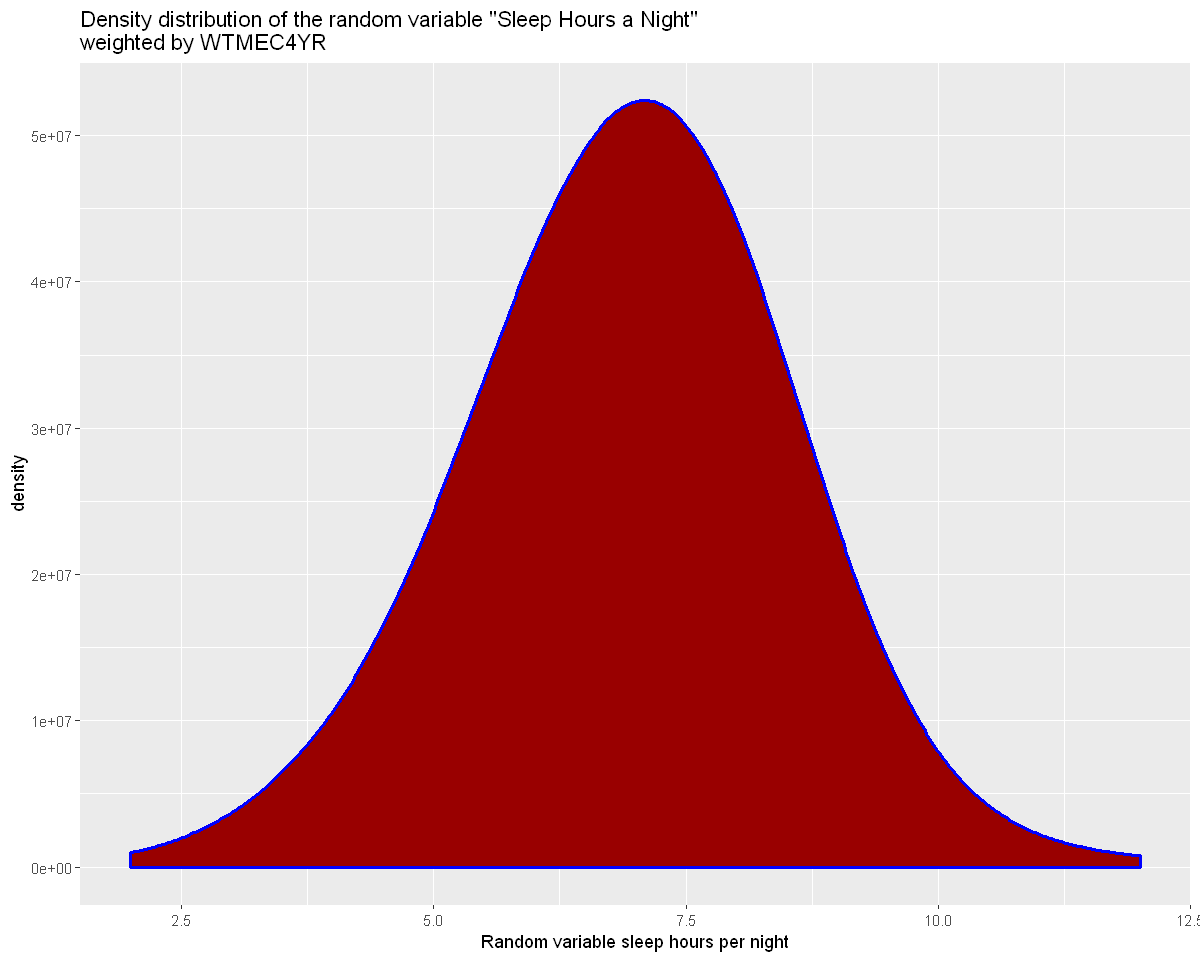

In [107]:
NHANESraw_WTMEC4YR_proportions_SleepHrsNight_plot <- 
NHANESraw_WTMEC4YR_proportions %>% 
ggplot(mapping=aes(x=SleepHrsNight, weight=WTMEC4YR)) + geom_density(bw=1, fill= "#990000", 
                                                                     color="999996", size=1)+
labs(x="Random variable sleep hours per night")+
ggtitle("Density distribution of the random variable \"Sleep Hours a Night\" \nweighted by WTMEC4YR")
suppressWarnings(print(NHANESraw_WTMEC4YR_proportions_SleepHrsNight_plot))

In [108]:
head(NHANESraw_WTMEC4YR_proportions )

ID,SurveyYr,Gender,Age,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,SexNumPartYear,SameSex,SexOrientation,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,PregnantNow,WTMEC4YR,WTMEC4YR_proportions
51624,2009_10,male,34,409,White,NA,High School,Married,25000-34999,...,1,No,Heterosexual,80100.54,81528.77,1,83,NA,40764.386,1.775260e-04
51626,2009_10,male,16,202,Black,NA,NA,NA,45000-54999,...,NA,NA,NA,13953.08,14509.28,1,84,NA,7254.639,3.159344e-05
51628,2009_10,female,60,722,Black,NA,High School,Widowed,10000-14999,...,NA,No,NA,20090.34,21000.34,2,75,NA,10500.169,4.572749e-05
51629,2009_10,male,26,313,Mexican,NA,9 - 11th Grade,Married,25000-34999,...,1,No,Heterosexual,22537.83,22633.58,1,88,NA,11316.791,4.928382e-05
51630,2009_10,female,49,596,White,NA,Some College,LivePartner,35000-44999,...,1,Yes,Heterosexual,74212.27,74112.49,2,85,NA,37056.243,1.613773e-04
51633,2009_10,male,80,NA,White,NA,Some College,Married,15000-19999,...,NA,NA,NA,11998.40,12381.12,1,77,NA,6190.558,2.695944e-05


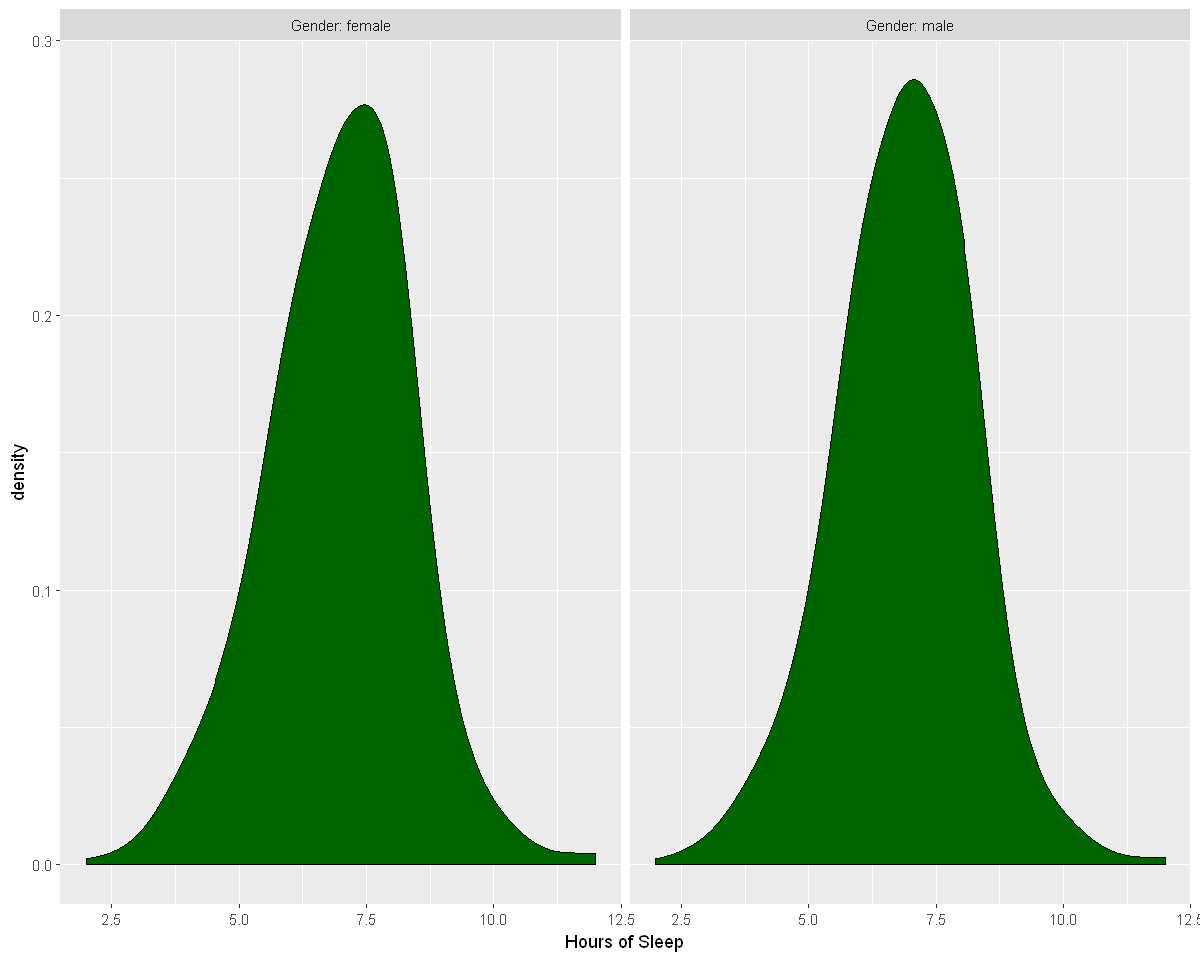

In [109]:


# Density plot of sleep faceted by gender
NHANESraw %>%
    filter(!is.na(SleepHrsNight), !is.na(Gender)) %>%
    group_by(Gender) %>%
    mutate(WTMEC4YR_std = WTMEC4YR/sum(WTMEC4YR)) %>%
    ggplot(mapping = aes(x = SleepHrsNight, weight = WTMEC4YR_std)) + 
        geom_density(bw = 0.6,  fill = "darkgreen") +
        labs(x = "Hours of Sleep") + 
        facet_wrap(~Gender, labeller = "label_both")


#### Inference for the quantitative variables SleepHrsNight and Gender
<p>
While the values or observations are weighted with the survey weights, it remains unclear, whether or not 
there is a relationship between sample observations and the population or not. 
This is falsified with a statistical inference test.
</p>
<p>
<b>Variables:</b> SleepHrsNight, Gender  <br>
<b>Level of measurement:</b> SleepHrsNight - numerical, interval; Gender - categorical, nominal <br>
<b>Statistical test:</b> Two sample T-Test<br>
<b>Null-hypothesis:</b> The mean of SleepHrsNightis for Gender the same. 
There is no relationship between SleepHrsNight and Gender.<br>
<b>Alternative hypothesis: </b>The mean of SleepHrsNight is for Gender the significantly 
different.<br>
The observations made would not be expected if there was not a difference between them. <br>
There is a relationship between SleepHrsNight and Gender.<br>
<b>Function:</b> svyttest
</p>

In [110]:
# Run a survey-weighted t-test
svyttest(formula = SleepHrsNight~Gender,
       design = NHANES_design)

Warning message in summary.glm(g):
"observations with zero weight not used for calculating dispersion"Warning message in summary.glm(glm.object):
"observations with zero weight not used for calculating dispersion"


	Design-based t-test

data:  SleepHrsNight ~ Gender
t = -3.4077, df = 32, p-value = 0.001785
alternative hypothesis: true difference in mean is not equal to 0
95 percent confidence interval:
 -0.15287218 -0.04123256
sample estimates:
difference in mean 
       -0.09705237 


<p>
<b>Findings</b> 
</p>
<p>
The expected t-value given a significance level of 0.05 and degrees of freedom of 32 would be around 2.042. 
The t-value is -3.4077 given by a <a href="https://www.biologyforlife.com/t-test.html">t-table</a>. 
This means the t-value occurs further on in the tails of the t-distribution.
Also the p-value is with 0.001785 quite smaller than 0.05. The difference in mean is -0.09705237 and not 0. 
Finally 0 is outside the confidence interval.
</p>
<p>
<b>Conclusion</b> 
</p>
<p>
All findings prove there is a relationship between SleepHrsNight and Gender. <br>
The mean of SleepHrsNight is for Gender significantly different.<br>
The Null-hypothesis is rejected.  
</p>

#### What is the Difference between Frequency and Density in a Histogram?

The vertical scale of a 'frequency histogram' shows the number of observations in each bin. 
The vertical scale of a 'density histogram' shows units that make the total area of all the bars add to 1. This makes it possible to show the density curve of the population using the same vertical scale.

<a href ="https://math.stackexchange.com/questions/2666834/what-is-the-difference-between-frequency-and-density-in-a-histogram">math.stackexchange</a>

Warning message:
"Removed 7862 rows containing non-finite values (stat_bin)."

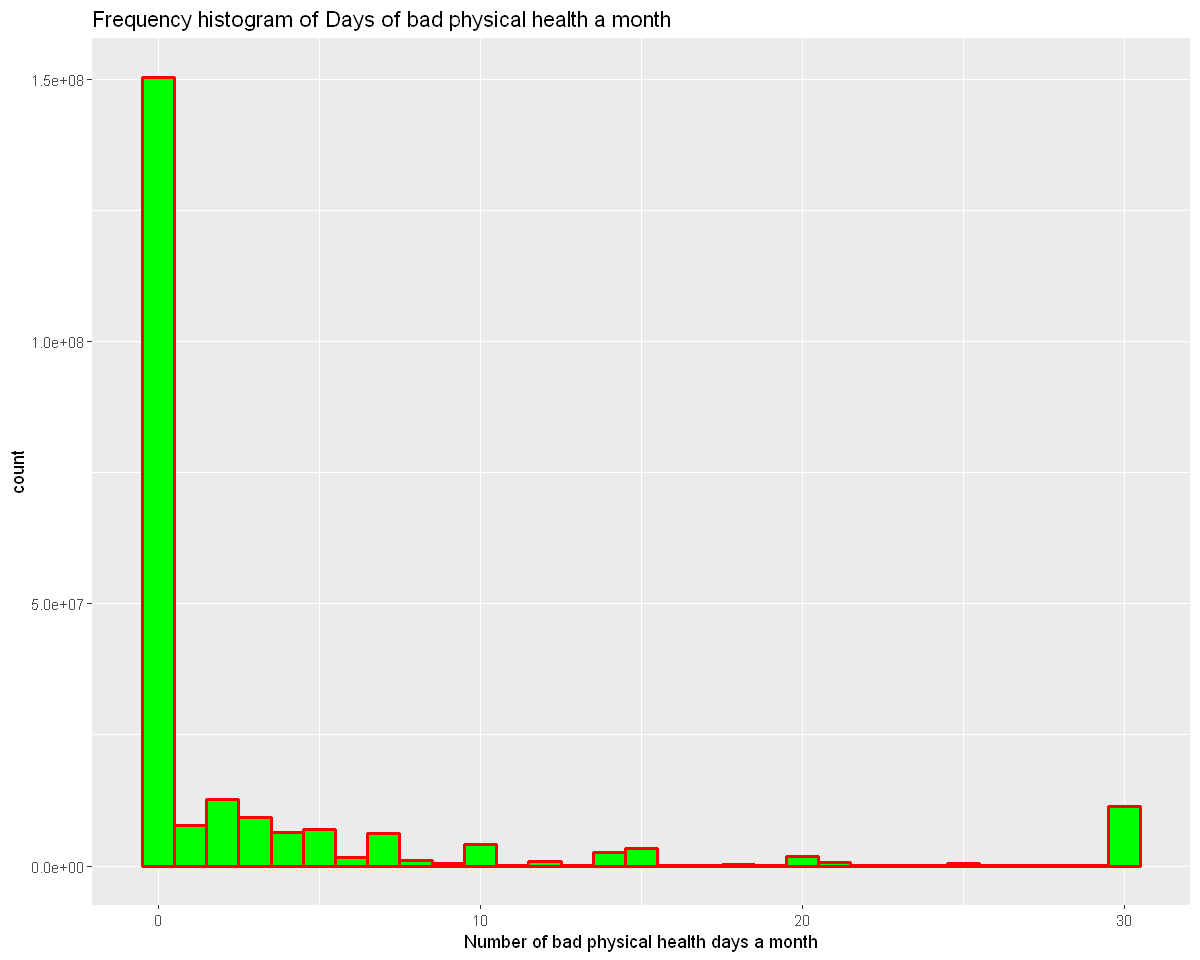

In [111]:
ggplot(NHANESraw, mapping=aes(x=DaysPhysHlthBad,weight=WTMEC4YR)) + 
geom_histogram(binwidth=1, fill="green", color="red", size=1)+
xlab("Number of bad physical health days a month")+
ggtitle("Frequency histogram of Days of bad physical health a month")
# Interpretation: The histogram is skewed too the right. 
# The greatest group of the population have zero bad days in month, but there is also a group with constant (30) bad days.

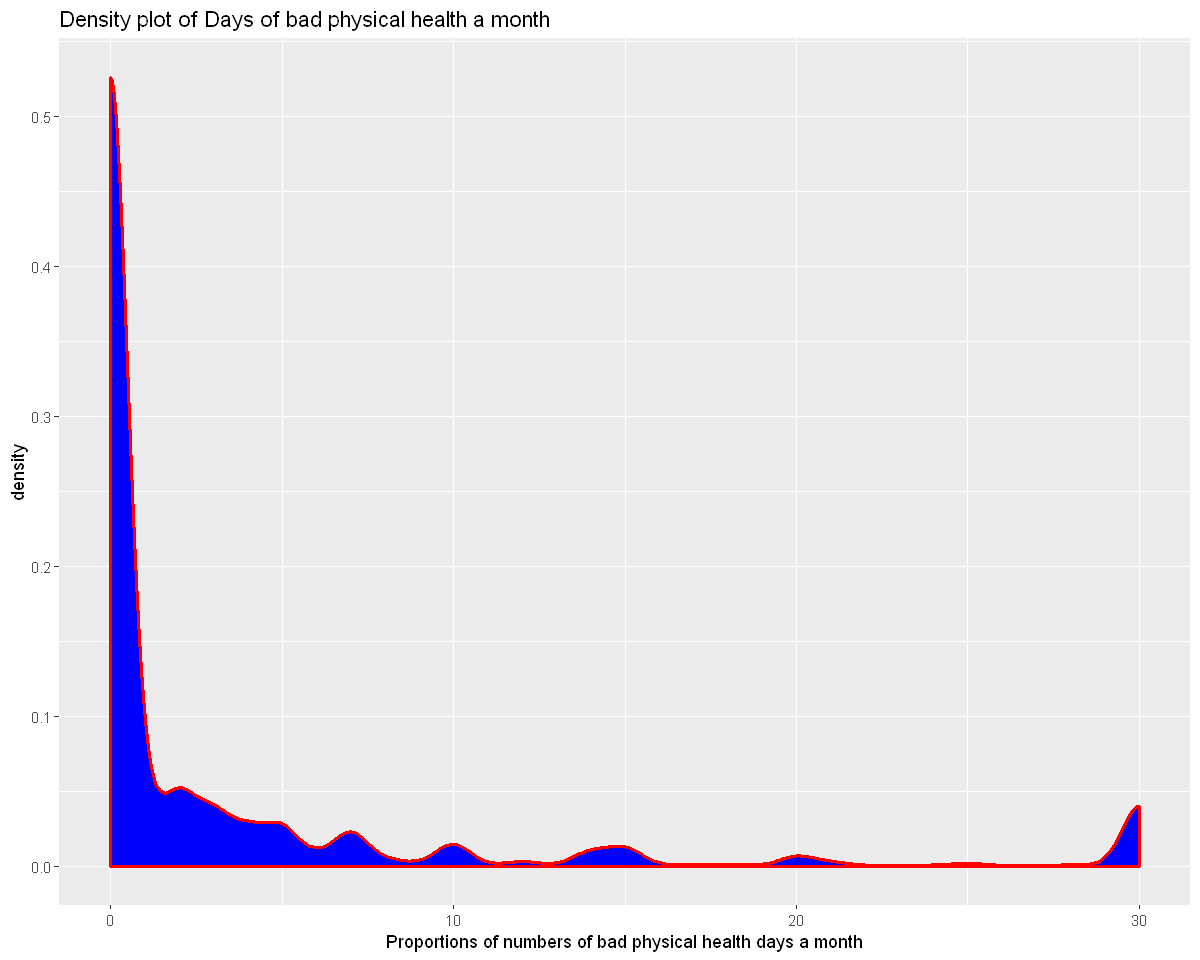

In [112]:
ggplot(NHANESraw_WTMEC4YR_proportions , mapping=aes(x=DaysPhysHlthBad, weight=WTMEC4YR_proportions ))+
geom_density(bw=0.5, color="red", fill ="blue", size=1)+
xlab("Proportions of numbers of bad physical health days a month")+
ggtitle("Density plot of Days of bad physical health a month")
# What's the difference between a probability and a proportion?
# https://stats.stackexchange.com/questions/1525/whats-the-difference-between-a-probability-and-a-proportion

In [113]:
str(NHANESraw_WTMEC4YR_proportions)

Classes 'tbl_df', 'tbl' and 'data.frame':	12431 obs. of  80 variables:
 $ ID                  : int  51624 51626 51628 51629 51630 51633 51635 51640 51641 51643 ...
 $ SurveyYr            : Factor w/ 2 levels "2009_10","2011_12": 1 1 1 1 1 1 1 1 1 1 ...
 $ Gender              : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ Age                 : int  34 16 60 26 49 80 80 17 13 42 ...
 $ AgeMonths           : int  409 202 722 313 596 NA NA 208 156 514 ...
 $ Race1               : Factor w/ 5 levels "Black","Hispanic",..: 4 1 1 3 4 4 4 2 1 1 ...
 $ Race3               : Factor w/ 6 levels "Asian","Black",..: NA NA NA NA NA NA NA NA NA NA ...
 $ Education           : Factor w/ 5 levels "8th Grade","9 - 11th Grade",..: 3 NA 3 2 4 4 2 NA NA 2 ...
 $ MaritalStatus       : Factor w/ 6 levels "Divorced","LivePartner",..: 3 NA 6 3 2 3 6 NA NA 3 ...
 $ HHIncome            : Factor w/ 12 levels "0-4999","10000-14999",..: 5 7 2 5 6 3 3 2 11 6 ...
 $ HHIncomeMid         : int  30000

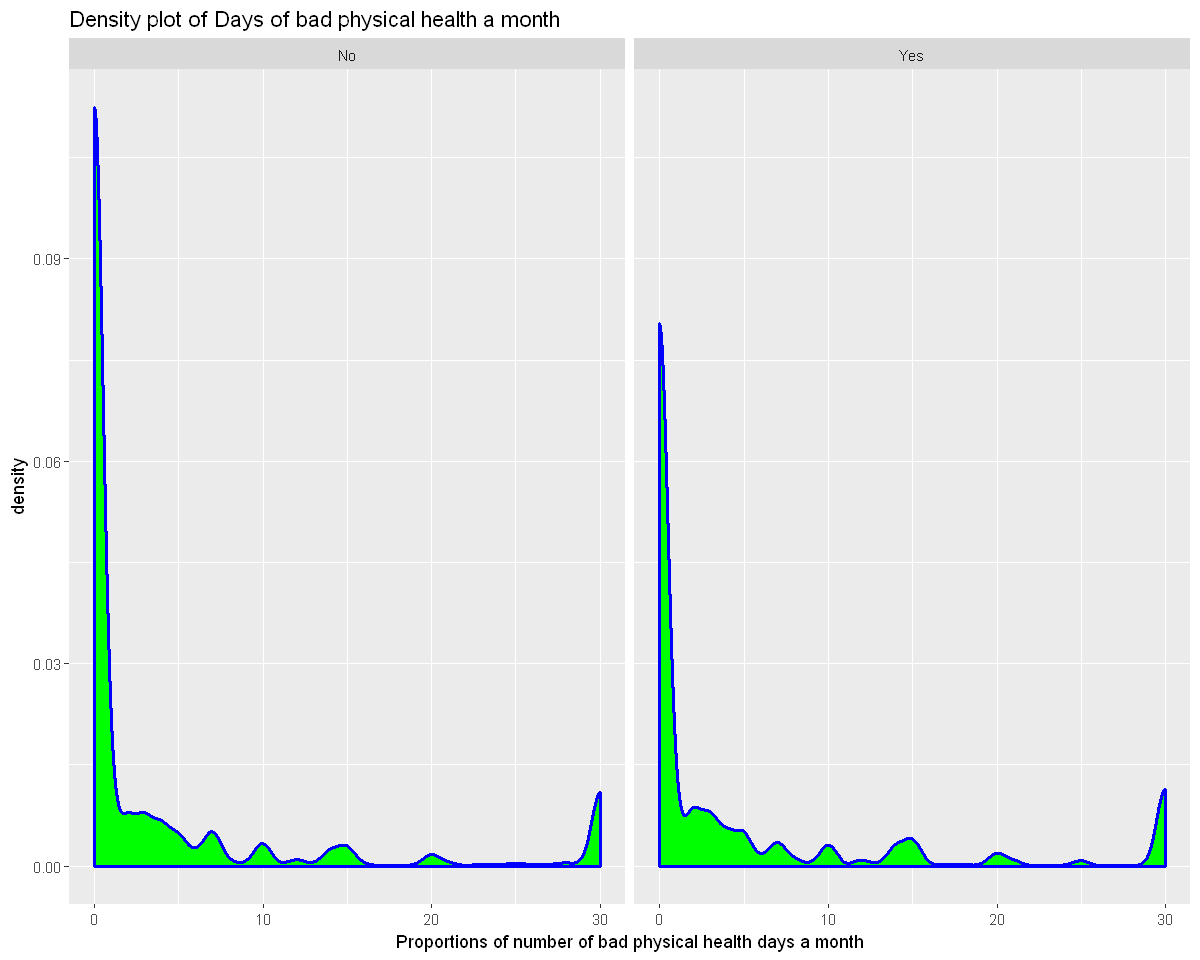

In [114]:
NHANESraw_WTMEC4YR_proportions_facet <- 
NHANESraw_WTMEC4YR_proportions %>% filter(!is.na(SmokeNow), !is.na(DaysPhysHlthBad)) %>% group_by(SmokeNow) %>%
ggplot(aes(x=DaysPhysHlthBad, weight=WTMEC4YR_proportions )) + geom_density(bw=0.5, color="blue", fill="green", size=1) +
facet_wrap(~SmokeNow) + 
xlab("Proportions of number of bad physical health days a month")+
ggtitle("Density plot of Days of bad physical health a month")
# https://stackoverflow.com/questions/13286531/how-to-suppress-warnings-when-plotting-with-ggplot#13286617
suppressWarnings(print(NHANESraw_WTMEC4YR_proportions_facet))


#### Inference for the quantitative variables DaysPhysHlthBad andSmokeNow
<p>
While the values or observations are weighted with the survey weights, it remains unclear, whether or not 
there is a relationship between sample observations and the population or not. 
This is falsified with a statistical inference test.
</p>
<p>
<b>Variables:</b> DaysPhysHlthBad, SmokeNow  <br>
<b>Level of measurement:</b> DaysPhysHlthBad - numerical, interval; SmokeNow - categorical, nominal <br>
<b>Statistical test:</b> Two sample T-Test<br>
<b>Null-hypothesis:</b> The mean of DaysPhysHlthBad is for smokers and non-smokers the same. 
There is no relationship between DaysPhysHlthBad and smoking.<br>
<b>Alternative hypothesis: </b>The mean of DaysPhysHlthBad is for smokers and non-smokers the significantly different.<br>
The observations made would not be expected if there was not a difference between them. <br>
There is a relationship between DaysPhysHlthBad and smoking.<br>
<b>Function:</b> svyttest
</p>

In [115]:
svyttest(formula=DaysPhysHlthBad~SmokeNow , design=NHANES_design)


	Design-based t-test

data:  DaysPhysHlthBad ~ SmokeNow
t = 3.8208, df = 32, p-value = 0.0005778
alternative hypothesis: true difference in mean is not equal to 0
95 percent confidence interval:
 0.5078563 1.5776753
sample estimates:
difference in mean 
          1.042766 


<p>
<b>Findings</b> 
</p>
<p>
The expected t-value given a significance level of 0.05 and degrees of freedom of 32 would be around 2.042. 
The t-value is 3.8208 given by a <a href="https://www.biologyforlife.com/t-test.html">t-table</a>. 
This means the t-value occurs further on in the tails of the t-distribution.
Also the p-value is with 0.0005778 quite smaller than 0.05. The difference in mean is 1.042766 and not 0. 
Finally 0 is outside the confidence interval.
</p>
<p>
<b>Conclusion</b> 
</p>
<p>
All findings prove there is a relationship between DaysPhysHlthBad and smoking. <br>
The mean of DaysPhysHlthBad is for smokers and non-smokers significantly different.<br>
The Null-hypothesis is rejected.  
</p>

PhysActive,TotChol,se
No,5.020426,0.02227831
Yes,4.888203,0.02766992



	Design-based t-test

data:  TotChol ~ PhysActive
t = -3.7936, df = 32, p-value = 0.0006232
alternative hypothesis: true difference in mean is not equal to 0
95 percent confidence interval:
 -0.20053677 -0.06390939
sample estimates:
difference in mean 
        -0.1322231 


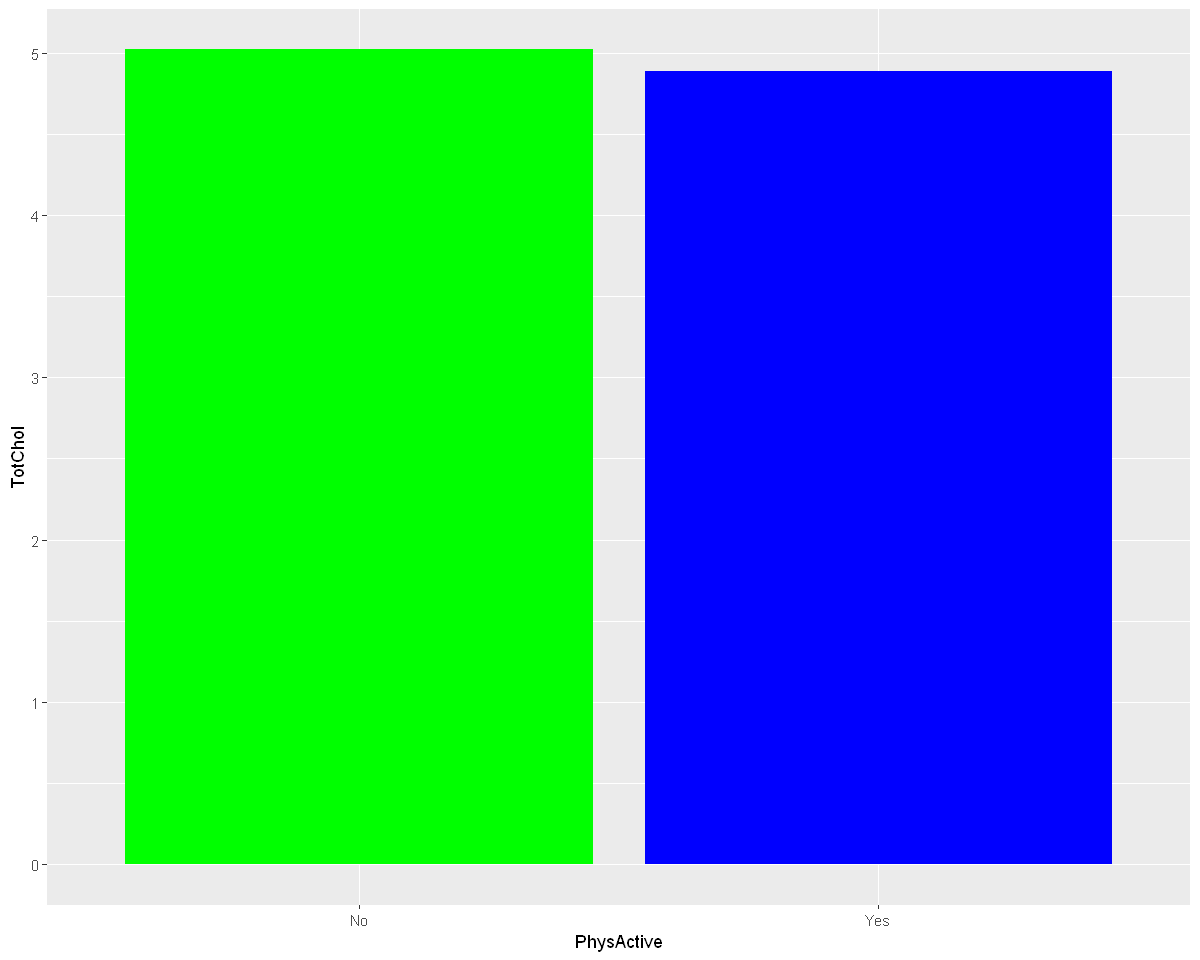

In [116]:
# Find means of total cholesterol by whether or not active 
out_TotChol_PhysActive <-
           svyby(formula = ~TotChol,
           by = ~PhysActive, 
           design = NHANES_design,
           FUN = svymean, 
           na.rm = TRUE, 
           keep.names = FALSE)
out_TotChol_PhysActive 

ggplot(data = out_TotChol_PhysActive, mapping = aes(x=PhysActive, y=TotChol)) + 
geom_col(fill=c("green", "blue"))

svyttest(formula = TotChol~PhysActive,design = NHANES_design)

# Inference for the quantitative variables TotChol and PhysActive
# All findings prove there is a relationship between TotChol and PhysActive.
# The mean of TotChol is for smokers and PhysActive significantly different.
# The Null-hypothesis is rejected.

### Modeling quantitative data

<p>
Modeling is not only describing if two variables relate, but how these relate to each other. For example: What does the population look like? What is the strength of their relationship? Is the relationship positive or negative? Is there a trend? What says the regression analysis? Which other algorithms can be applied?
</p>

In [117]:
# AgeMonths Age in months at screening of study participant. Reported for participants aged 0 to
# 79 years for 2009 to 2010 data Reported for participants aged 0 to 2 years for 2011 to 2012 data
# HeadCirc Head circumference in cm. Reported for participants aged 0 years (0 - 6 months).

names(NHANESraw)


NHANESraw_AM_HC <-
NHANESraw %>% filter(AgeMonths <= 6) %>% select(AgeMonths, HeadCirc)

head(NHANESraw_AM_HC)
dim(NHANESraw_AM_HC)
unique(NHANESraw_AM_HC["AgeMonths"]) %>% arrange(AgeMonths)

str(NHANESraw_AM_HC)




[1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeMonths"        "Race1"            "Race3"            "Education"       
 [9] "MaritalStatus"    "HHIncome"         "HHIncomeMid"      "Poverty"         
[13] "HomeRooms"        "HomeOwn"          "Work"             "Weight"          
[17] "Length"           "HeadCirc"         "Height"           "BMI"             
[21] "BMICatUnder20yrs" "BMI_WHO"          "Pulse"            "BPSysAve"        
[25] "BPDiaAve"         "BPSys1"           "BPDia1"           "BPSys2"          
[29] "BPDia2"           "BPSys3"           "BPDia3"           "Testosterone"    
[33] "DirectChol"       "TotChol"          "UrineVol1"        "UrineFlow1"      
[37] "UrineVol2"        "UrineFlow2"       "Diabetes"         "DiabetesAge"     
[41] "HealthGen"        "DaysPhysHlthBad"  "DaysMentHlthBad"  "LittleInterest"  
[45] "Depressed"        "nPregnancies"     "nBabies"          "Age1stBaby"      
[49] "SleepHrsNight"    "SleepTrouble"     "PhysActive"       "PhysActiveDays"  
[53] "TVHrsDay"         "CompHrsDay"       "TVHrsDayChild"    "CompHrsDayChild" 
[57] "Alcohol12PlusYr"  "AlcoholDay"       "AlcoholYear"      "SmokeNow"        
[61] "Smoke100"         "SmokeAge"         "Marijuana"        "AgeFirstMarij"   
[65] "RegularMarij"     "AgeRegMarij"      "HardDrugs"        "SexEver"         
[69] "SexAge"           "SexNumPartnLife"  "SexNumPartYear"   "SameSex"         
[73] "SexOrientation"   "WTINT2YR"         "WTMEC2YR"         "SDMVPSU"         
[77] "SDMVSTRA"         "PregnantNow"      "WTMEC4YR"

AgeMonths,HeadCirc
3,42.7
4,42.8
2,38.8
0,36.0
5,42.7
2,41.9


[1] 484   2

AgeMonths
0
1
2
3
4
5
6


Classes 'tbl_df', 'tbl' and 'data.frame':	484 obs. of  2 variables:
 $ AgeMonths: int  3 4 2 0 5 2 6 3 2 1 ...
 $ HeadCirc : num  42.7 42.8 38.8 36 42.7 41.9 44.3 42 41.3 38.9 ...


In [118]:
# quantiles of HeadCirc grouped by months

NHANESraw_AM_HC_Quantiles <- 
NHANESraw_AM_HC %>% group_by(AgeMonths)%>% 
summarise("Median" = quantile(HeadCirc, probs=0.5, na.rm=TRUE),
          "Quantile_(25%)" = quantile(HeadCirc, probs=0.25, na.rm=TRUE),
          "Quantile_(75%)" = quantile(HeadCirc, probs=0.75, na.rm=TRUE),
          "Minimum" = min(HeadCirc, na.rm=TRUE),
          "Maximum" = max(HeadCirc, na.rm=TRUE),
          )

NHANESraw_AM_HC_Quantiles

Medians <- as.numeric(unlist(NHANESraw_AM_HC_Quantiles["Median"]))
class(Medians)
Medians

AgeMonths,Median,Quantile_(25%),Quantile_(75%),Minimum,Maximum
0,37.50,36.600,38.800,32.5,40.2
1,39.00,38.000,40.100,35.8,42.1
2,41.00,39.700,42.000,37.4,43.8
3,42.00,40.575,42.700,38.2,46.5
4,42.55,41.400,43.750,38.2,48.0
5,43.10,42.300,43.900,39.0,48.0
6,44.00,43.200,44.725,40.2,48.4


[1] "numeric"

[1] 37.50 39.00 41.00 42.00 42.55 43.10 44.00

Warning message:
"Removed 10 rows containing missing values (geom_point)."

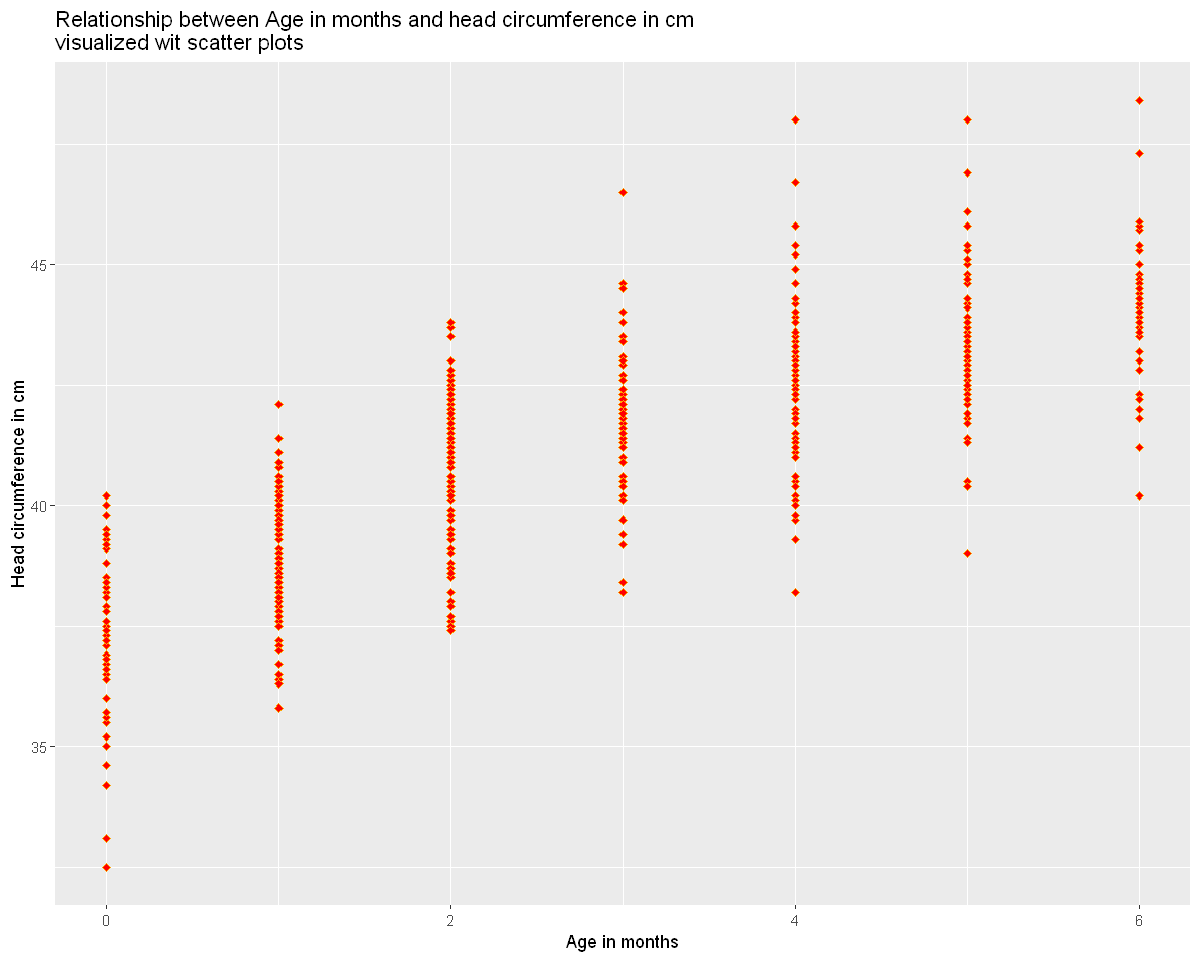

In [119]:
# Visualize the relationship between the two numeric variables AgeMonths and HeadCirc with a scatterplot
# each point represents a human younger than 6 months (a baby) with an HeadCirc
# the plott visualizes the values of the data set
# but every baby represents a group of babies (or sample) within the survey design

NHANESraw_AM_HC_scatterplot <- 
NHANESraw_AM_HC %>% ggplot(mapping=aes(x=AgeMonths, y=HeadCirc))+ 
geom_point(color="orange", shape = 23, fill="red")+
labs(x="Age in months", y="Head circumference in cm")+
ggtitle("Relationship between Age in months and head circumference in cm \nvisualized wit scatter plots")

NHANESraw_AM_HC_scatterplot



Warning message:
"Removed 10 rows containing missing values (geom_point)."

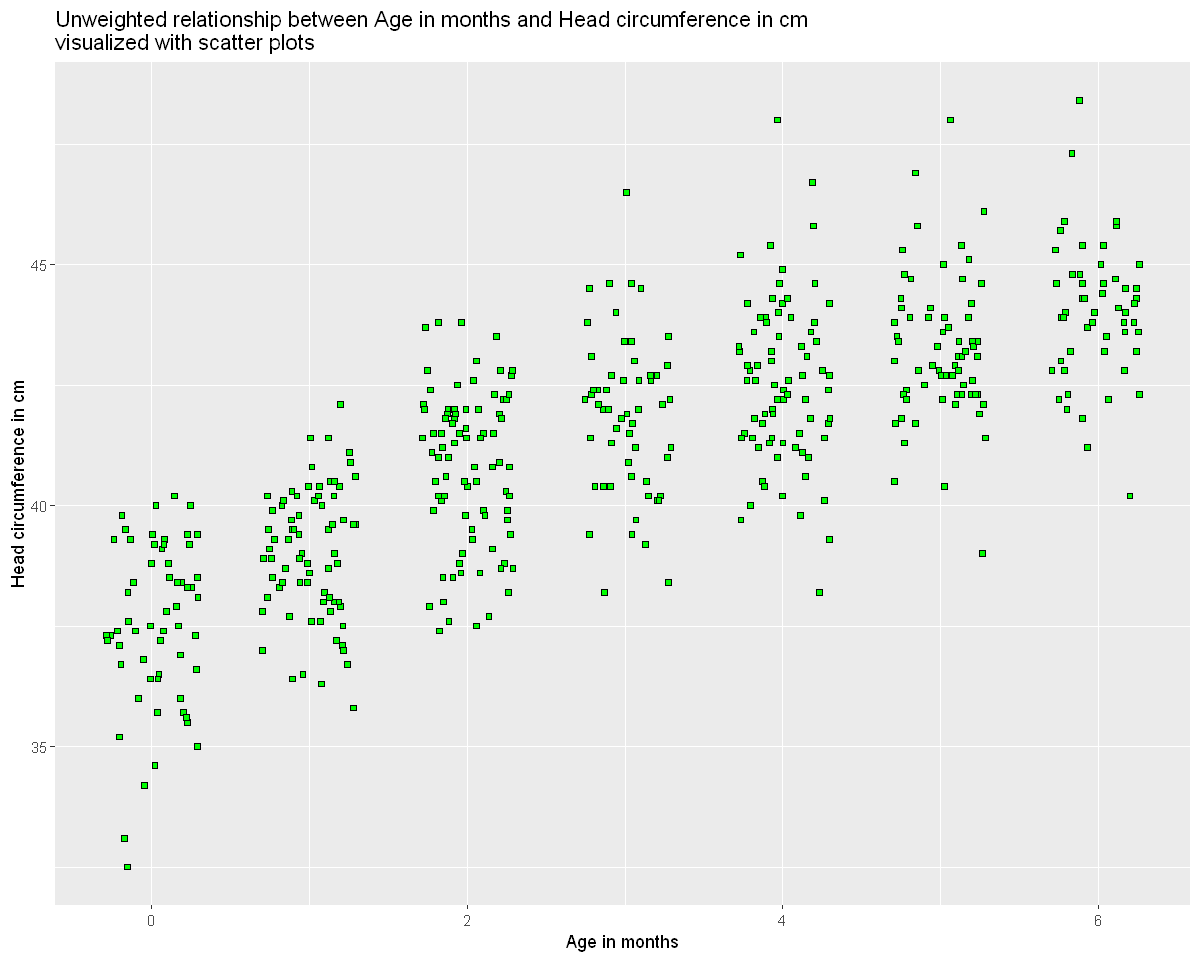

In [120]:
# using geom_jitter() for a better understanding of density (of particular areas)

NHANESraw_AM_HC_scatterplot_jitter <- 
NHANESraw_AM_HC %>% ggplot(mapping=aes(x=AgeMonths, y=HeadCirc))+
geom_jitter(width=0.3, height=0, shape=22, fill="green")+
labs(x="Age in months", y="Head circumference in cm")+
ggtitle("Unweighted relationship between Age in months and Head circumference in cm \nvisualized with scatter plots")


NHANESraw_AM_HC_scatterplot_jitter

Warning message:
"Removed 10 rows containing non-finite values (stat_boxplot)."

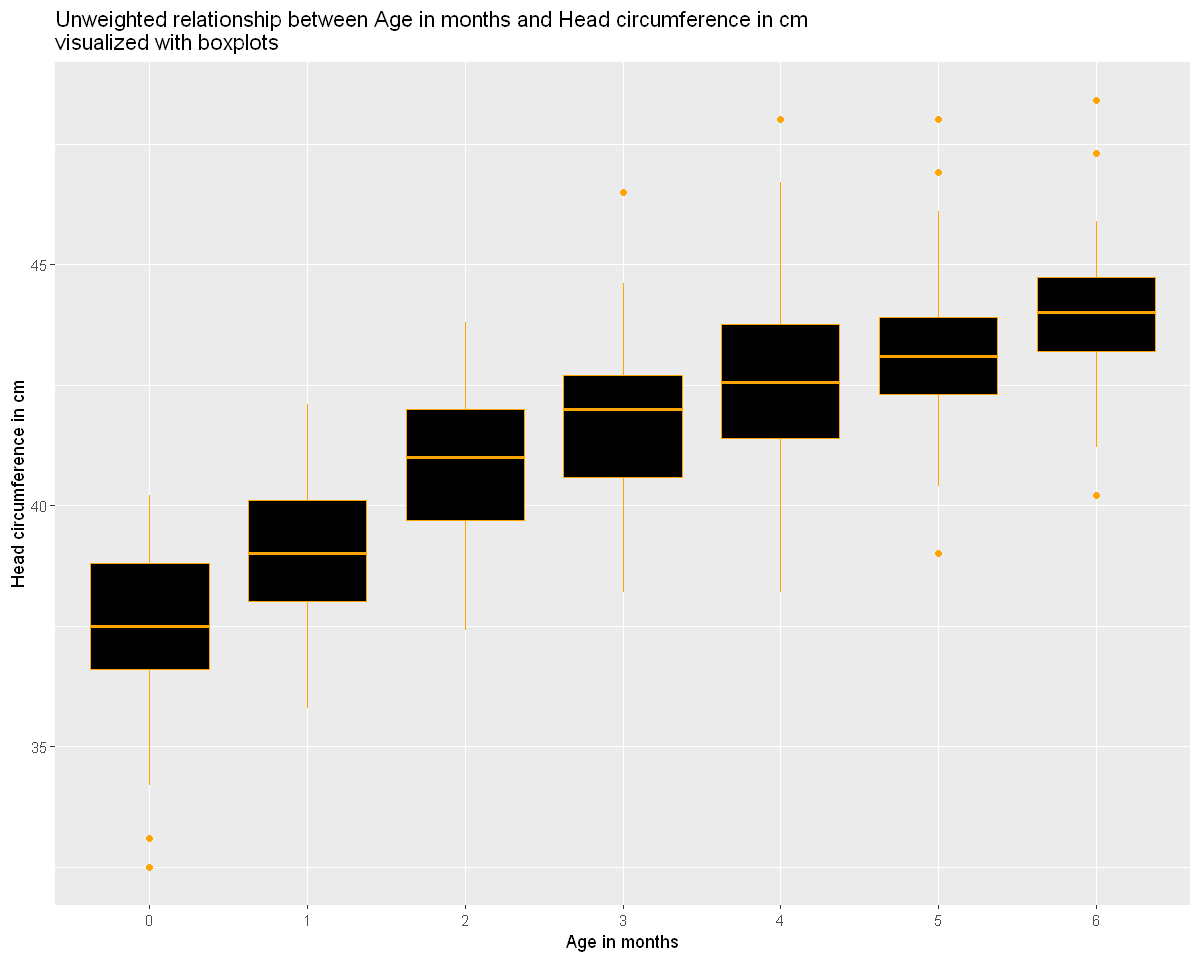

In [121]:
NHANESraw_AM_HC %>% ggplot(mapping=aes(x=factor(AgeMonths), y=HeadCirc))+
geom_boxplot(color="orange", fill="black") +
labs(x="Age in months", y="Head circumference in cm")+
ggtitle("Unweighted relationship between Age in months and Head circumference in cm \nvisualized with boxplots")



In [122]:
# incorporate weights (WTMEC4YR)


NHANESraw_AM_HC_WTMEC4YR <- 
NHANESraw %>%
filter(AgeMonths <=6) %>% select(AgeMonths, HeadCirc, WTMEC4YR)

head(NHANESraw_AM_HC_WTMEC4YR)

# the baby aged 3 months with a HeadCirc of 42.7 cm in the first row represents 12914.987 babies

AgeMonths,HeadCirc,WTMEC4YR
3,42.7,12914.987
4,42.8,12791.480
2,38.8,2359.383
0,36.0,4306.393
5,42.7,2921.660
2,41.9,5560.664


In [123]:
NHANESraw_AM_HC_WTMEC4YR_Gender <- 
NHANESraw %>%
filter(AgeMonths <=6) %>% select(AgeMonths, HeadCirc, WTMEC4YR, Gender)%>% arrange(AgeMonths)


head(NHANESraw_AM_HC_WTMEC4YR_Gender)

AgeMonths,HeadCirc,WTMEC4YR,Gender
0,36.0,4306.393,female
0,40.0,3281.657,male
0,38.8,2450.847,female
0,33.1,3987.272,female
0,35.5,13440.550,male
0,37.9,11232.586,female


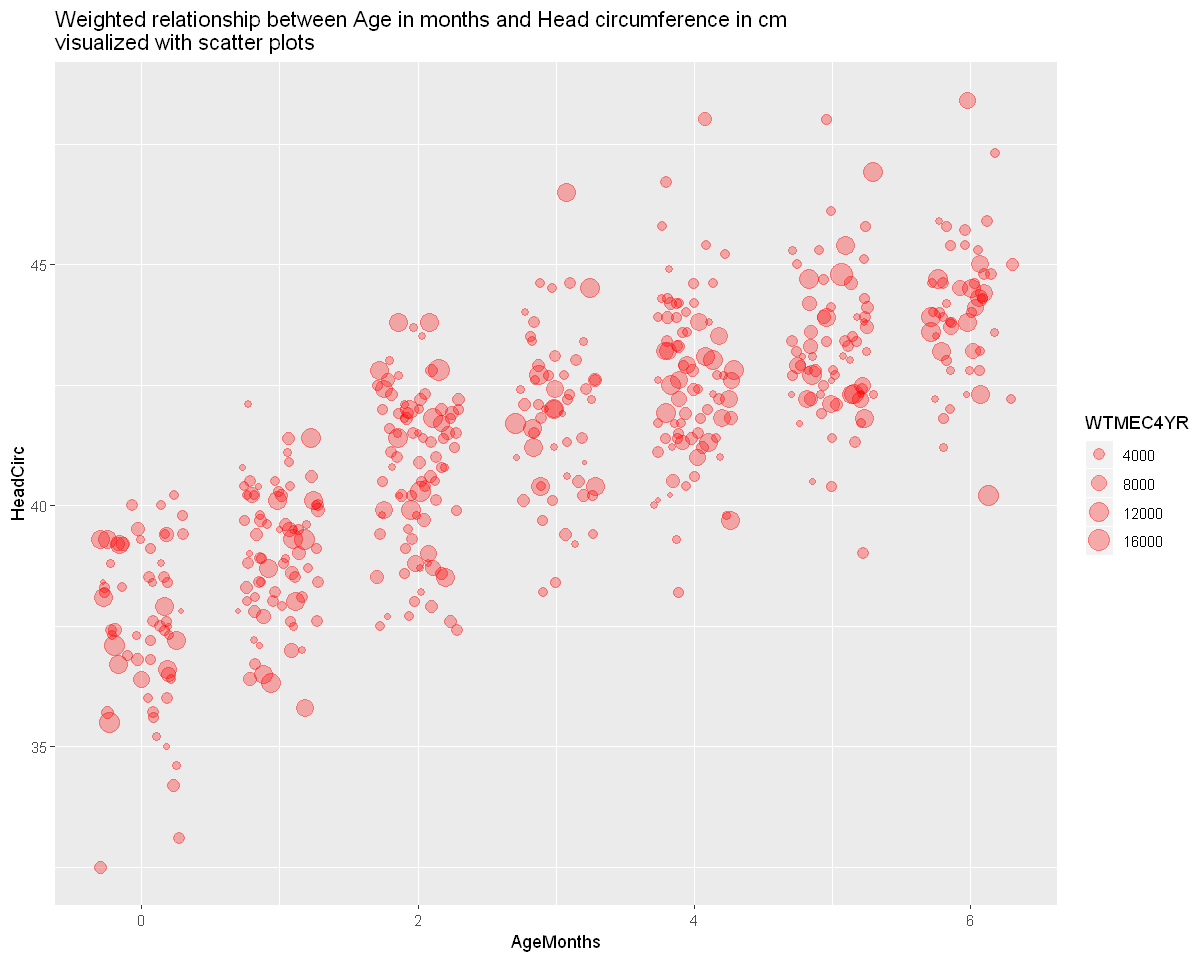

In [124]:
# create a bubble plot
# map every data point to the weight its represents through the size of the data point
NHANESraw_AM_HC_WTMEC4YR_weighted_plot <-
NHANESraw_AM_HC_WTMEC4YR %>% 
na.omit() %>% 
ggplot(mapping=aes(x=AgeMonths, y=HeadCirc, size=WTMEC4YR)) +
geom_jitter(width=0.3, height=0, alpha=0.3,  color="red")+
ggtitle("Weighted relationship between Age in months and Head circumference in cm \nvisualized with scatter plots")

NHANESraw_AM_HC_WTMEC4YR_weighted_plot

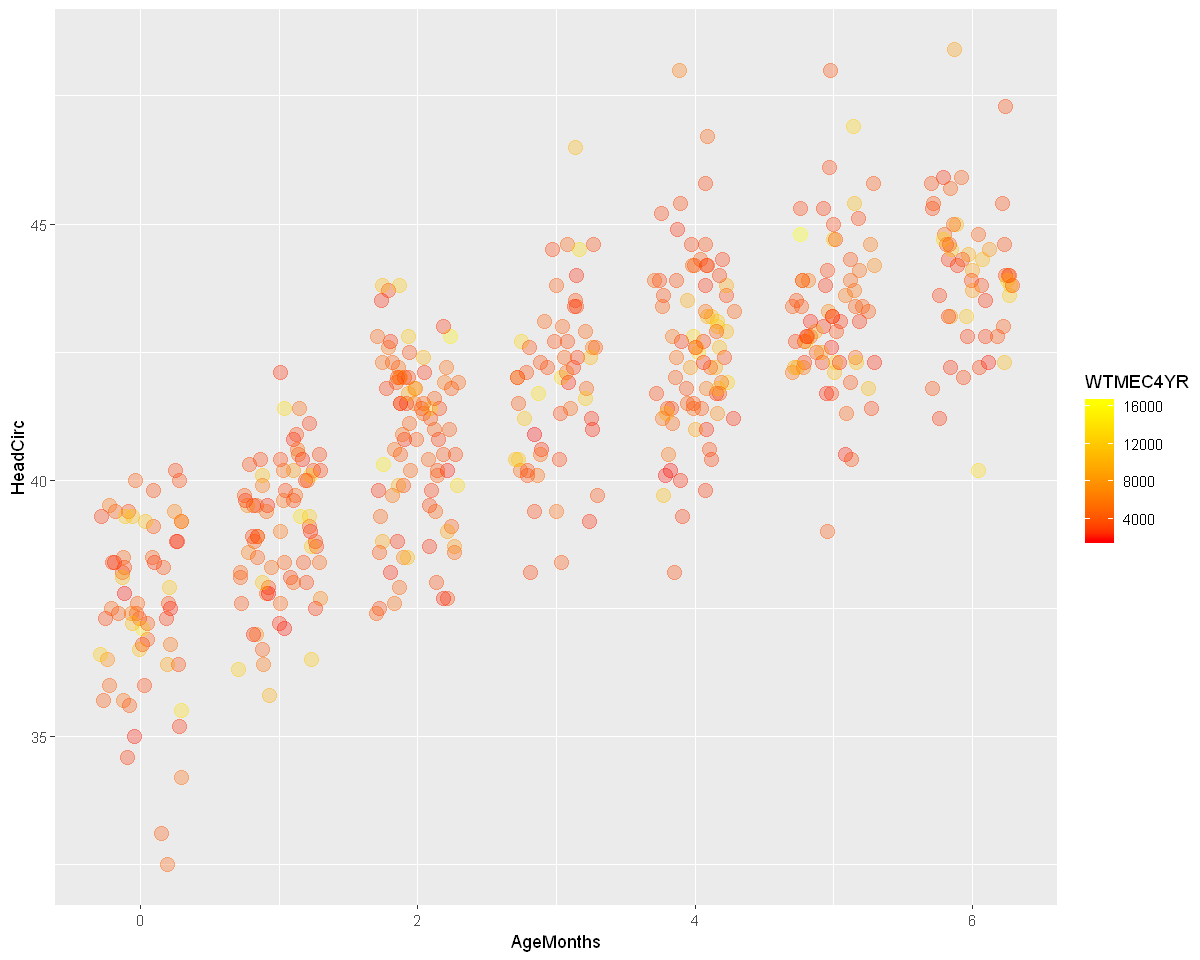

In [125]:
# create a bubble plot
# map every data point to the weight its represents through the color of the data point

NHANESraw_AM_HC_WTMEC4YR %>% na.omit() %>% 
ggplot(mapping=aes(x=AgeMonths, y=HeadCirc, color=WTMEC4YR)) +
geom_jitter(width=0.3, height=0, alpha=0.3, size=4)+
scale_color_gradient( low = "red", high = "yellow") 

#### Adding a trend line to the plots visualizing numerical variables with geom_smooth

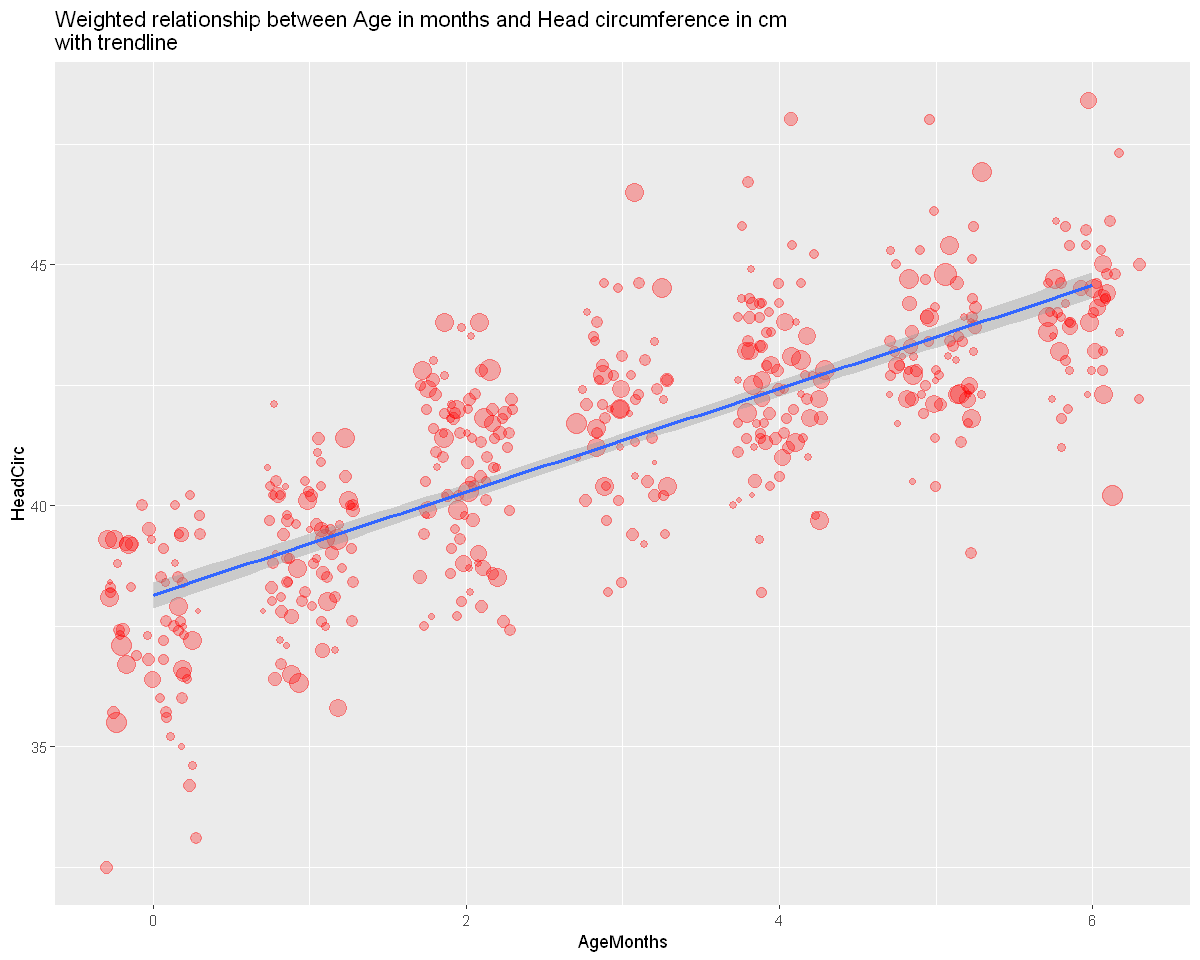

In [126]:
NHANESraw_AM_HC_WTMEC4YR_weighted_plot +
geom_smooth(method="lm", mapping=aes(weight=WTMEC4YR))+
guides(size=FALSE)+
ggtitle("Weighted relationship between Age in months and Head circumference in cm \nwith trendline")

## Conclusion: there is a positive trend between weight and height

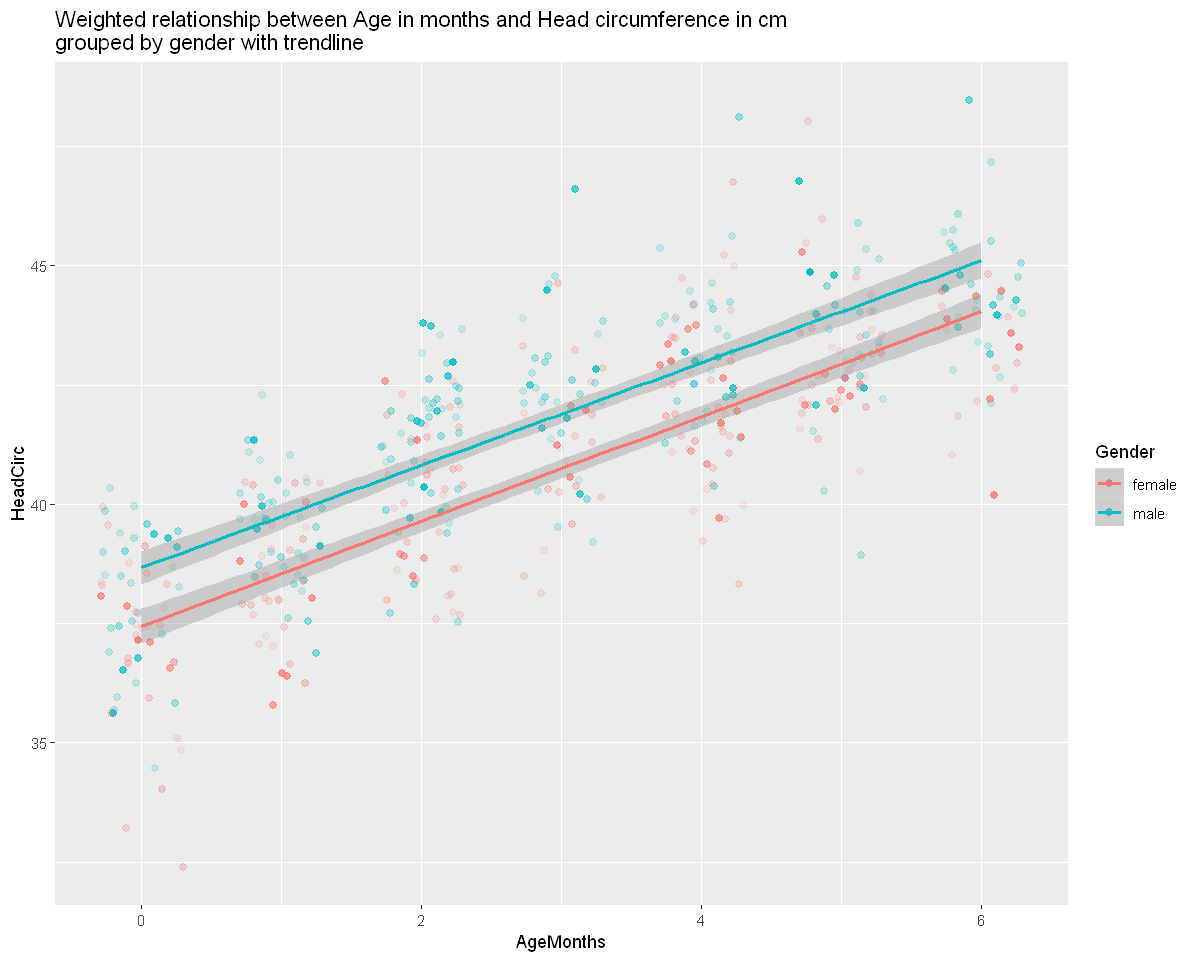

In [127]:
NHANESraw_AM_HC_WTMEC4YR_Gender %>% na.omit() %>%
ggplot(aes(x=AgeMonths, y=HeadCirc, alpha=WTMEC4YR, color=Gender))+
geom_jitter(width=0.3, height=0.2, size=2)+
geom_smooth(method="lm", aes(weight=WTMEC4YR))+
guides(alpha=FALSE)+
ggtitle("Weighted relationship between Age in months and Head circumference in cm
grouped by gender with trendline")

# Conclusion: there is a positive trend between weight and height for both genders, while the male group is starting 
# from a higher point (or intercept)

In [128]:
# Exploring the relationship between Height and Weight of Americans of 20.
# Age: Age in years at screening of study participant. Note: Subjects 80 years or older were recorded
# as 80.
# Weight Weight in kg
# Height Standing height in cm. Reported for participants aged 2 years or older.


NHANES_20 <- 
NHANESraw %>%
filter(Age == 20) 

tail(NHANES_20)


ID,SurveyYr,Gender,Age,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,PregnantNow,WTMEC4YR
71355,2011_12,female,20,NA,Other,Asian,Some College,NeverMarried,75000-99999,...,2,0,No,Heterosexual,16026.45,16774.88,1,94,No,8387.440
71366,2011_12,female,20,NA,White,White,Some College,NeverMarried,10000-14999,...,1,1,No,Heterosexual,114492.83,119073.62,2,101,No,59536.812
71740,2011_12,female,20,NA,Black,Black,Some College,NeverMarried,10000-14999,...,9,4,No,Heterosexual,20443.96,19438.35,2,99,No,9719.177
71778,2011_12,male,20,NA,Hispanic,Hispanic,High School,NeverMarried,10000-14999,...,1,1,No,Heterosexual,43798.83,56306.77,1,90,NA,28153.384
71873,2011_12,female,20,NA,White,White,Some College,LivePartner,45000-54999,...,4,1,No,Heterosexual,122726.91,130163.31,1,101,No,65081.655
71881,2011_12,male,20,NA,Other,Asian,High School,NeverMarried,more 99999,...,3,1,No,Heterosexual,13370.87,14159.62,1,97,NA,7079.809


Warning message:
"Removed 4 rows containing missing values (geom_point)."

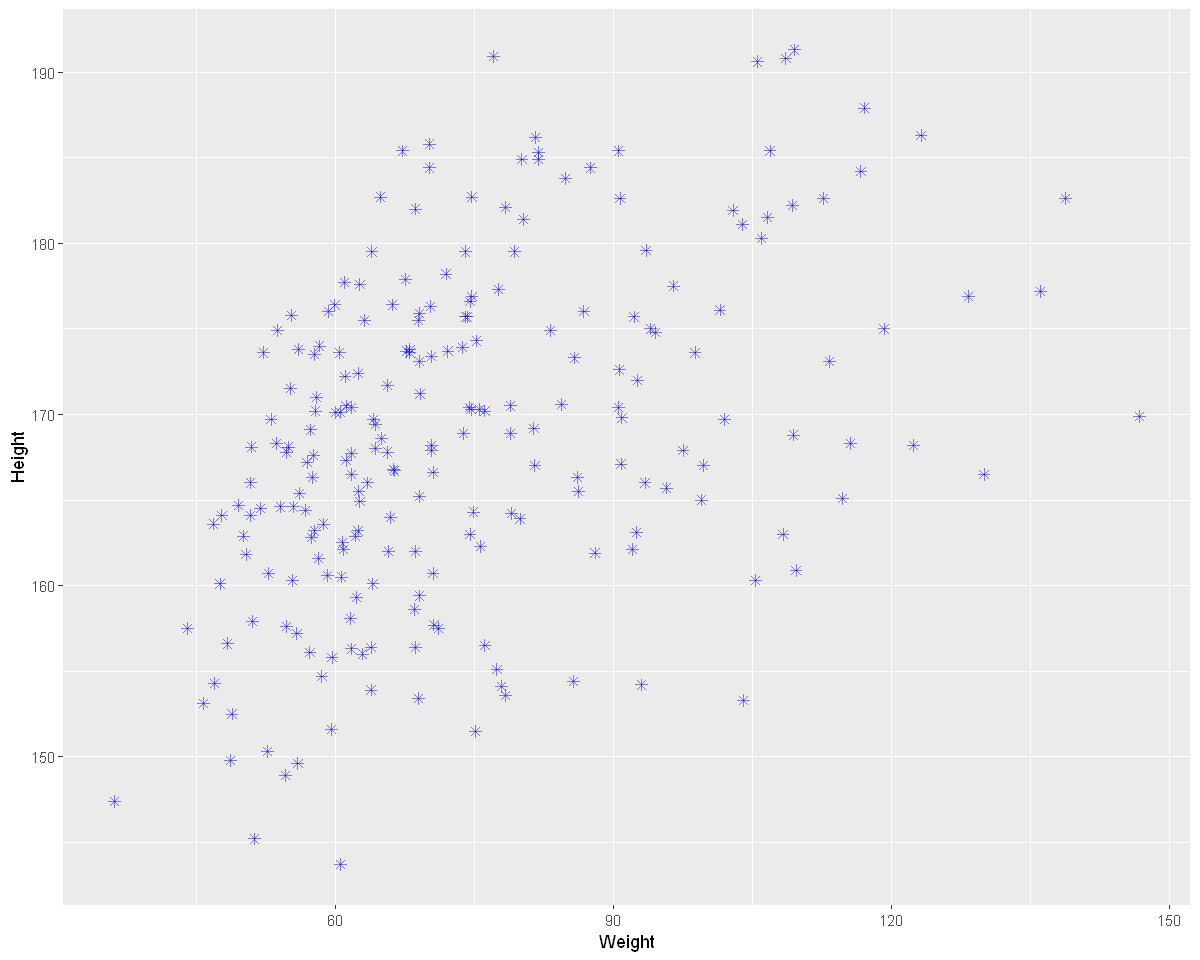

In [129]:

NHANES_20_W_H <- 
NHANES_20 %>% 
ggplot(aes(x=Weight, y=Height)) +
geom_point(color="blue", size=2, alpha=.5, shape=8) 

NHANES_20_W_H
       


Warning message:
"Removed 4 rows containing missing values (geom_point)."

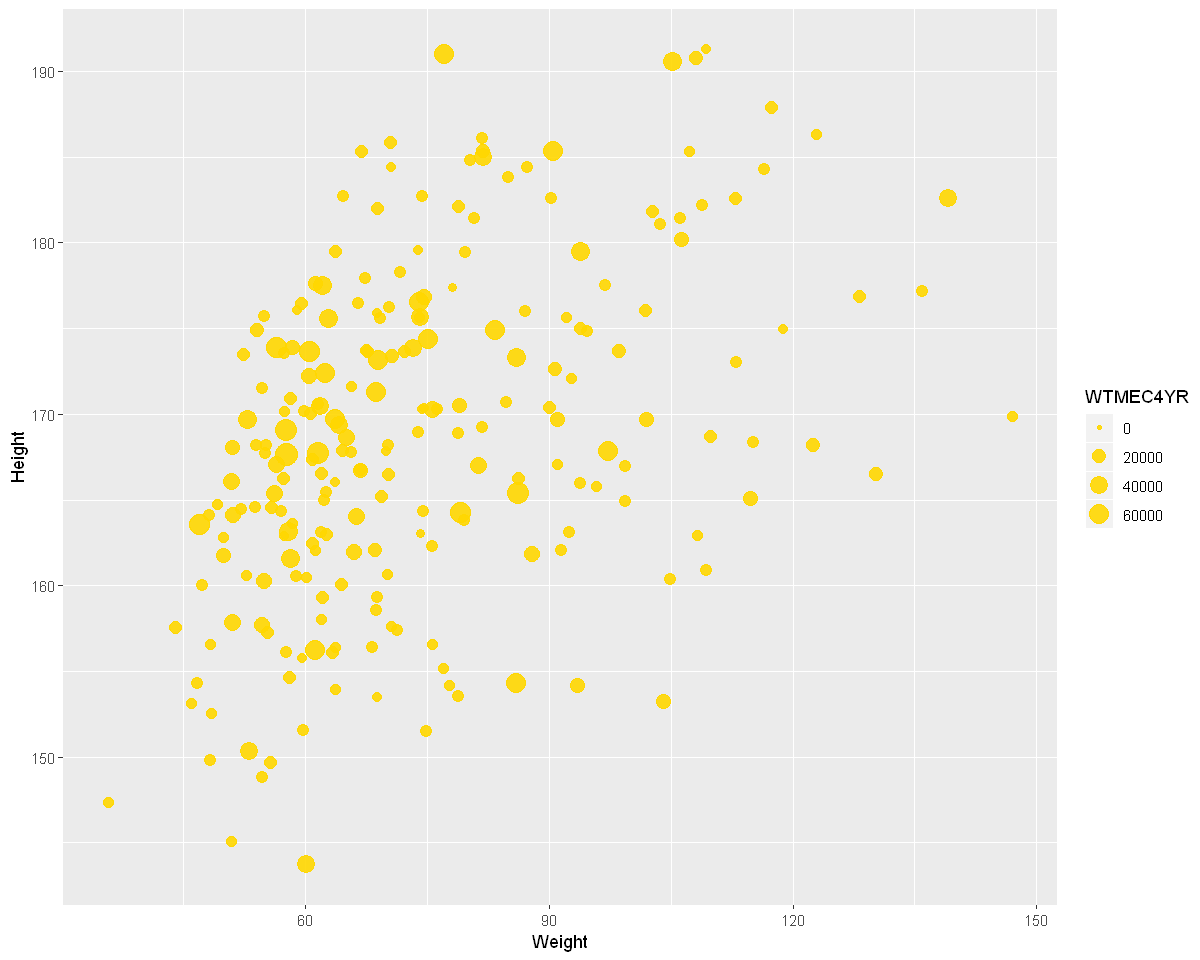

In [130]:
NHANES_20_W_H_Bubble <- 
NHANES_20 %>% 
ggplot(aes(x=Weight, y=Height, size = WTMEC4YR)) +
geom_jitter(alpha=0.9, width=0.5, height=0.1, color="gold")

NHANES_20_W_H_Bubble

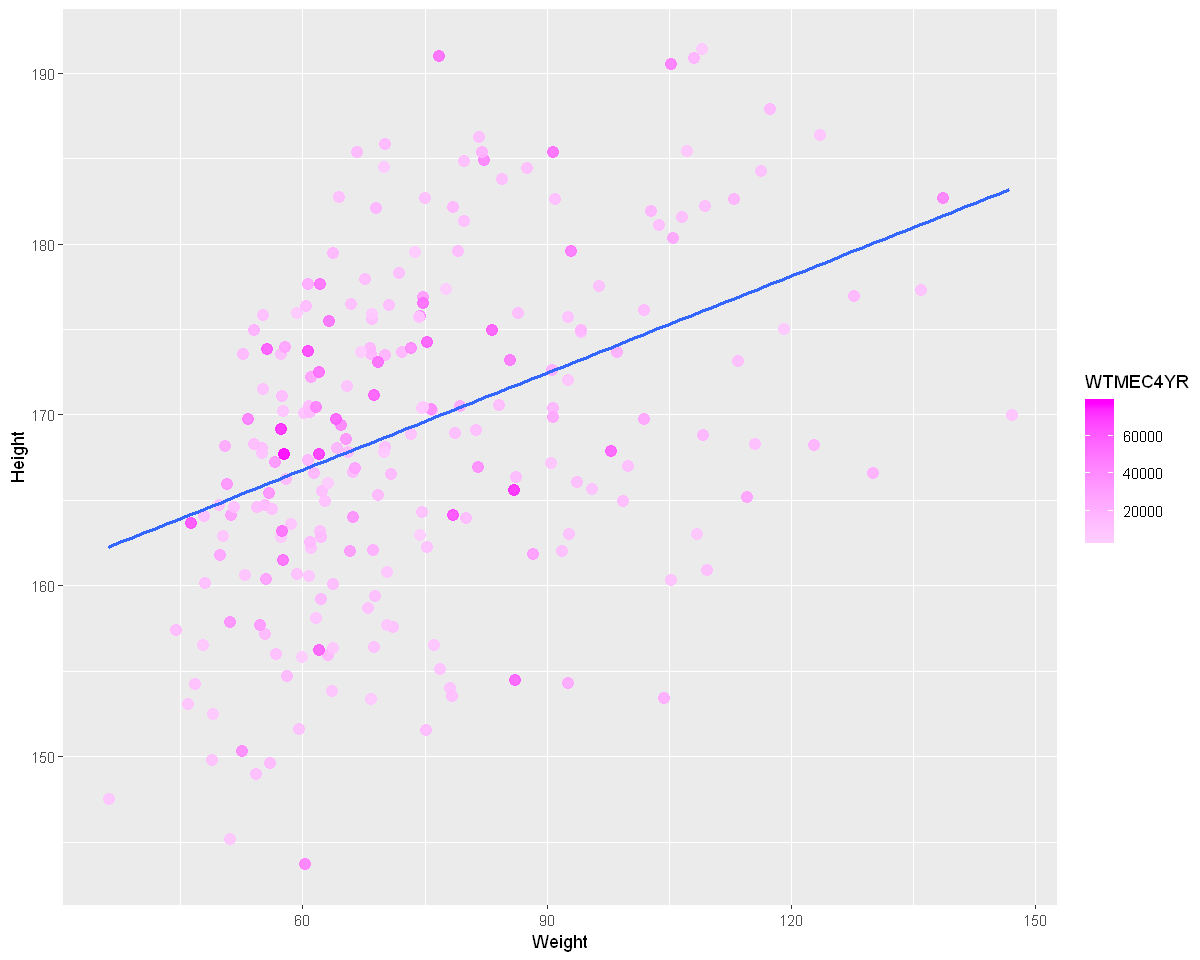

In [131]:
NHANES_20_W_H_color <- 
NHANES_20 %>% select(Height, Weight, WTMEC4YR) %>% na.omit() %>% 
ggplot(aes(x=Weight, y=Height, color = WTMEC4YR)) +
geom_jitter(alpha=0.9, width=0.5, height=0.1, size=3) +
scale_color_gradient(low="#FFCCFF" , high="#FF00FF")+
geom_smooth(method="lm", aes(weight=WTMEC4YR), se=FALSE)

NHANES_20_W_H_color 

Warning message:
"Removed 4 rows containing missing values (geom_point)."

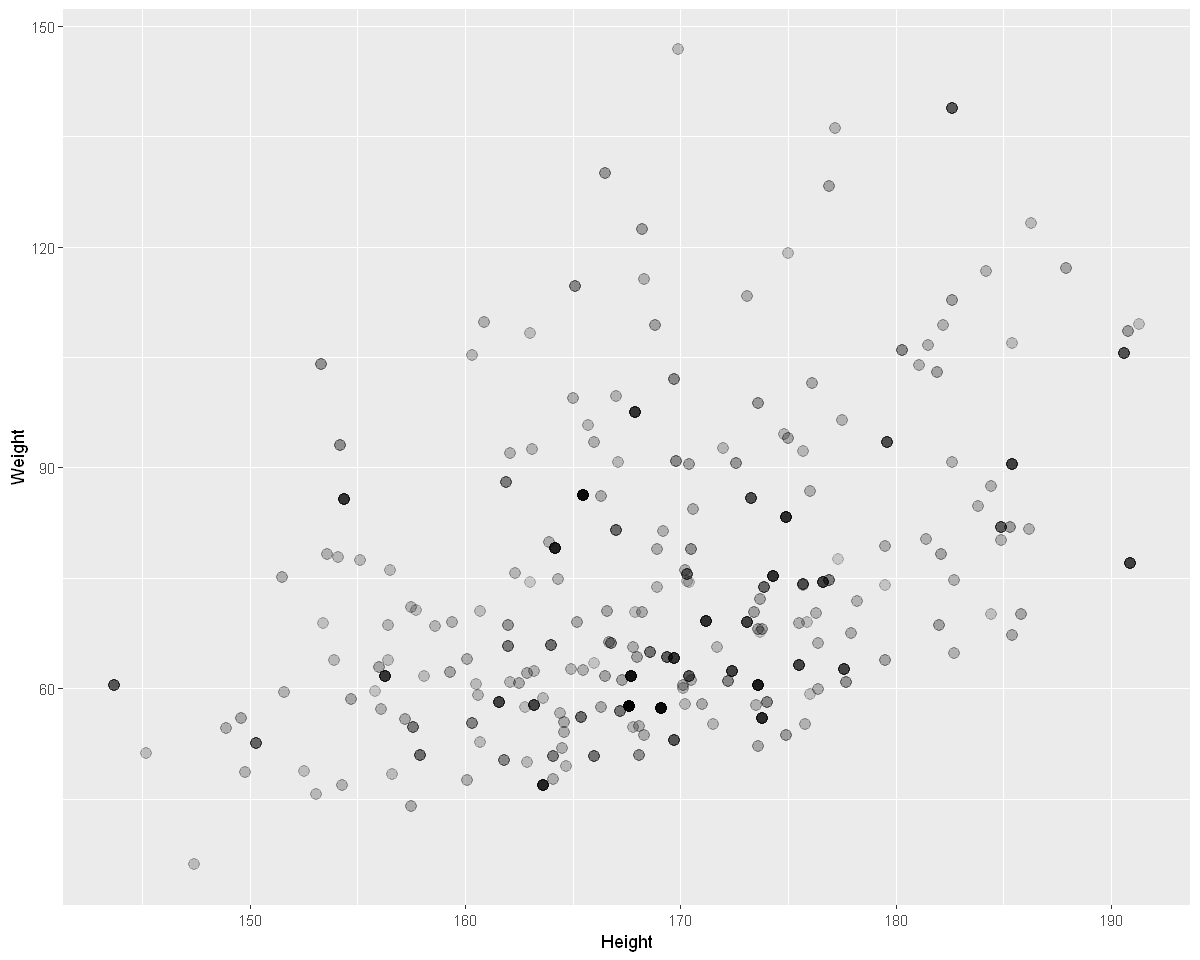

In [132]:
# Construct a scatter plot with alpha
NHANES_20_W_H_color_alpha <-
ggplot(data = NHANES_20,
       mapping = aes(Height, Weight, alpha=WTMEC4YR)) + 
       geom_point(size=3) + 
       guides(alpha = FALSE)

NHANES_20_W_H_color_alpha

Warning message:
"Removed 4 rows containing missing values (geom_point)."

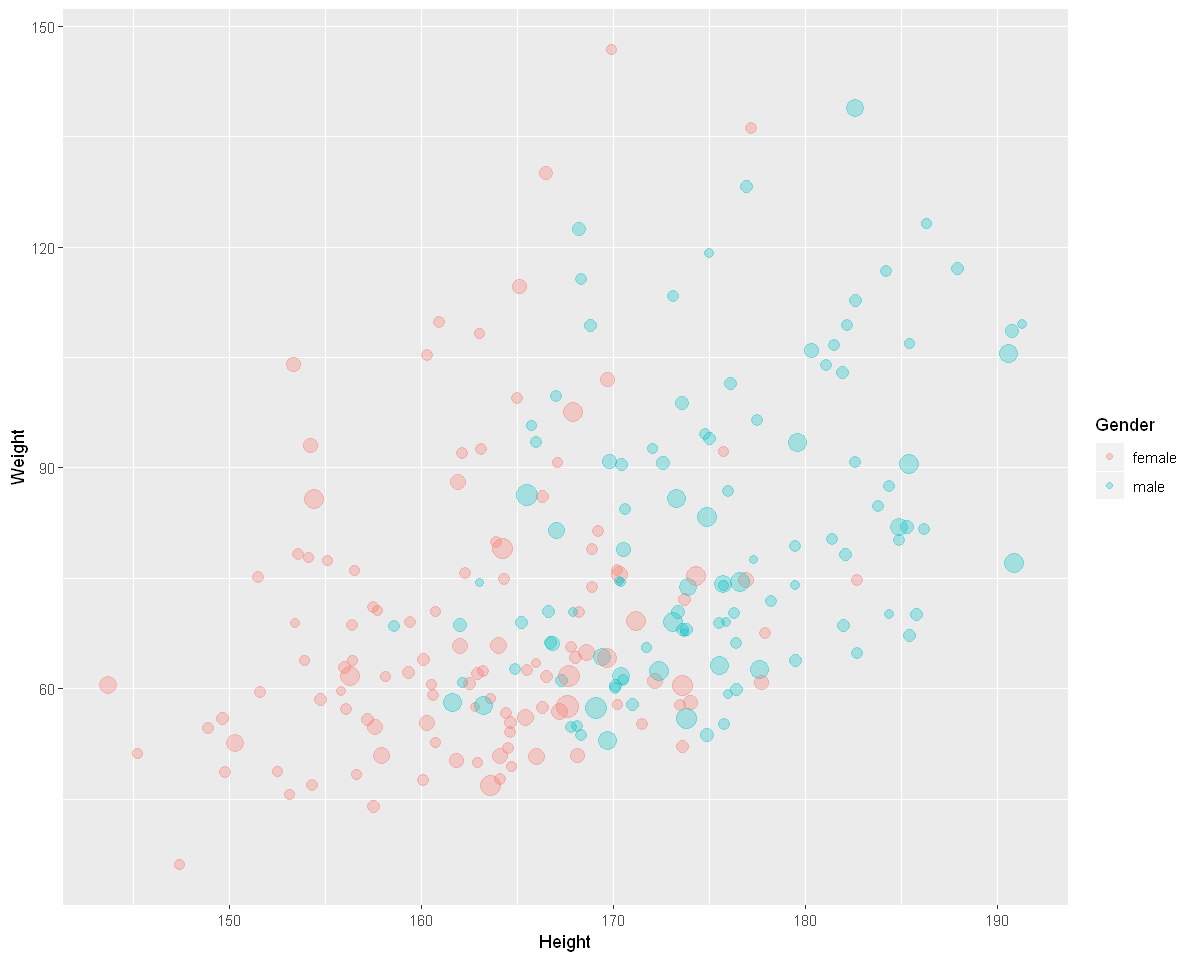

In [133]:
# Add gender to plot
ggplot(data = NHANES_20,
       mapping = aes(x=Height, y=Weight, color=Gender,
       size=WTMEC4YR)) + 
       geom_point(alpha=0.3) + 
       guides(size = FALSE)

Warning message:
"Removed 4 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 4 rows containing missing values (geom_point)."

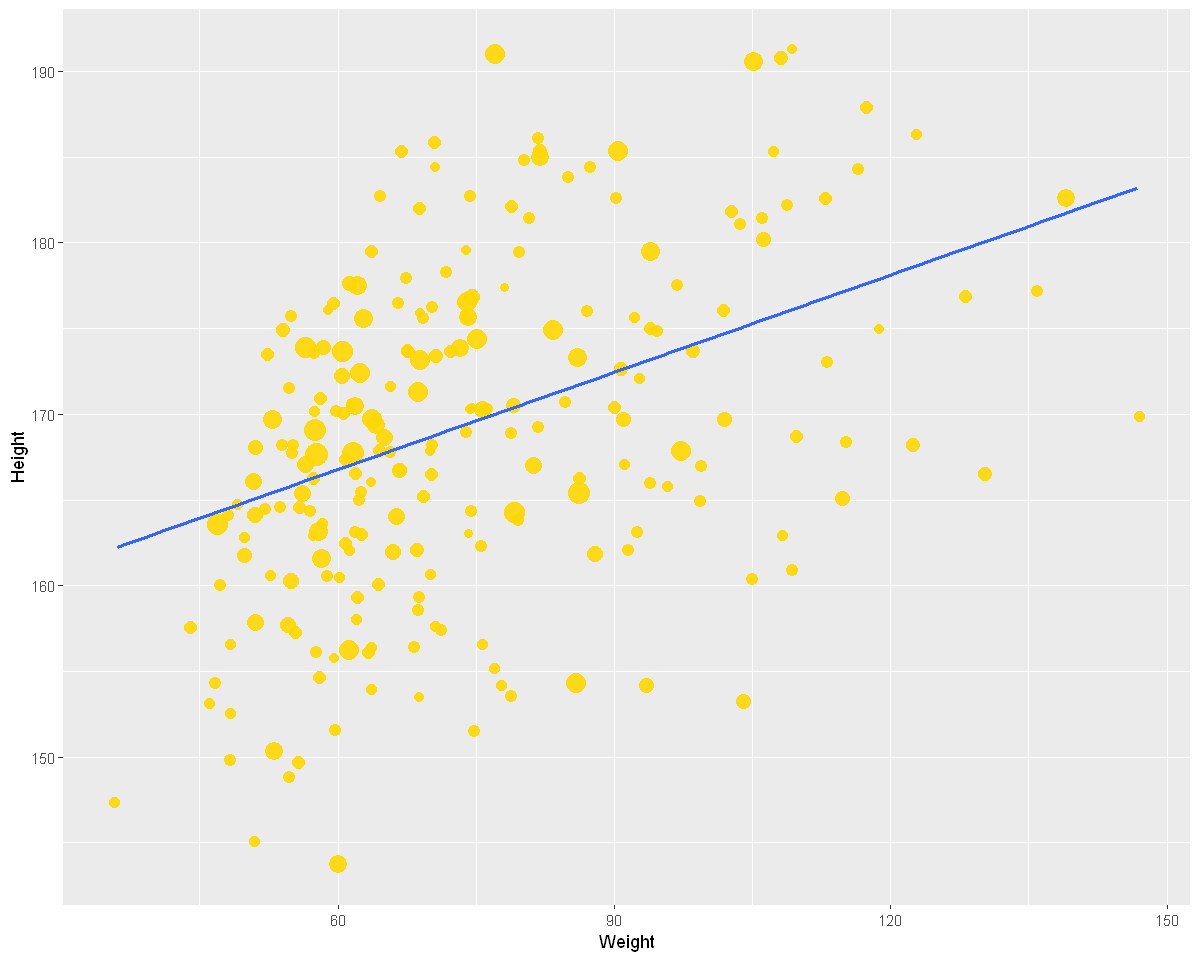

In [134]:
# Adding a trend line to the plots visualizing numerical variables with geom_smooth

NHANES_20_W_H_Bubble +
geom_smooth(method="lm", se=FALSE, mapping=aes(weight=WTMEC4YR))+
guides(size=FALSE)

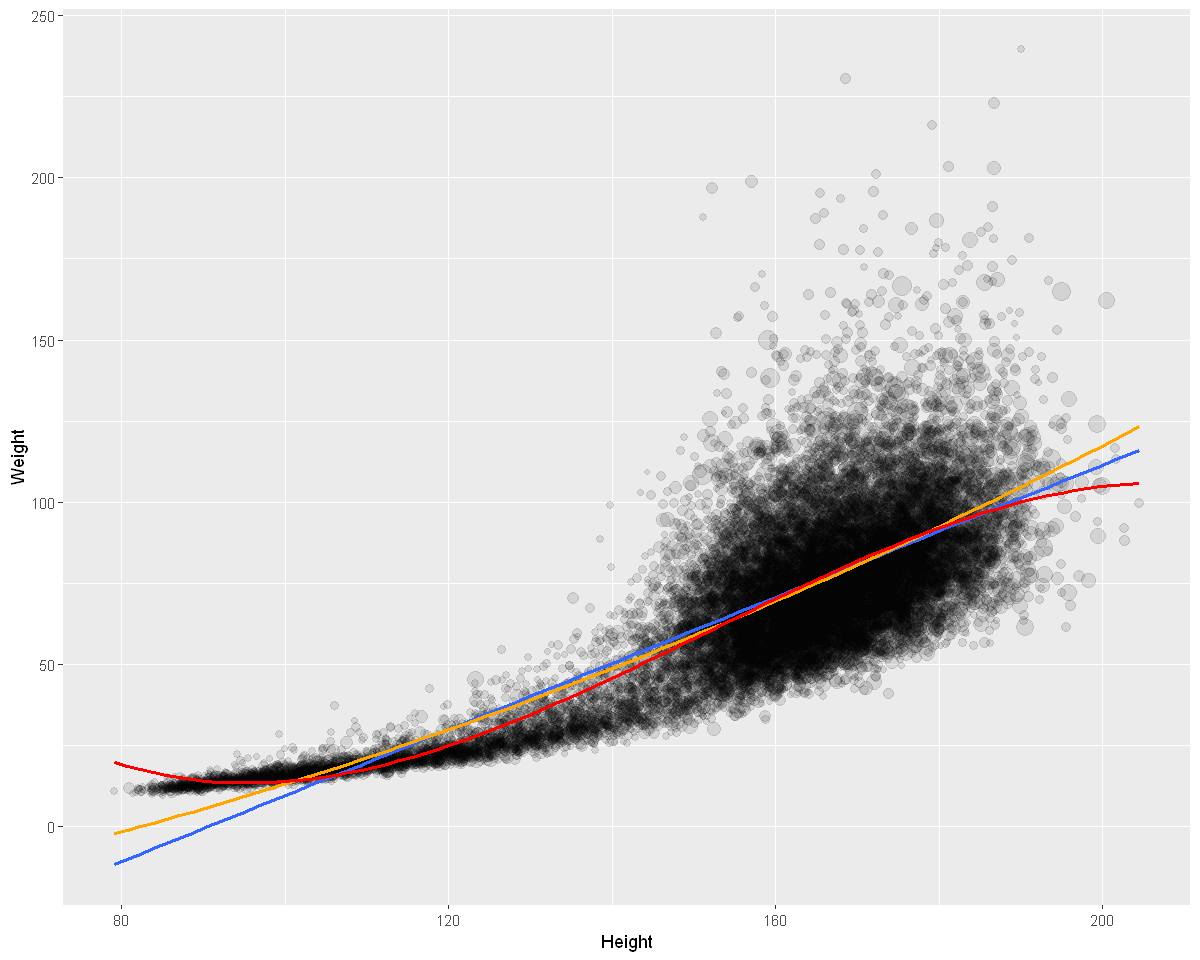

In [135]:
# adding polynomial trendlines to the plot
NHANESraw %>% select(Height, Weight, WTMEC4YR) %>% na.omit() %>% 
ggplot(mapping = aes(x = Height, y = Weight, size = WTMEC4YR)) + 
    geom_point(alpha = 0.1) + 
    guides(size = FALSE) + 
    geom_smooth(method = "lm", se = FALSE, mapping = aes(weight = WTMEC4YR)) +
    geom_smooth(method = "lm", se = FALSE, mapping = aes(weight = WTMEC4YR), formula = y~poly(x, 2), color = "orange") +
    geom_smooth(method = "lm", se = FALSE, mapping = aes(weight = WTMEC4YR), formula = y~poly(x,3), color = "red")

Warning message:
"Removed 4 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 4 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 4 rows containing missing values (geom_point)."

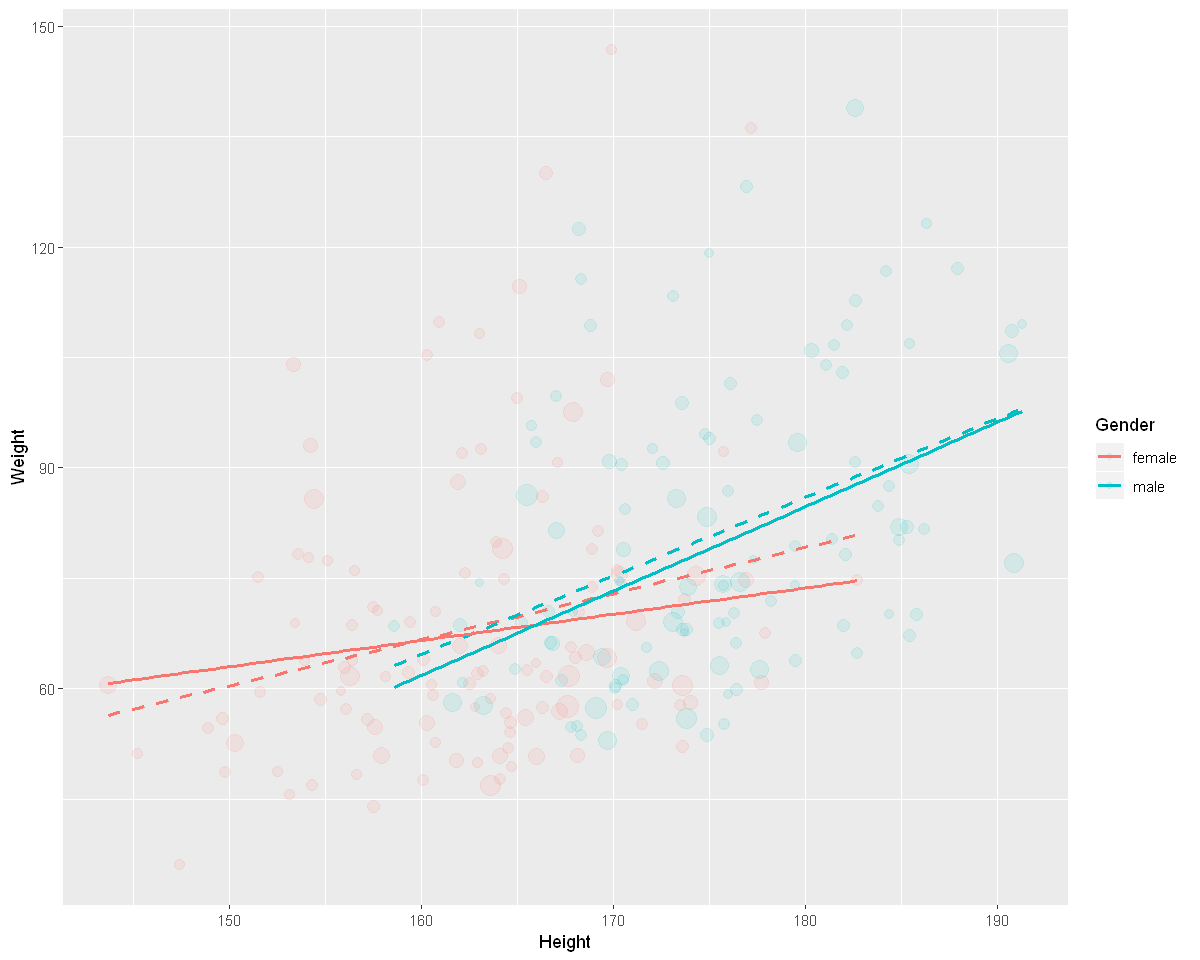

In [136]:
# Compare survey-weighted and non-survey-weighted  trend lines
ggplot(data = NHANES_20, mapping = aes(x = Height, y = Weight, size = WTMEC4YR, color = Gender)) + 
  geom_point(alpha = 0.1) + 
  guides(size = FALSE) + 
  geom_smooth(method = "lm", se = FALSE, linetype = 2) + 
  geom_smooth(method = "lm", se = FALSE, mapping = aes(weight=WTMEC4YR))
# in particular the gradient for the female trendline is different for the population 
# estimation and the samples

#### Modeling data with linear regressions
<p>
</p>

In [137]:
# Modeling the relationship HeadCirc (y) and AgeMonths (x) with linear regression
regression_HC_AM <-
svyglm(formula=HeadCirc ~ AgeMonths, design=NHANES_design)
regression_HC_AM
summary(regression_HC_AM)

# Interpretation
# the t-value is the average between two groups of observations the same or not
# Degrees of Freedom: 473 and a significance level of 0.05 gives an expected value of 1.660
# the expectation is that the HeadCirc of a newborn is 38.13757 cm
# for every month (unit of growth) of age the expectation is that the HeadCirc increases by 1.07081 cm

# Hypotheses
# Regression equation: E(y) = A+ B*x
# 0: there is not a linear relationship between HeadCirc and AgeMonths - B = 0
# Alt: there is a linear relationship between HeadCirc and AgeMonths - B NOT 0

# Conclusion
# Based on a significance level of 0.05
# both intercept and slope are significant expressions of the relationship between HeadCirc and AgeMonths

Stratified 1 - level Cluster Sampling design (with replacement)
With (62) clusters.
svydesign(data = NHANESraw, strata = ~SDMVSTRA, id = ~SDMVPSU, 
    nest = TRUE, weights = ~WTMEC4YR)

Call:  svyglm(formula = HeadCirc ~ AgeMonths, design = NHANES_design)

Coefficients:
(Intercept)    AgeMonths  
     38.138        1.071  

Degrees of Freedom: 473 Total (i.e. Null);  32 Residual
  (19819 observations deleted due to missingness)
Null Deviance:	    1115 
Residual Deviance: 426.1 	AIC: 1887


Call:
svyglm(formula = HeadCirc ~ AgeMonths, design = NHANES_design)

Survey design:
svydesign(data = NHANESraw, strata = ~SDMVSTRA, id = ~SDMVPSU, 
    nest = TRUE, weights = ~WTMEC4YR)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.13757    0.20043  190.28   <2e-16 ***
AgeMonths    1.07081    0.05927   18.07   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9008025)

Number of Fisher Scoring iterations: 2


In [138]:
# Subset survey design object to only include 20 year olds
NHANES20_design <- subset(NHANES_design, Age == 20)

# Build a linear regression model
mod <- svyglm(Weight ~ Height, design = NHANES20_design)

# Print summary of the model

summary(mod)
mod

# Interpretation
# the t-value is the average between two groups of observations the same or not
# Degrees of Freedom: 224 and a significance level of 0.05 gives an expected value of 1.660
# the expectation is that the lowest Weight of a person is -67.2571 kg
# for every cm (unit of growth) of height the expectation is that the weight increases by 0.8305 kg

# Hypotheses
# Regression equation: E(y) = A+ B*x
# 0: there is not a linear relationship between Weight and Height - B = 0
# Alt: there is a linear relationship between Weight and Height  - B NOT 0

# Conclusion
# Based on a significance level of 0.05
# both intercept and slope are significant expressions of the relationship between Weight and Height 

# make prediction with all x=Height-values
# as all values are applied for constructing the model it bears the risk of overfitting
# to avoid a split into training and testing data set would be necessary
predictions_W_H <- predict(mod)
class(predictions_W_H)
paste("Simple linear regression Predictions_W_H")
predictions_W_H[1:5]
# Next step is calculating the RMSE


Call:
svyglm(formula = Weight ~ Height, design = NHANES20_design)

Survey design:
subset(NHANES_design, Age == 20)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -67.2571    22.9836  -2.926  0.00674 ** 
Height        0.8305     0.1368   6.072 1.51e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 326.6108)

Number of Fisher Scoring iterations: 2


Stratified 1 - level Cluster Sampling design (with replacement)
With (57) clusters.
subset(NHANES_design, Age == 20)

Call:  svyglm(formula = Weight ~ Height, design = NHANES20_design)

Coefficients:
(Intercept)       Height  
   -67.2571       0.8305  

Degrees of Freedom: 224 Total (i.e. Null);  28 Residual
  (4 observations deleted due to missingness)
Null Deviance:	    86790 
Residual Deviance: 73160 	AIC: 1992

[1] "svystat"

[1] "Simple linear regression Predictions_W_H"

193      460      581      638      657 
76.99636 83.14188 87.37730 67.94419 77.90988

#### Multiple linear regression models
<p>
</p>

In [139]:
# creating dummy variables for gender
NHANES_20_dummy_gender <-
NHANES_20 %>%
mutate(Gender_dummy =case_when(
    Gender == "male" ~ 1,
    Gender == "female" ~0))

head(NHANES_20_dummy_gender)

ID,SurveyYr,Gender,Age,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,SexNumPartYear,SameSex,SexOrientation,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,PregnantNow,WTMEC4YR,Gender_dummy
51816,2009_10,female,20,244,Black,NA,Some College,NeverMarried,45000-54999,...,0,Yes,Bisexual,34425.84,34580.70,2,83,No,17290.352,0
52083,2009_10,male,20,243,Mexican,NA,Some College,NeverMarried,5000-9999,...,1,No,Heterosexual,25468.42,25576.62,2,86,NA,12788.311,1
52204,2009_10,male,20,251,White,NA,High School,NeverMarried,25000-34999,...,0,No,Heterosexual,24684.56,25672.24,2,77,NA,12836.121,1
52261,2009_10,female,20,249,Mexican,NA,Some College,NeverMarried,55000-64999,...,0,No,Heterosexual,16281.53,16203.19,2,85,No,8101.595,0
52280,2009_10,male,20,247,Hispanic,NA,High School,NeverMarried,25000-34999,...,0,No,Heterosexual,22733.46,22830.04,1,76,NA,11415.021,1
52335,2009_10,female,20,250,White,NA,High School,NeverMarried,5000-9999,...,0,No,Heterosexual,25858.96,26441.31,2,83,No,13220.656,0


In [140]:
multiregressiom_AG_GEN_HC <-
svyglm(formula=HeadCirc ~ AgeMonths+Gender, design=NHANES_design)
summary(multiregressiom_AG_GEN_HC)

# Interpretation
# for every month (unit of growth) of AgeMonths the expectation is that HeadCirc 
# increases by 1.08658cm if Gender is 0
# if AgeMonths differs by one unit or one month HeadCirc changes to 1.08658 cm
# if Gender is male the expectation is that HeadCirc 
# increases by 1.15034cm if AgeMonths remains constant
# if Gender is male (categorical variable) HeadCirc differs by 1.15034
# the intercept of females is 37.48508 cm
# the intercept of males is  37.48508 cm + 1.15034cm
# we would expect HeadCirc of 37.48508 cm if neither Gender and AgeMonths do not contribrute to HeadCirc increase
# in this case the coefficients (xi) of the variables (B) would be 0 - B(xi)= 0


# Hypotheses
# Regression equation: E(y) = A+ B*x
# Null hypothesis:Given age is in the model, gender should not be included (B = 0).
# Alternative hypothesis: Given age is in the model, gender should be included (B ≠ 0).

# Conclusion
# the p-value of AgeMonths is 2e-16
# the p-value of Gendermale is 2e-16
# Based on a significance level of 0.05
# both intercept and slope are significant expressions of the relationship between Gender, AgeMonths and HeadCirc


multiregressiom_AG_GEN_HC_predictions <- predict(multiregressiom_AG_GEN_HC)
paste("Multiregressiom_AG_GEN_HC_predictions")
multiregressiom_AG_GEN_HC_predictions[1:5]

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
svyglm(formula = HeadCirc ~ AgeMonths + Gender, design = NHANES_design)

Survey design:
svydesign(data = NHANESraw, strata = ~SDMVSTRA, id = ~SDMVPSU, 
    nest = TRUE, weights = ~WTMEC4YR)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.48508    0.18320 204.613  < 2e-16 ***
AgeMonths    1.08658    0.05379  20.200  < 2e-16 ***
Gendermale   1.15034    0.16298   7.058  6.3e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.7885399)

Number of Fisher Scoring iterations: 2


[1] "Multiregressiom_AG_GEN_HC_predictions"

65       94      339      365      577 
41.89517 41.83141 39.65825 37.48508 42.91800

In [141]:
# Build a linear regression model different slopes
regression_different_slopes <- svyglm(Weight ~ Height*Gender, design = NHANES20_design)

# Print summary of the different slopes model
summary(regression_different_slopes)


Call:
svyglm(formula = Weight ~ Height * Gender, design = NHANES20_design)

Survey design:
subset(NHANES_design, Age == 20)

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)          9.5061    21.5357   0.441  0.66257   
Height               0.3565     0.1269   2.809  0.00932 **
Gendermale        -131.0884    41.9989  -3.121  0.00438 **
Height:Gendermale    0.7897     0.2385   3.311  0.00273 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 316.5007)

Number of Fisher Scoring iterations: 2


#### Multiple linear regression models with interaction effects
<p>
</p>

Warning message:
"Removed 4600 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 4600 rows containing missing values (geom_point)."

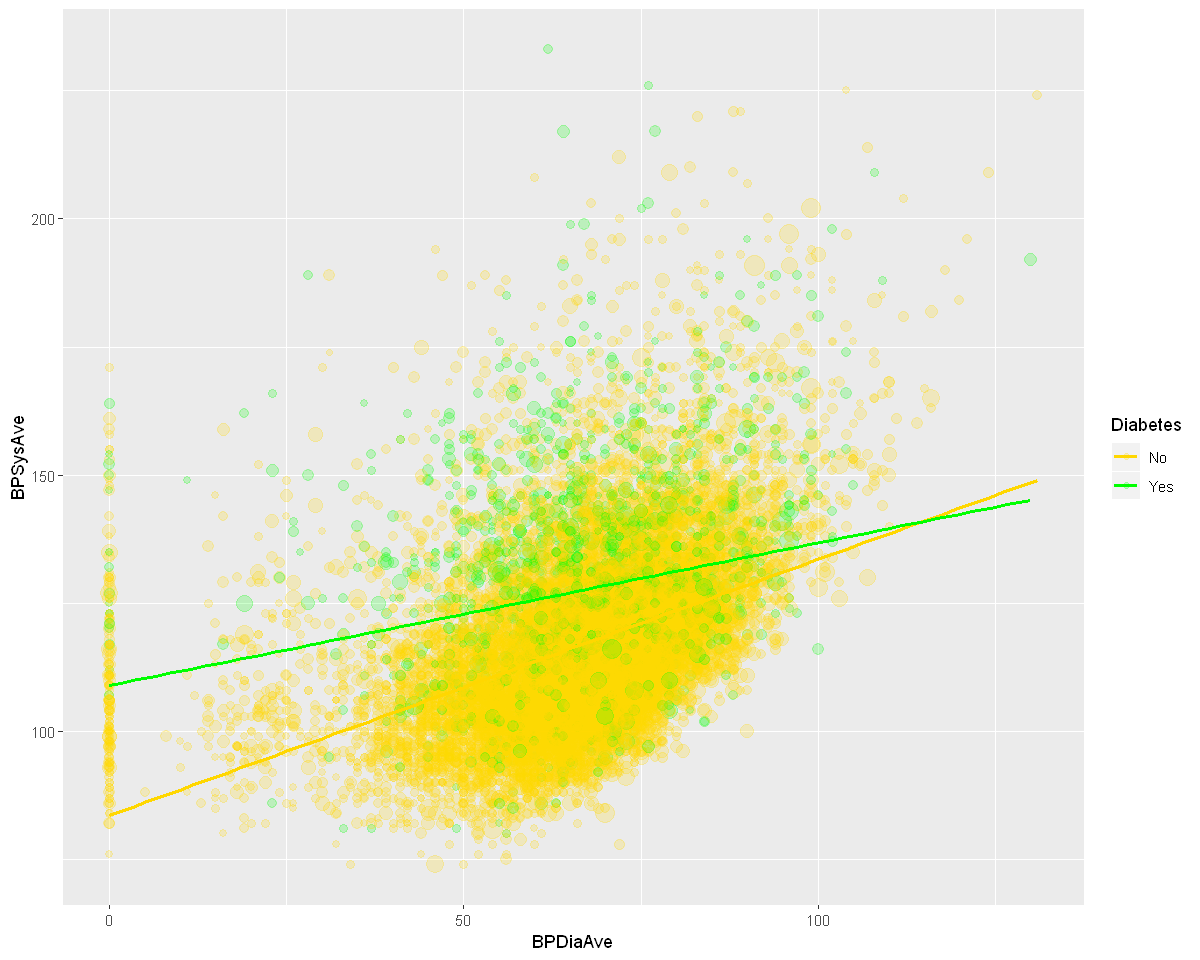

In [142]:
# Plot BPDiaAve and BPSysAve by Diabetes including trend lines
drop_na(NHANESraw, Diabetes) %>%
ggplot(mapping = aes(x = BPDiaAve, y = BPSysAve, size = WTMEC4YR, color=Diabetes)) +
    geom_point(alpha = 0.2) + 
    scale_color_manual(values=c("gold", "green"))+
    guides(size = FALSE) + 
    geom_smooth(method = "glm", se = FALSE, mapping = aes(weight = WTMEC4YR))


In [143]:
 regression_mod1_BPSysAve <- svyglm(BPSysAve ~ BPDiaAve, design = NHANES_design)
 regression_mod1_BPSysAve_interaction <- svyglm(BPSysAve~BPDiaAve*Diabetes, design = NHANES_design)

In [144]:
summary(regression_mod1_BPSysAve)
summary( regression_mod1_BPSysAve_interaction )

# Interpretation
# for unit of growth of BPDiaAve the expectation is that BPSysAve
# increases by 0.49964 if Diabetes is 0
# if BPDiaAve differs by one unit BPDiaAve changes to 0.49964
# if DiabetesYes  is 1 the expectation is that BPDiaAve 
# increases by 25.36616 if BPDiaAve remains constant
# if DiabetesYes = 1 (categorical variable) BPSysAve differs by 25.36616
# for unit of growth of BPDiaAve:DiabetesYes the expectation is that BPSysAve
# increases by -0.22132 if Diabetes and BPDiaAve is 0
# There is an interaction effect b, between Diabetes and BPDiaAve, which contributes to the change in BPSysAve
# we would expect a BPSysAve of 83.58652 if neither BPDiaAve and do not contribrute to BPSysAve increase
# in this case the coefficients (xi) of the variables (B) would be 0 - B(xi)= 0


# Hypotheses
# Null hypothesis:Given age is in the model, gender should not be included (B = 0).
# Alternative hypothesis: Given age is in the model, gender should be included (B ≠ 0).

# Conclusion
# Based on a significance level of 0.05 the p-values for all coefficients are significant 
# and improve the model performance.
# There is a relationship between BPSysAve on the one side 
# and BPDiaAve, DiabetesYes, BPDiaAve:DiabetesYes on the other side



regression_mod1_BPSysAve_interaction_pred <-
predict(regression_mod1_BPSysAve_interaction)

head(regression_mod1_BPSysAve_interaction_pred)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
svyglm(formula = BPSysAve ~ BPDiaAve, design = NHANES_design)

Survey design:
svydesign(data = NHANESraw, strata = ~SDMVSTRA, id = ~SDMVPSU, 
    nest = TRUE, weights = ~WTMEC4YR)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 85.74311    1.86920   45.87   <2e-16 ***
BPDiaAve     0.48150    0.02354   20.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 290.3472)

Number of Fisher Scoring iterations: 2



Call:
svyglm(formula = BPSysAve ~ BPDiaAve * Diabetes, design = NHANES_design)

Survey design:
svydesign(data = NHANESraw, strata = ~SDMVSTRA, id = ~SDMVPSU, 
    nest = TRUE, weights = ~WTMEC4YR)

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          83.58652    2.05537  40.667  < 2e-16 ***
BPDiaAve              0.49964    0.02623  19.047  < 2e-16 ***
DiabetesYes          25.36616    3.56587   7.114 6.53e-08 ***
BPDiaAve:DiabetesYes -0.22132    0.05120  -4.323 0.000156 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 279.1637)

Number of Fisher Scoring iterations: 2


1        3        4        5        6        7 
126.0557 113.0651 104.0717 127.8780 108.0688 121.0593